# IMPLEMENTACION REGRESION LINEAL.
Se trabaja con los datos del archivo "spotify_churn_dataset.csv". En el hay informacion sobre el uso de los usuarios de la aplicacion Spotify (8000 usuarios) junto con informacion de los propios usuarios.
El objetivo es tratar de encontrar una relación entre los datos de los que disponemos y gracias a esa relación, crear un modelo que prediga una columna clase.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
import random

En primer lugar, se cargaran los datos de entrada del fichero "spotify_churn_dataset.csv". Dicho fichero tiene 12 columnas y 8000 filas.

In [2]:
def read_file(file_name):
    
    file = pd.read_csv(file_name)

    # names=["user_id","gender","age","country","subscription_type","listening_time","songs_played_per_day","skip_rate","device_type","ads_listened_per_week","offline_listening","is_churned"]

    return file

In [3]:
file = read_file('spotify_churn_dataset.csv')
print("Tamaño del csv:",file.shape)

Tamaño del csv: (8000, 12)


## Investigación del dataset
Una vez cargados los datos, se intentará probar la relación entre diferentes columnas de forma visual. Se probará a comparar 2 columnas que pudieran tener una relación para ver si esto es verdad.
Se va a empezar por probar si la columna edad y tiempo de escucha tienen algun tipo de relación.

In [4]:
# Para X = "age" y para y = "listening_time"
X = pd.DataFrame({"age":file["age"]})
y = pd.DataFrame({'listening_time': file['listening_time']})

#X.sort_values("age", ascending = False).head()
y.sort_values("listening_time", ascending = False).head()

listening_time
5623             299
5617             299
5732             299
863              299
2957             299

El tamaño de X es:  8000  filas y  1  columna(s)  (8000, 1)
La longitud del vector y es:  8000 (8000, 1)
Las 5 primeras filas de los datos son: [atributo entrada X1 | clase y]
	 54  |  26
	 33  |  141
	 38  |  199
	 22  |  36
	 29  |  250


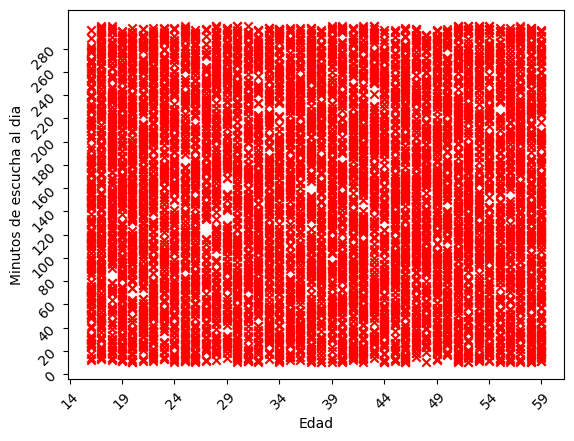

In [5]:
print("El tamaño de X es: ", X.shape[0], " filas y ", X.shape[1], " columna(s) ", X.shape)
print("La longitud del vector y es: ", len(y), y.shape)

print("Las 5 primeras filas de los datos son: [atributo entrada X1 | clase y]")
for i in range(0,5):
  print("\t", X['age'][i],  " | ", y['listening_time'][i]) 

# Imprimir los datos
plt.scatter(X,y, marker = "x", c = "red")
plt.xlabel("Edad")
plt.ylabel("Minutos de escucha al dia")
plt.xticks(np.arange(14, 61, 5), rotation=45) 
plt.yticks(np.arange(0, 300, 20), rotation=45)
#plt.xlim(0,8000) # Estamos limitando el eje x. Si los datos cambian, probablemente habrá que modificar estos valores
#plt.ylim(10,100) # Estamos limitando el eje y. Si los datos cambian, probablemente habrá que modificar estos valores
plt.show()

Text(0.5, 1.0, 'Grafico sumatorio')

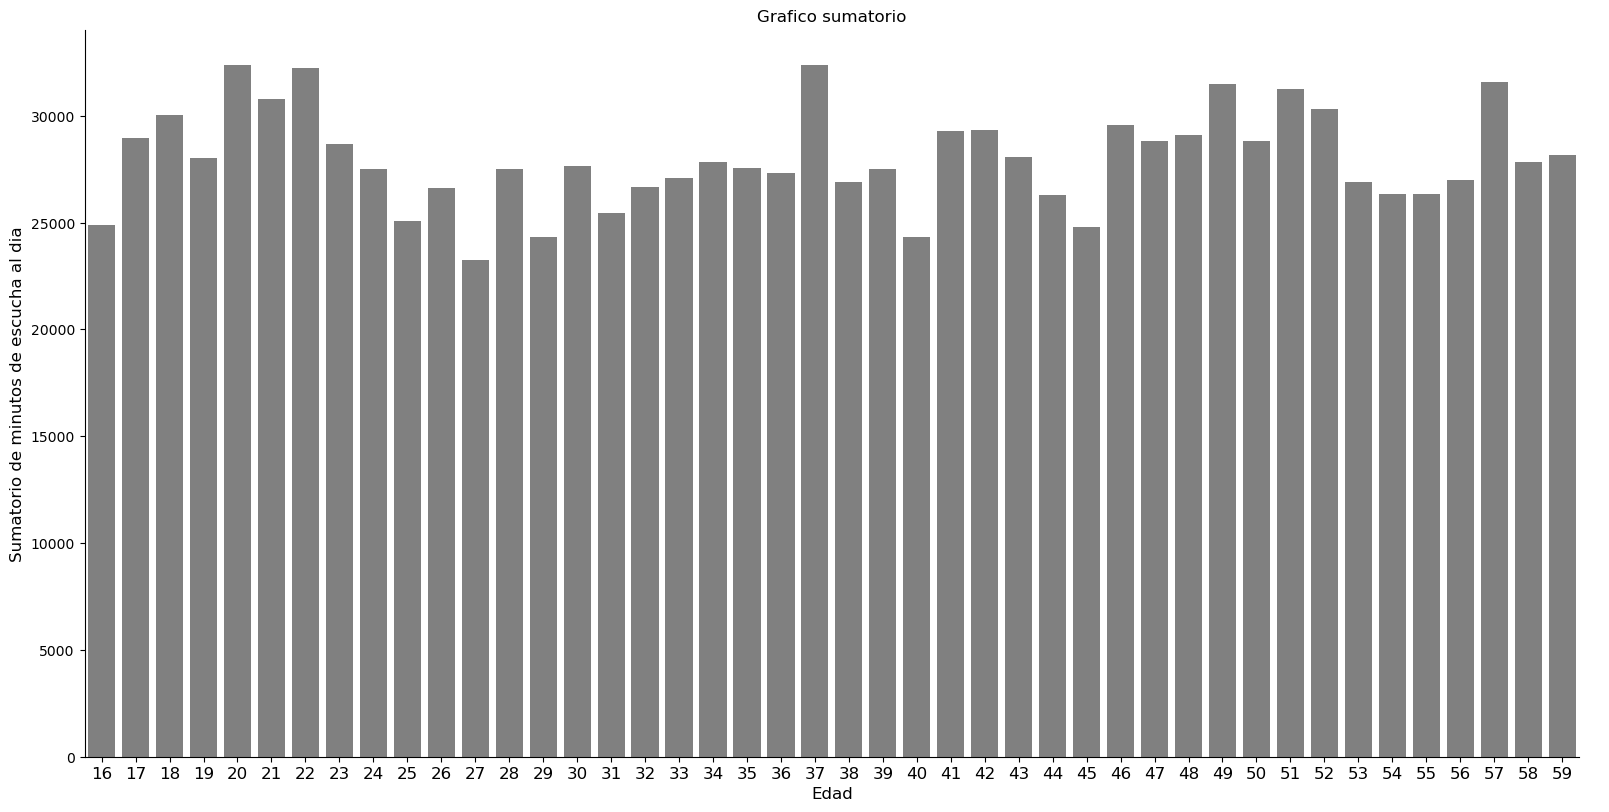

In [6]:
sns.catplot(x="age", y="listening_time", data=file, color="grey", kind="bar", height=8, aspect=2, errorbar=None, estimator="sum")
plt.xticks(size=12)
plt.xlabel("Edad", size=12)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel("Sumatorio de minutos de escucha al dia", size=12)
plt.title("Grafico sumatorio")

Text(0.5, 1.0, 'Grafico media')

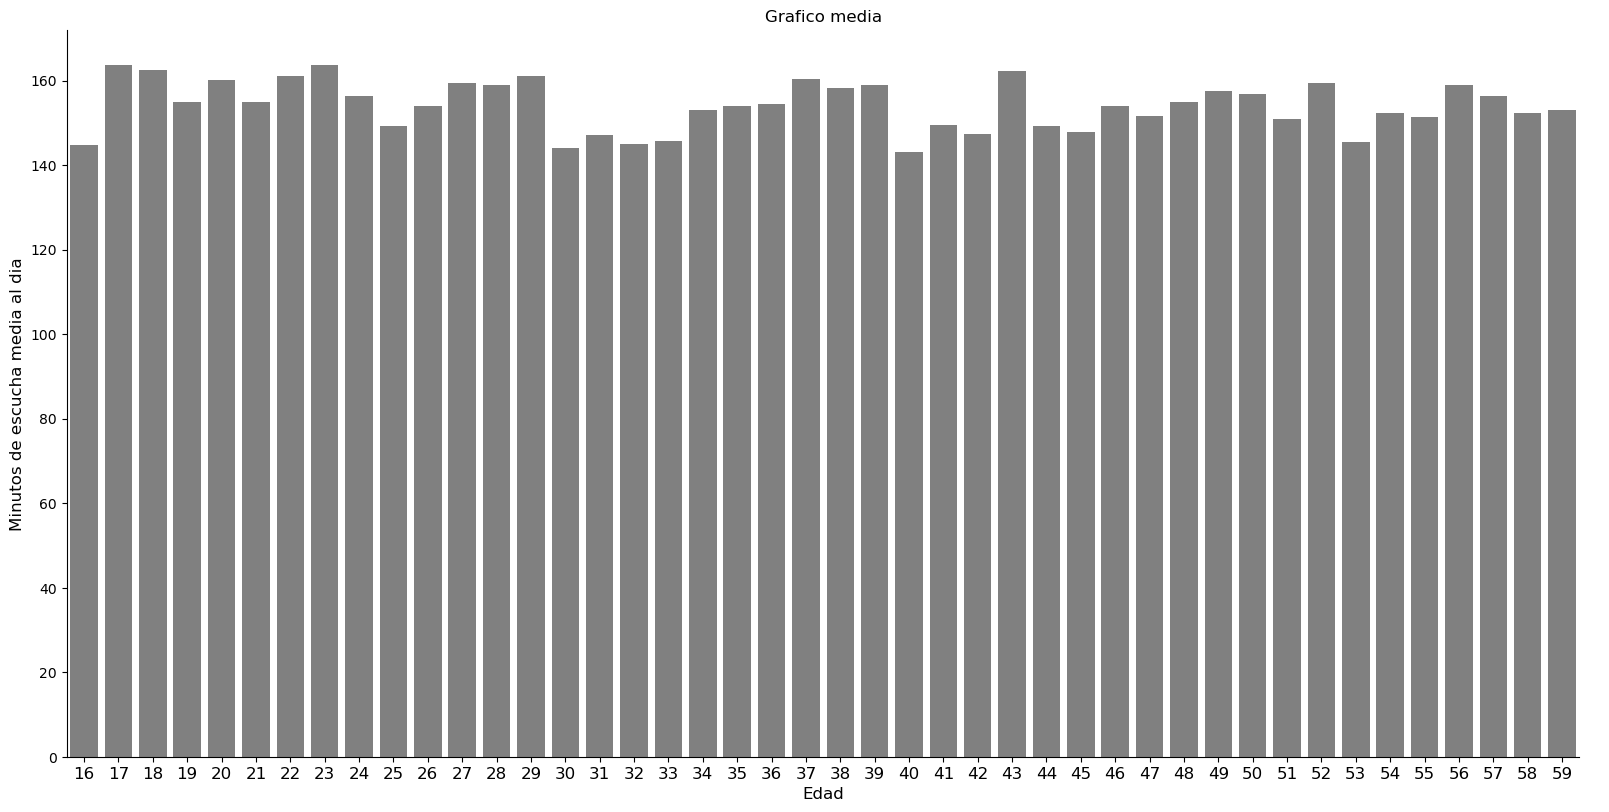

In [7]:
sns.catplot(x="age", y="listening_time", data=file, color="grey", kind="bar", height=8, aspect=2, errorbar=None, estimator="mean")
plt.xticks(size=12)
plt.xlabel("Edad", size=12)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel("Minutos de escucha media al dia", size=12)
plt.title("Grafico media")

Comrueba cuantas instancias existen para cada valor de la edad, asi comprobamos que no hay edad con pocos valores o edad con demasiados valores.

In [8]:
#file.groupby("age").count()["user_id"] # Comentado pues ya está en la documentacion

La grafica demuestra que independientemente de la edad se puede dar un tiempo de escucha. Como no se saca informacion en claro, esta relación no nos sirve.
Vamos a probar si las canciones escuchadas en un dias y el indice de salto entre canciones tiene algun tipo de relación.

In [9]:
# names=["user_id","gender","age","country","subscription_type","listening_time","songs_played_per_day","skip_rate","device_type","ads_listened_per_week","offline_listening","is_churned"]

# Para X = "songs_played_per_day" y para y = "skip_rate"
X = pd.DataFrame({"songs_played_per_day":file["songs_played_per_day"]})
y = pd.DataFrame({'skip_rate': file['skip_rate']})


El tamaño de X es:  8000  filas y  1  columna(s)  (8000, 1)
La longitud del vector y es:  8000 (8000, 1)
Las 5 primeras filas de los datos son: [atributo entrada X1 | clase y]
	 23  |  0.2
	 62  |  0.34
	 38  |  0.04
	 2  |  0.31
	 57  |  0.36


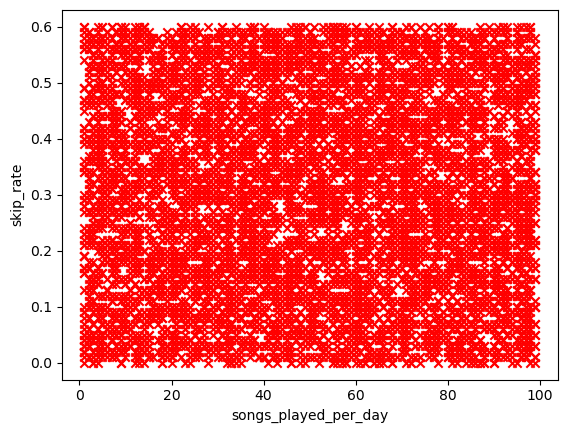

In [10]:
print("El tamaño de X es: ", X.shape[0], " filas y ", X.shape[1], " columna(s) ", X.shape)
print("La longitud del vector y es: ", len(y), y.shape)

print("Las 5 primeras filas de los datos son: [atributo entrada X1 | clase y]")
for i in range(0,5):
  print("\t", X['songs_played_per_day'][i],  " | ", y['skip_rate'][i]) 

# Imprimir los datos
plt.scatter(X,y, marker = "x", c = "red")
plt.xlabel("songs_played_per_day")
plt.ylabel("skip_rate")
plt.show()

Tal como sucedió con la primera grafica, no se puede sacar nada en claro de esta relación. Se probará ahora y por ultima instancia si las canciones escuchadas en un dia y el tiempo de escucha tienen algun tipo de relación.

In [11]:
# Para X = "songs_played_per_day" y para y = "listening_time"
X = pd.DataFrame({"songs_played_per_day":file["songs_played_per_day"]})
y = pd.DataFrame({'listening_time': file['listening_time']})

"""
e = pd.DataFrame({"songs_played_per_day":file["songs_played_per_day"],
                  'listening_time': file['listening_time']})

e.sort_values("listening_time", ascending = False)
"""

'\ne = pd.DataFrame({"songs_played_per_day":file["songs_played_per_day"],\n                  \'listening_time\': file[\'listening_time\']})\n\ne.sort_values("listening_time", ascending = False)\n'

El tamaño de X es:  8000  filas y  1  columna(s)  (8000, 1)
La longitud del vector y es:  8000 (8000, 1)
Las 5 primeras filas de los datos son: [atributo entrada X1 | clase y]
	 23  |  26
	 62  |  141
	 38  |  199
	 2  |  36
	 57  |  250


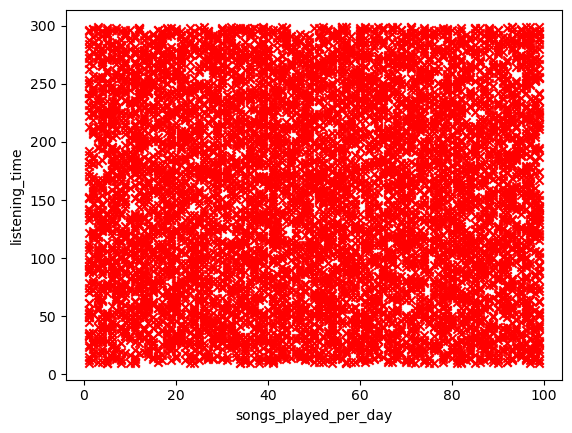

In [12]:
print("El tamaño de X es: ", X.shape[0], " filas y ", X.shape[1], " columna(s) ", X.shape)
print("La longitud del vector y es: ", len(y), y.shape)

print("Las 5 primeras filas de los datos son: [atributo entrada X1 | clase y]")
for i in range(0,5):
  print("\t", X['songs_played_per_day'][i],  " | ", y['listening_time'][i]) 

# Imprimir los datos
plt.scatter(X,y, marker = "x", c = "red")
plt.xlabel("songs_played_per_day")
plt.ylabel("listening_time")
plt.show()

Volvemos a no sacar ningún dato en claro. Parece ser que hay personas que escuchas muchas canciones por muy poco tiempo y personas que escuchan pocas canciones por un tiempo prolongado, por lo que no se puede sacar ninguna relación clara.
Visto que es complicado ver una relación de manera sencilla, vamos a comparar todas las columnas contra todas para ver si entre algunas existe alguna relación clara.

En la siguiente celda, hay comentado un trozo de codigo con comentarios multilinea bajo el comentario: "# DESCOMENTAR PARA VER GRAFICAS". Tal como dice, se puede descomentar para ver una grafica por cada columna con otra del dataset, sin embargo son tantas tablas que era poco practico, por lo que se ha optado por realizar el coeficiente de correlacion de Pearson entre todas las columnas. Este coeficiente mide cuanto de relacionadas están dos columnas (desde -1 a 1), se considera que para un coeficiente mayor a 0.6 (o menor a -0.6), la relacion es buena, mayor a 0.8 (o menor a -0.8) es excelente y para un coeficiente de 1 (o -1) la relación entre ambas columnas es perfecta.

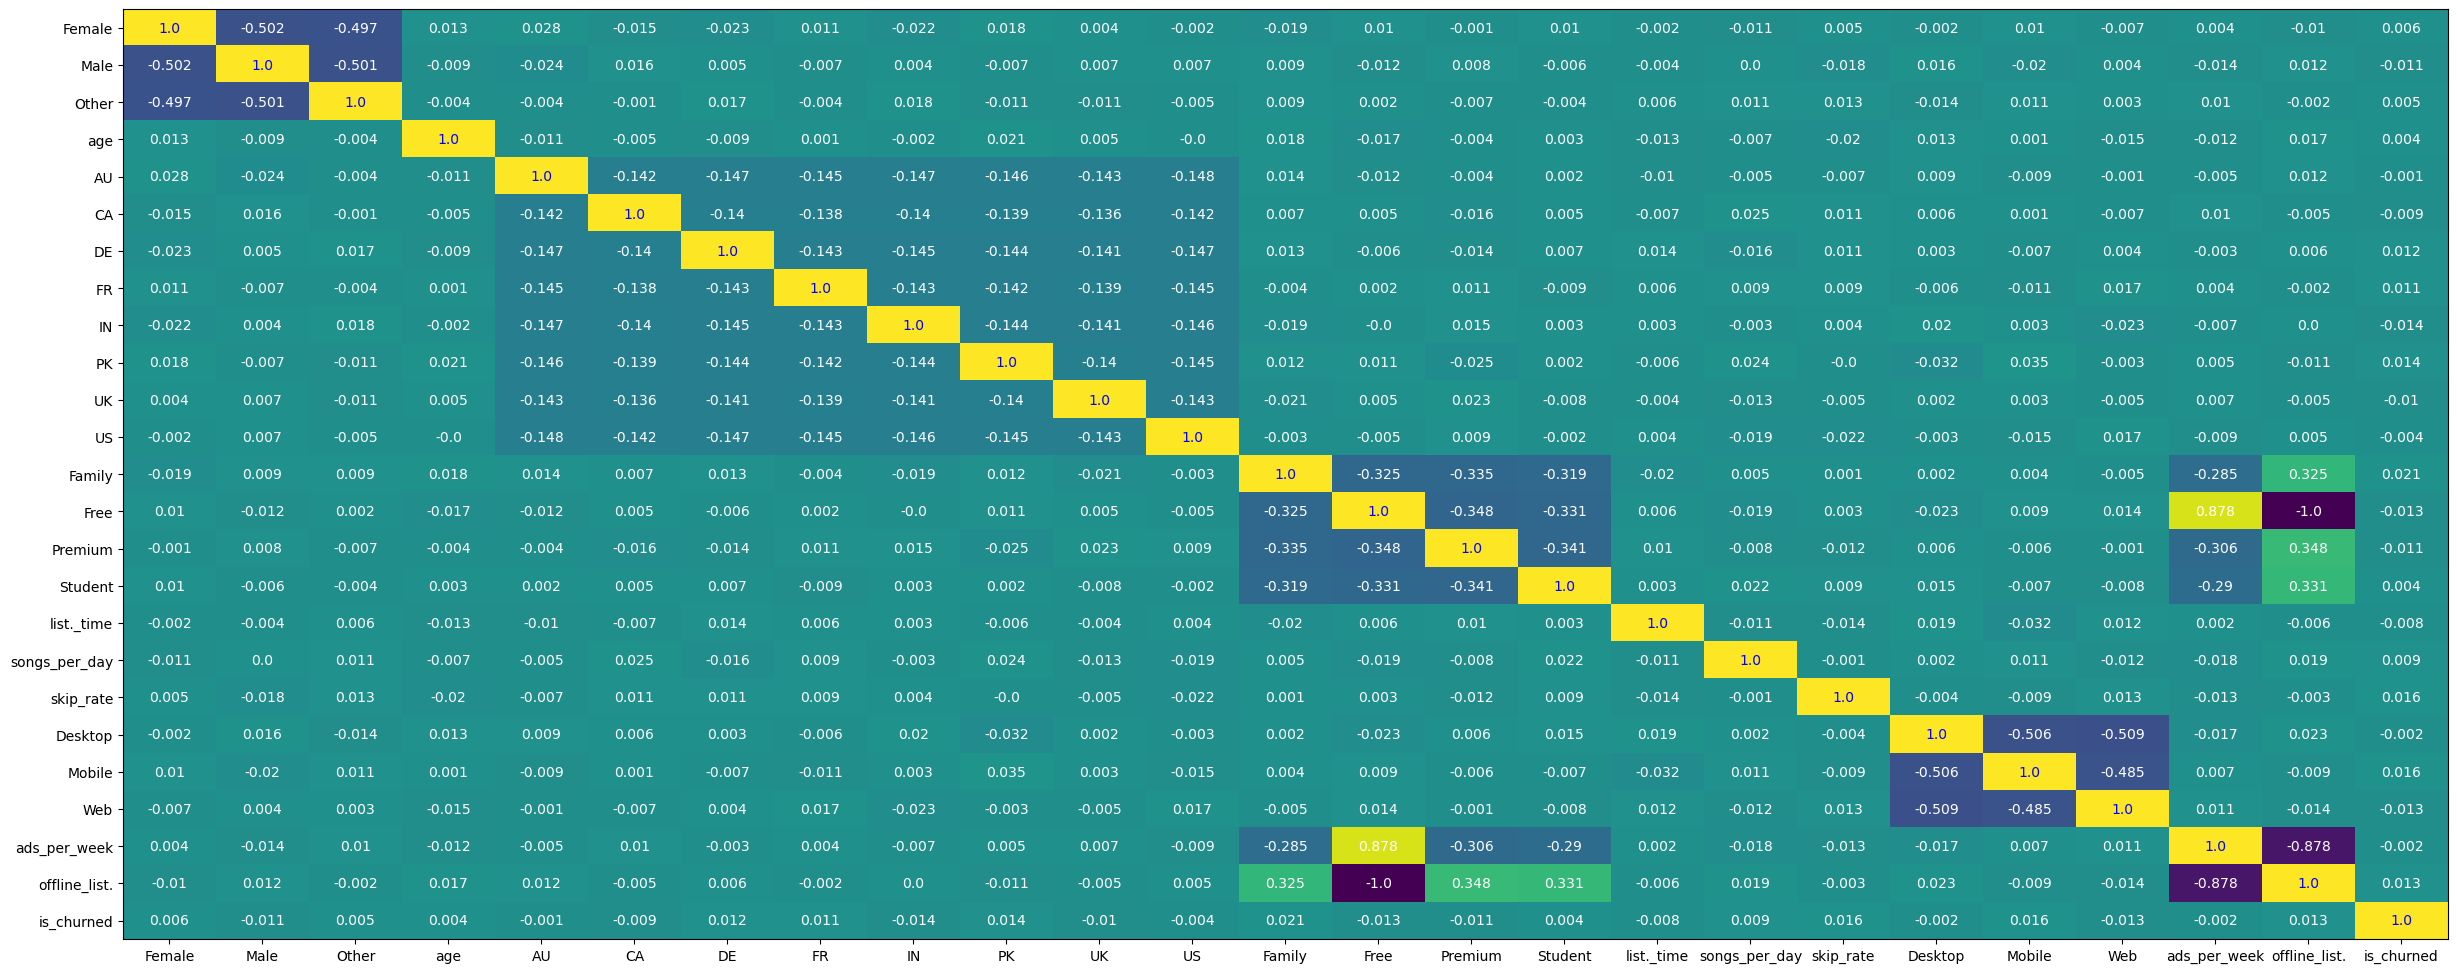

In [13]:
columnas = file.columns

for i in range(len(columnas)):
    for j in range(i + 1, len(columnas)):
        col_x = columnas[i]
        col_y = columnas[j]

        # DESCOMENTAR PARA VER GRAFICAS
        """
        plt.scatter(file[col_x], file[col_y])
        plt.xlabel(col_x)
        plt.ylabel(col_y)
        plt.title(f'{col_x} vs {col_y}')
        plt.grid(True)
        plt.show()
        """
gender = pd.get_dummies(file['gender'])
country = pd.get_dummies(file['country'])
subscription_type = pd.get_dummies(file['subscription_type'])
device_type = pd.get_dummies(file['device_type'])

fileAux = pd.DataFrame({
     #"user_id":file["user_id"]
    
    "Female":gender["Female"]
    ,"Male":gender["Male"]
    ,"Other":gender["Other"]
    ,"age":file["age"]
    
    ,"AU":country["AU"]
    ,"CA":country["CA"]
    ,"DE":country["DE"]
    ,"FR":country["FR"]
    ,"IN":country["IN"]
    ,"PK":country["PK"]
    ,"UK":country["UK"]
    ,"US":country["US"]
    
    ,"Family":subscription_type["Family"]
    ,"Free":subscription_type["Free"]
    ,"Premium":subscription_type["Premium"]
    ,"Student":subscription_type["Student"]
    
    ,"listening_time":file["listening_time"]
    ,"songs_played_per_day":file["songs_played_per_day"]
    ,"skip_rate":file["skip_rate"]
    
    ,"Desktop":device_type["Desktop"]
    ,"Mobile":device_type["Mobile"]
    ,"Web":device_type["Web"]
    
    ,"ads_listened_per_week":file["ads_listened_per_week"]
    ,"offline_listening":file["offline_listening"]
    ,"is_churned":file["is_churned"]
})

correlaciones= fileAux.corr()

plt.figure(figsize=(30,30))
#fig, ax = plt.subplots()
#plt.subplots_adjust(wspace=100000)
plt.imshow(correlaciones, aspect=0.4)


labs=["Female", "Male", "Other"
    ,"age"
    ,"AU", "CA" ,"DE" ,"FR" ,"IN" ,"PK" ,"UK" ,"US"
    ,"Family" ,"Free" ,"Premium","Student"
    ,"list._time" ,"songs_per_day" ,"skip_rate"
    ,"Desktop" ,"Mobile" ,"Web"
    ,"ads_per_week" ,"offline_list." ,"is_churned"
]


plt.xticks(np.arange(len(labs)), labels = labs)
plt.yticks(np.arange(len(labs)), labels = labs)

#print(correlaciones)


for i in range(len(labs)):
    for j in range(len(labs)):
        colum = correlaciones.columns[j]
        if j == i:
            text = plt.text(j, i, round(correlaciones[colum].iloc[i], 3),
                       ha = "center", va = "center", color = "b")
        else:
            text = plt.text(j, i, round(correlaciones[colum].iloc[i], 3),
                       ha = "center", va = "center", color = "w")

plt.show()
                       

Tras observar los valores con detenimiento (e ignorando las correlaciones de 1 que salen al comparar una columna consigo misma (ya que cuando una columna crece, naturalmente, la columna crece) e ignorando tambien las relaciones entre columnas que han sido divididas, como genero con femenino y masculino (ya que cuando alguien tiene de genero femenino no puede ser masculino) e igual con other), se puede observar que en este dataset apenas existe relacion entre las columnas. Existen unas pocas un tanto obvias, como puede ser tener una subscripcion de pago y no tener anuncios, pero cuando tu subscripcion es gratis tampoco sabemos mucha información de cuantos anuncios vas a tener. Otra es el tiempo de escucha offline y los anuncios escuchados, ya que si escuchas sin conexión a wifi, no te van a salir anuncios (ademas que esto solo se daria con subscripciones de pago, por lo que termina dando la misma informacion, subscripcion de pago no tiene anuncios). Tras este analisis se considera que realizar un modelo de regresión lineal univariable es inutil, ya que no existe una columna que ofrezca un muy buen valor de otra. Lo unico que se puede probar es si con muchas columnas se puede llegar a un buen resultado, por tanto se implementará un modelo de regresión lineal multivariable.

## Implementacion del modelo (1)
Tras la investigación de relaciones y haber dejado claro que el modelo debe ser multivariable, se va a escoger como clase la columna "age", ya que consideramos que puede ser de utilidad para una empresa conocer la edad de sus clientes. Esta clase se va a predecir con las columnas: "listening_time", "songs_played_per_day" y "skip_rate". Se han elegido estas clases porque podriamos encontrar una relación oculta entre estas columnas juntas y la edad (lo mismo existe un patron de jovenes que saltan muchas canciones, por lo tanto esuchan muchas distintas al dia y por mucho tiempo).

Se inicializan los valores de X e y.

In [14]:
X = pd.DataFrame({
    #"user_id":file["user_id"]
    
    #,"Female":gender["Female"]
    #,"Male":gender["Male"]
    #,"Other":gender["Other"]
    
    #,"age":file["age"]
    
    #,"AU":country["AU"]
    #,"CA":country["CA"]
    #,"DE":country["DE"]
    #,"FR":country["FR"]
    #,"IN":country["IN"]
    #,"PK":country["PK"]
    #,"UK":country["UK"]
    #,"US":country["US"]
    
    #,"Family":subscription_type["Family"]
    #,"Free":subscription_type["Free"]
    #,"Premium":subscription_type["Premium"]
    #,"Student":subscription_type["Student"]
    
    "listening_time":file["listening_time"]
    ,"songs_played_per_day":file["songs_played_per_day"]
    ,"skip_rate":file["skip_rate"]
    
    #,"Desktop":device_type["Desktop"]
    #,"Mobile":device_type["Mobile"]
    #,"Web":device_type["Web"]
    
    #,"ads_listened_per_week":file["ads_listened_per_week"]
    #,"offline_listening":file["offline_listening"]
    #,"is_churned":file["is_churned"]               
                 })
y = file["age"]

##### Creación de funciones necesarias (1)
Aqui se encuentran todas las funciones necesarias para que la implementación funcione correctamente, incluyendo la función de coste y el desccenso de gradiente, ademas de la normalización y una función para visualizar el trayecto del descenso de gradiente.

In [15]:
def thetaInicial(tam):
    return np.zeros(tam)

def normalize(X):
    mu = X.mean()
    sigma = X.std()
    X_norm = pd.DataFrame((X - mu)/(sigma))
    return X_norm, mu, sigma

# Funcion de coste
def computeCost(X, y, theta):
    m = len(y)
    J = 0
    J = ( 1/(2*m) ) * np.dot(np.transpose(np.dot(X, theta) - y ), np.dot(X, theta) - y )
    return J

# Funcion del gradiente
def gradientDescent(X, y, theta, alpha, iterations):
    
    m = len(y)
    J_history = []
    for current_iter in range(iterations):
        
        aux1 = np.dot (np.transpose(X), (np.dot(X, theta) - y) )
        aux2 = alpha*(1/m)* aux1
        #print("aux2:", aux2)
        #print("theta", theta)
        theta = theta - aux2
        
        current_cost = computeCost(X,y,theta)
        J_history.append(current_cost)
    return theta, J_history
    
# Funcion plot historico del coste
def mostrarHistorico(J_history):
    plt.plot(range(len(J_history)),J_history)
    plt.xlabel("Iteraciones")
    plt.ylabel("Coste")
    #plt.ylim(0, 500)
    plt.show()

### Creación del modelo
Normalizamos los valores de X.

In [16]:
X_norm, mu, sigma = normalize(X)
#X_norm = X
print(X_norm)

      listening_time  songs_played_per_day  skip_rate
0          -1.524339             -0.953514  -0.576791
1          -0.155546              0.417323   0.229688
2           0.534802             -0.426269  -1.498481
3          -1.405313             -1.691657   0.056871
4           1.141833              0.241575   0.344899
...              ...                   ...        ...
7995        0.987099             -0.496568  -0.000734
7996       -1.107750              0.487623   1.669829
7997       -0.869699              0.417323   0.172082
7998        1.082320              1.542113  -0.173551
7999        0.665731              0.628221   0.920956

[8000 rows x 3 columns]


Introducimos la columna de unos como primera columna de X.

In [17]:
ones = np.ones((len(y), 1))
X_norm['uno'] = ones

X_norm = X_norm[[
    'uno'
    #,"user_id"
    
    #,"Female"
    #,"Male"
    #,"Other"
    #,"age"
    
    #,"AU"
    #,"CA"
    #,"DE"
    #,"FR"
    #,"IN"
    #,"PK"
    #,"UK"
    #,"US"
    
    #,"Family"
    #,"Free"
    #,"Premium"
    #,"Student"
    
    ,"listening_time"
    ,"songs_played_per_day"
    ,"skip_rate"
    
    #,"Desktop"
    #,"Mobile"
    #,"Web"
    
    #,"ads_listened_per_week"
    #,"offline_listening"
    #,"is_churned"
]]

print(X_norm)

      uno  listening_time  songs_played_per_day  skip_rate
0     1.0       -1.524339             -0.953514  -0.576791
1     1.0       -0.155546              0.417323   0.229688
2     1.0        0.534802             -0.426269  -1.498481
3     1.0       -1.405313             -1.691657   0.056871
4     1.0        1.141833              0.241575   0.344899
...   ...             ...                   ...        ...
7995  1.0        0.987099             -0.496568  -0.000734
7996  1.0       -1.107750              0.487623   1.669829
7997  1.0       -0.869699              0.417323   0.172082
7998  1.0        1.082320              1.542113  -0.173551
7999  1.0        0.665731              0.628221   0.920956

[8000 rows x 4 columns]


Comprobamos los tamaños.

In [18]:
theta = thetaInicial(X_norm.shape[1])
print(X_norm.shape, y.shape, theta.shape)

(8000, 4) (8000,) (4,)


Ejecutamos la función coste para ver el coste inicial con theta inicializado a 0.

In [19]:
J_base = computeCost(X_norm, y, theta)
print(f"El coste inicializando theta a 0: {J_base}")

El coste inicializando theta a 0: 790.3660625


Inicializamos los thetas y realizamos el gradiente.

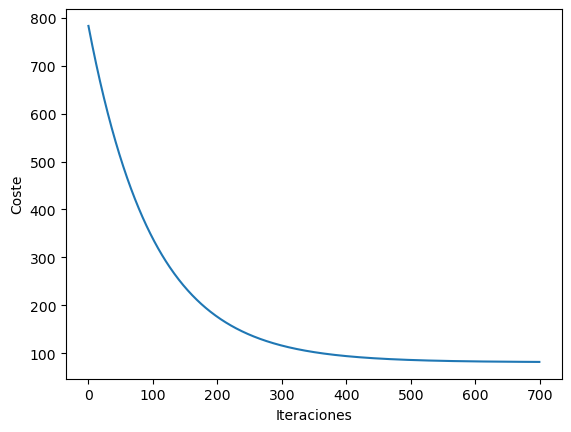

In [20]:
theta = thetaInicial(X_norm.shape[1])
alpha =  0.005
theta, J_history = gradientDescent(X_norm, y, theta, alpha, 700)
mostrarHistorico(J_history)

El gradiente se realiza correctamente ya que el coste converge dadas unas iteraciones. Ahora, para comprobar que se ha realizado correctamente, se van a comparar los valores reales de la clase con los valores predichos por el modelo. Somos conscientes de que se está realizando con los datos de entrenamiento, y que por tanto los resultados deben ser muy positivos por el hecho de que se está prediciento con los datos con los que se ha entrenado, pero observen el resultado.

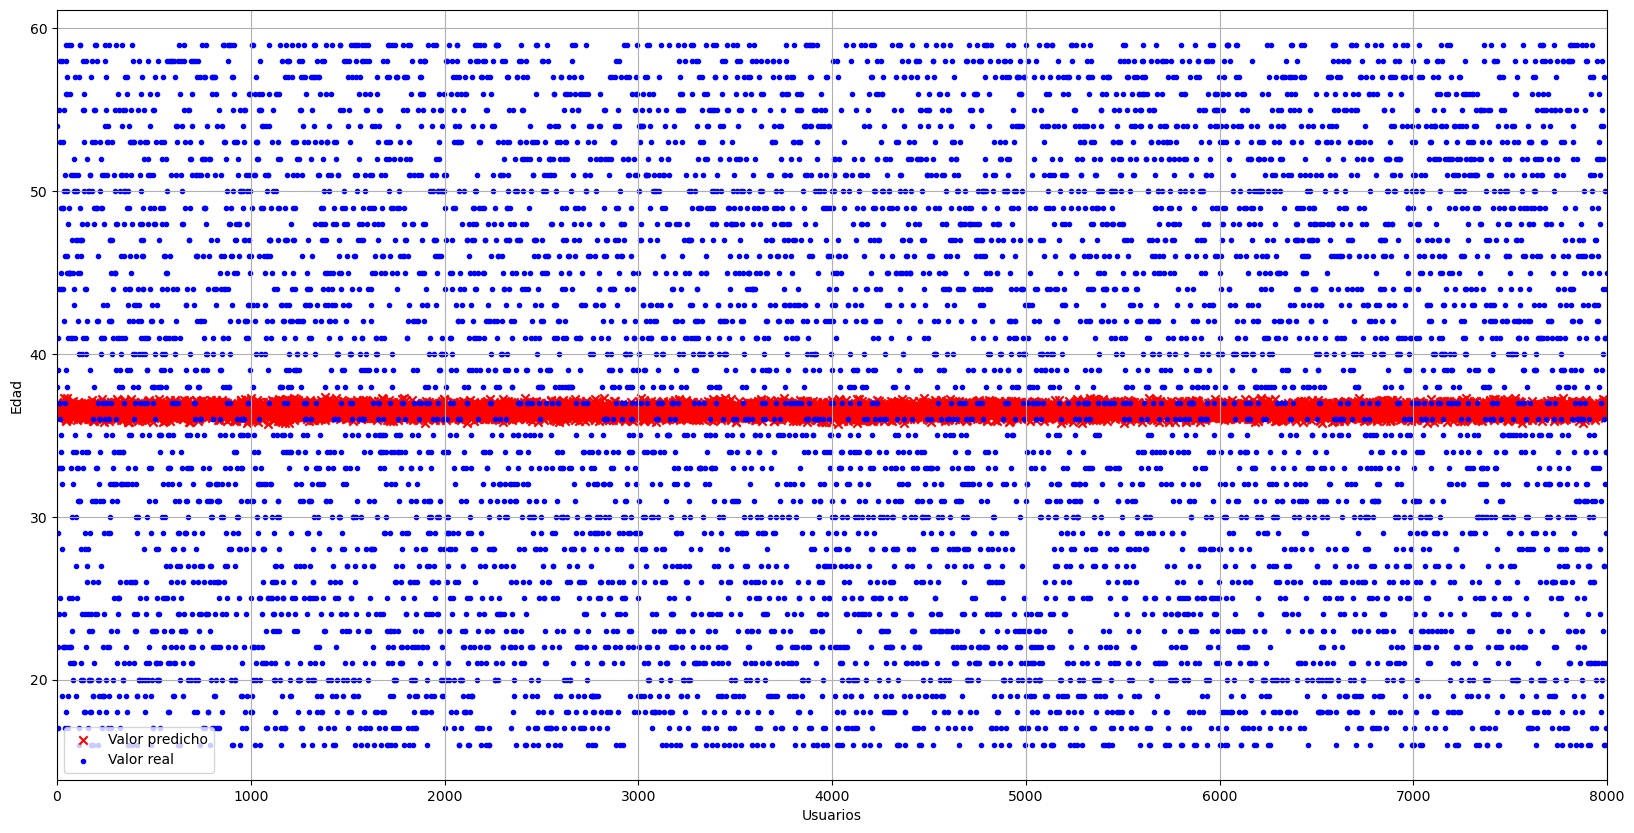

In [21]:
#J = np.dot(theta, [1, 26, 23, 0.2])
#J = np.dot(theta, [1, 141, 62, 0.34])

#J = computeCost(X_norm, y, theta);

predicho = []
for i in range(X.shape[0]):
    J = np.dot(theta, X_norm.iloc[i])
    predicho.append(J)
    #if i < 10:
        #print("Coste:", J)

plt.figure(figsize=(20,10))
plt.scatter(range(X.shape[0]), predicho, marker = "x", c = "red", label="Valor predicho")
plt.scatter(range(X.shape[0]), y, marker = ".", c = "blue", label="Valor real")
plt.xlabel("Usuarios")
plt.ylabel("Edad")
plt.grid(True)
plt.xlim(0, 8000)
#plt.xlim(0, 100) # Cambiar para ver mejor
plt.legend()
plt.show()


Se ha puesto una funcion "plt.xlim(0, 8000)" por si se quieren ver los datos mas de cerca, cambiando de 8000 a 100 se ven mejor.
### ¿Que está pasando?
No hemos explicado anteriormente en profundidad que muestra esta grafica. Los puntos azules muestran los valores reales de la clase del dataset (age) (eje y) para los diferentes usuarios (eje x). Las cruces rojas muestran las predicciones para esos valores. Entonces, ¿porque salen todos en el centro en vez de estar con los azules?. Ademas que se está probando con el conjunto de entrenamiento, deberia de salir un resultado casi perfecto.

Se podría pensar que el alpha no ha sido bien seleccionado o que necesita mas iteraciones, pero si se modifica se verá que, si se consigue un avance es nimio.

Como el resultado es muy desmedido (proponiendo el modelo siempre la media como predicción), hemos contemplado que se pueden estar dando uno de estos dos casos:
1. El modelo es erroneo y no predice correctamente, ni para los datos de entrenamiento.
2. El dataset no tiene columnas con una relacion lo suficientemente fuerte como para crear modelos robustos.

## Implementación del modelo (2)
Como ya se ha demostrado anteriormente que el dataset (comparando columnas individuales) sus columnas tienen muy poca relacion, se va a comprobar ahora si el modelo funciona correctamente probando con un dataset que si tiene columnas relacionadas.
El dataset elegido es "ex1data.txt", el cual tiene dos columnas y su correlación es de más de 0.8, lo que significa que están muy relacionados.

Sobre el fichero ex1data1.txt, contiene los siguientes datos: la primera columna es la población de una ciudad y la segunda es el beneficio de un establecimiento en esa ciudad. Un valor negativo de beneficio indica una pérdida.

In [22]:
file2 = pd.read_csv("ex1data1.txt", names=["poblacion", "beneficio"])
X = pd.DataFrame({"poblacion": file2["poblacion"]})
y = file2["beneficio"]
file2.corr()

poblacion  beneficio
poblacion   1.000000   0.837873
beneficio   0.837873   1.000000

Se procede con el mismo procedimiento que con el dataset de Spotify.

In [23]:
X_norm, mu, sigma = normalize(X)
#X_norm = X
print(X_norm)

    poblacion
0   -0.529654
1   -0.680150
2    0.092716
3   -0.298872
4   -0.594333
..        ...
92  -0.591517
93  -0.737593
94   0.034523
95   1.352547
96  -0.703613

[97 rows x 1 columns]


In [24]:
ones = np.ones((len(y), 1))
X_norm['uno'] = ones
X_norm = X_norm[[
    "uno", "poblacion"
]]
print(X_norm)

    uno  poblacion
0   1.0  -0.529654
1   1.0  -0.680150
2   1.0   0.092716
3   1.0  -0.298872
4   1.0  -0.594333
..  ...        ...
92  1.0  -0.591517
93  1.0  -0.737593
94  1.0   0.034523
95  1.0   1.352547
96  1.0  -0.703613

[97 rows x 2 columns]


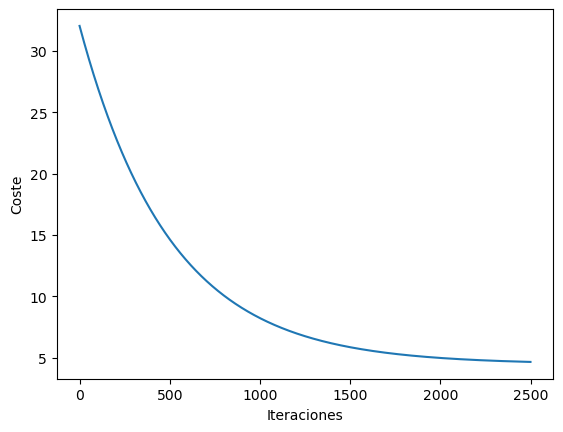

In [25]:
theta = thetaInicial(X_norm.shape[1])
alpha =  0.001
theta, J_history = gradientDescent(X_norm, y, theta, alpha, 2500)
mostrarHistorico(J_history)

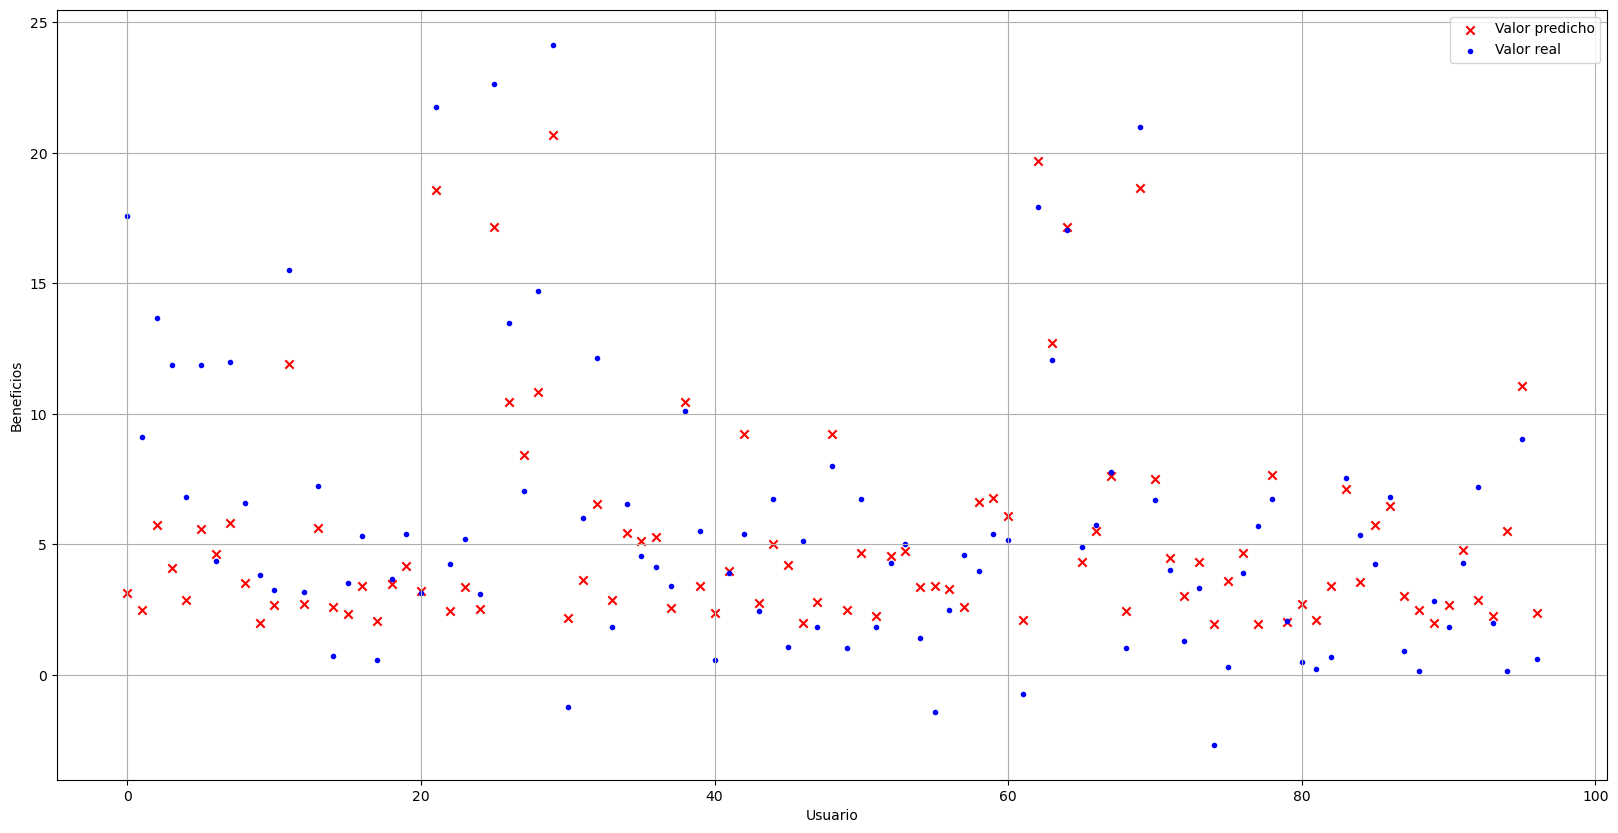

In [26]:
predicho = []
for i in range(X.shape[0]):
    J = np.dot(theta, X_norm.iloc[i])
    predicho.append(J)
    #if i < 10:
        #print("Coste:", J)

plt.figure(figsize=(20,10))
plt.scatter(range(X.shape[0]), predicho, marker = "x", c = "red", label="Valor predicho")
plt.scatter(range(X.shape[0]), y, marker = ".", c = "blue", label="Valor real")
plt.xlabel("Usuario")
plt.ylabel("Beneficios")
plt.grid(True)
#plt.xlim(0, 100)
plt.legend()
plt.show()

Al ser un modelo univariable si se puede pintar la recta de regresion y comprobar que efectivamente se adecua bien a los datos.

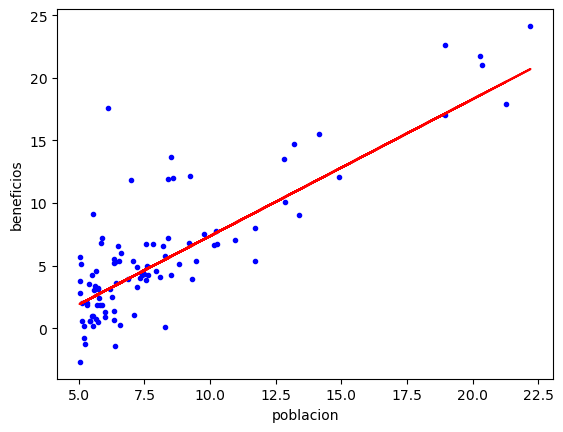

In [27]:
plt.plot(X, np.dot(X_norm,theta), color="red")
plt.scatter(X,y,marker = ".", c = "blue")
plt.xlabel("poblacion")
plt.ylabel("beneficios")
plt.show()

La implementacion no es erronea, ya que para un dataset con columnas relacionadas es capaz de encontrar un modelo que se adecua a los datos, sin embargo en el caso del dataset "spotify_churn_dataset.csv" no es capaz de encontrar un modelo que prediga valores distintos a la media, por lo tanto, sumado a las correlaciones que exploramos al inicio, se puede concretar que este dataset no es util para la realización de modelos y que por tanto los modelos serán poco precisos.

Partiendo de esto, se realizaran los modelos, pero naturalmente los resultados no van a tener ningun valor, puesto que este dataset no es valido para realizar modelos.

## Implementación del modelo (3)
Se va a realizar un modelo que prediga el numero de anuncios semanales con las columnas de tipo de subscripcion, tipo de dispositivo, tiempo de escucha diario, canciones escuchadas por dia y ratio de cambio de canción. Se ha tomado la columna de tipo de subscripcion por lo mencionado cuando se hizo la correlacion de las columnas (para las subscripciones de pago, al no haber anuncios, tiene una alta relacion, pero no es capaz de decir cuantos anuncios tienen las personas con una subscripcion gratuita). Se ha tomado el tipo de dispositivo porque se conoce que en el ambito real, hay dispositivos en los que saltan mas anuncios por hora que en otros (en los moviles por ejemplo). Se han tomado tiempo de escucha diario, canciones escuchadas por dia y ratio de cambio de canción porque podrían ser variables que afecten al numero de anuncios en conjunto (por ejemplo, si se saltan muchas canciones, )

### Inicialización de los parámetros.

In [28]:
X = pd.DataFrame({
    #"user_id":file["user_id"]
    
    #,"Female":gender["Female"]
    #,"Male":gender["Male"]
    #,"Other":gender["Other"]
    
    #,"age":file["age"]
    
    #,"AU":country["AU"]
    #,"CA":country["CA"]
    #,"DE":country["DE"]
    #,"FR":country["FR"]
    #,"IN":country["IN"]
    #,"PK":country["PK"]
    #,"UK":country["UK"]
    #,"US":country["US"]
    
    "Family":subscription_type["Family"]
    ,"Free":subscription_type["Free"]
    ,"Premium":subscription_type["Premium"]
    ,"Student":subscription_type["Student"]
    
    ,"listening_time":file["listening_time"]
    ,"songs_played_per_day":file["songs_played_per_day"]
    ,"skip_rate":file["skip_rate"]
    
    ,"Desktop":device_type["Desktop"]
    ,"Mobile":device_type["Mobile"]
    ,"Web":device_type["Web"]
    
    #,"ads_listened_per_week":file["ads_listened_per_week"]
    #,"offline_listening":file["offline_listening"]
    #,"is_churned":file["is_churned"]               
                 })
y = file["ads_listened_per_week"]

##### Funciones adicionales (2)
Otras funciones fueron añadidas en la primera implementación.

In [29]:
def generaIndicesKFolds(X, k):
    kf = KFold(n_splits=k)

    listado = []
    
    for i, (train_index, test_index) in enumerate(kf.split(X)):

        listado.append({"Train":train_index, "Test":test_index})
        
        """
        print(f"Fold {i}:")
        print(f"  Train: index={train_index}")
        print(f"  Test:  index={test_index}")
        """
    return listado

def generaContenidoKFolds(X, y, indices):

    """
    X_train = pd.DataFrame()
    for index in indices["Train"]:
        X_train = X.iloc[index]
        y_train = y[[index]]
        
    for index in indices["Test"]:
        X_test = X.iloc[index]
        y_test = y[[index]]
    """
    X_train = X.iloc[indices["Train"] ]
    y_train = y.iloc[indices["Train"] ]
    
    X_val = X.iloc[indices["Test"] ]
    y_val = y.iloc[ indices["Test"] ]
    return X_train, y_train, X_val, y_val

def generaTrainTest(X, y, tamTest = 0.3):
    
    listaTest = []
    listaTrain = []
    i = 0
    tamanyo = int(len(y) * tamTest)
    while i < tamanyo:
        numero = int(random.random() * len(y))
        if numero not in listaTest:
            listaTest.append(numero)
            i += 1

    for i in range(len(y)):
        if i not in listaTest:
            listaTrain.append(i)

    X_train = X.iloc[listaTrain ]
    y_train = y[listaTrain]
    
    X_test = X.iloc[listaTest ]
    y_test = y[ listaTest ]
    return X_train, y_train, X_test, y_test

def normalizaYAnyade(X):
    X_norm, mu, sigma = normalize(X)
    
    ones = np.ones((X.shape[0], 1))
    X_norm['uno'] = ones

    array = ["uno"]
    for columna in X.columns:
        array.append(columna)
    
    X_norm = X_norm[array]
    #print(X_norm)
    return X_norm, mu, sigma

def calculaErrores(X, theta, y):
    MAE = 0
    MSE = 0
    RMSE = 0
    for i in range(len(y)):
        MAE += np.abs(y.iloc[i] - np.dot(theta, X.iloc[i]) )
        MSE += np.power(y.iloc[i] - np.dot(theta, X.iloc[i]) , 2)
    MAE = MAE/len(y)
    MSE = MSE/len(y)
    RMSE = np.sqrt(MSE)
    
    return  MAE, MSE, RMSE

### Fase de entrenamiento Y Evolución de la función de coste (Grafico de convergencia)
Se separa el conjunto original en train general y test general. Para cada iteracion del cross validation, se genera a partir del train general un conjunto train y otro validation, con los cuales se trabajará, mejorará el modelo y comprobará el error existente.

Fold 0


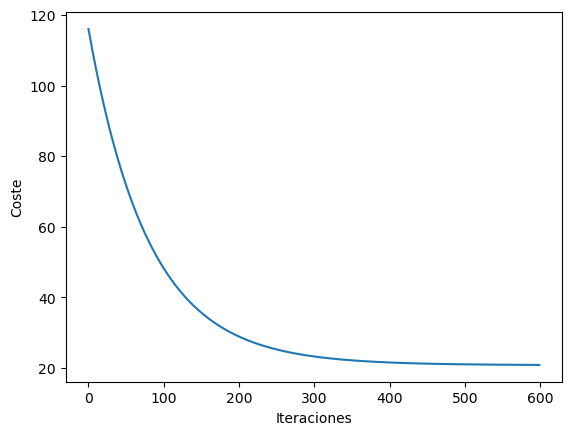

MAE: 2.675379634065344, MSE: 34.789669484644854, RMSE: 5.898276823331104
Fold 1


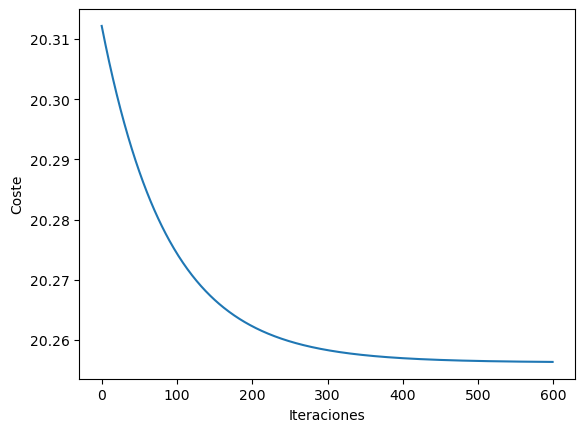

MAE: 3.277324546760404, MSE: 45.05130206073695, RMSE: 6.712026673124664
Fold 2


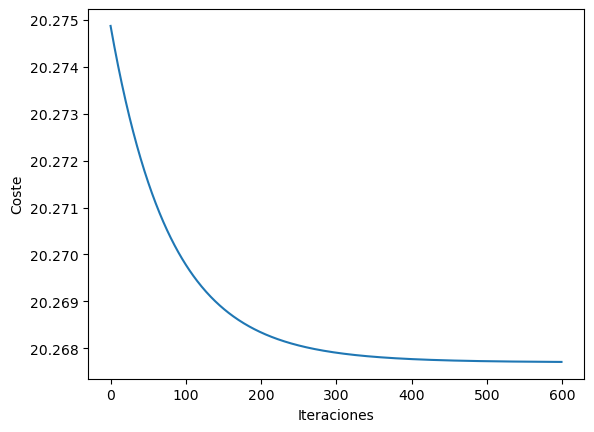

MAE: 3.202001614401037, MSE: 44.96534594886376, RMSE: 6.7056204745619
Fold 3


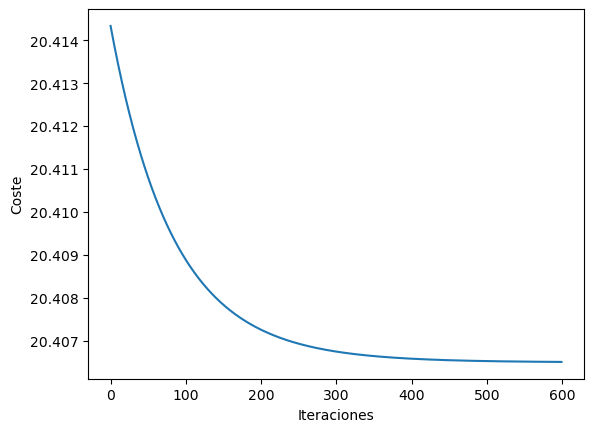

MAE: 3.015925557559419, MSE: 42.0261490287511, RMSE: 6.482757825860157
Fold 4


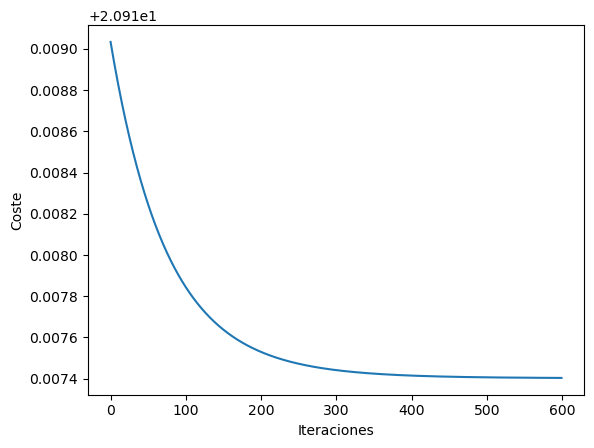

MAE: 2.6862831684622255, MSE: 32.858567150091766, RMSE: 5.73223927885881
Fold 5


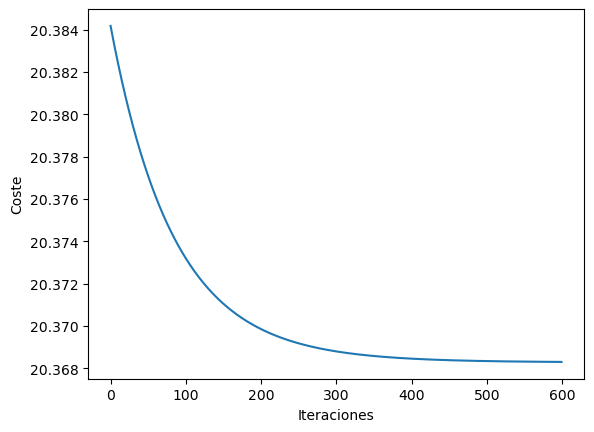

MAE: 3.2604988120814355, MSE: 44.051814369162706, RMSE: 6.637154086591836
Fold 6


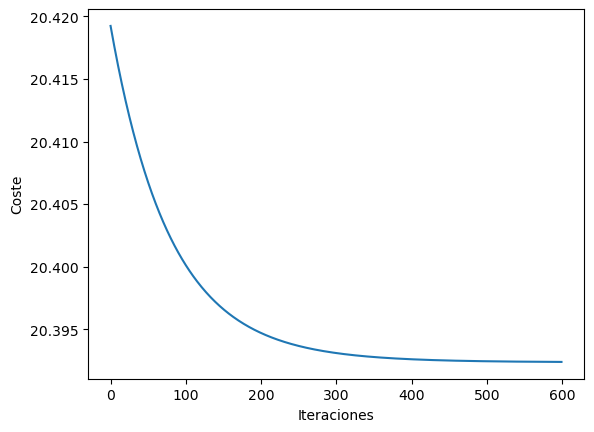

MAE: 2.953177836385794, MSE: 42.45503943497949, RMSE: 6.515753174804851
Fold 7


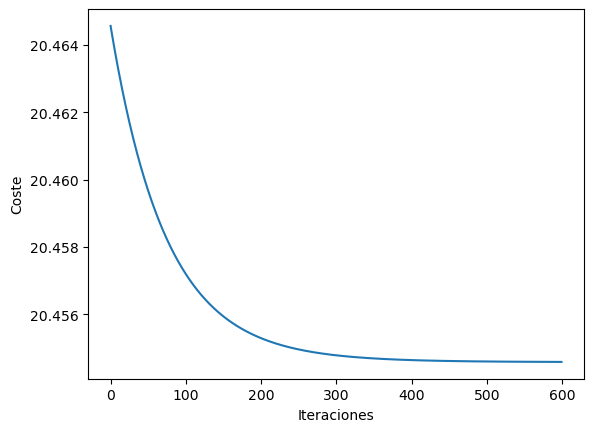

MAE: 2.9511013350989366, MSE: 41.12514602069546, RMSE: 6.412889054138974
Fold 8


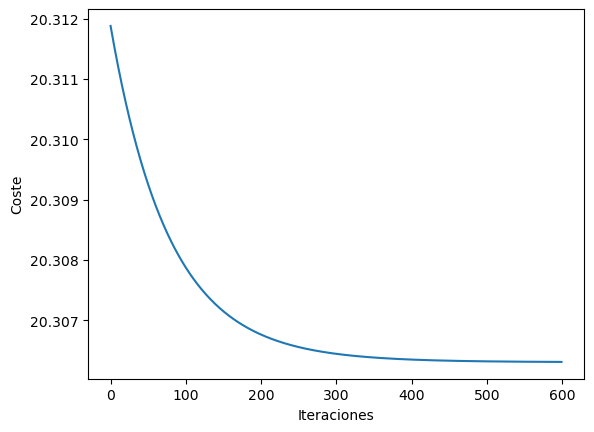

MAE: 3.0014250683457835, MSE: 43.927327125435355, RMSE: 6.627769392897987
Fold 9


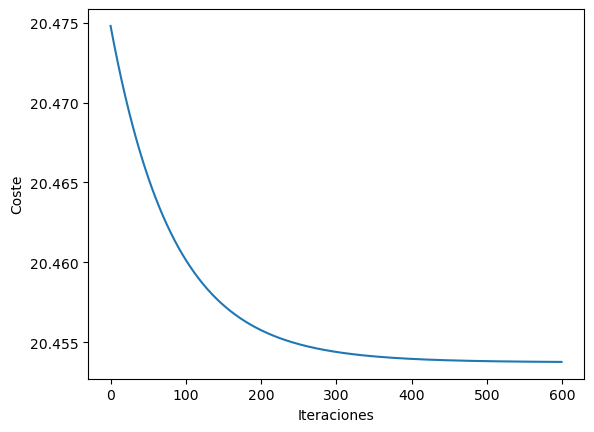

MAE: 3.1652465866019646, MSE: 43.86225317434838, RMSE: 6.622858383987112


In [30]:
theta = thetaInicial(X.shape[1] + 1)

X_trainGen, y_trainGen, X_testGen, y_testGen = generaTrainTest(X, y, tamTest = 0.3)
#print(X_trainGen)

listado = generaIndicesKFolds(X_trainGen, 10)

for i in range(len(listado)):
    print(f"Fold {i}")
    X_train, y_train, X_val, y_val = generaContenidoKFolds(X_trainGen, y_trainGen, listado[i] ) # Genera una iteracion del cross validation
    
    X_norm, mu, sigma = normalizaYAnyade(X_train)

    alpha =  0.005
    theta, J_history = gradientDescent(X_norm, y_train, theta, alpha, 600)
    mostrarHistorico(J_history)

    X_val_norm, mu, sigma = normalizaYAnyade(X_val)
    MAE, MSE, RMSE = calculaErrores(X_val_norm, theta, y_val)
    print(f"MAE: {MAE}, MSE: {MSE}, RMSE: {RMSE}")   
    

### Fase de predicción Y Métrica de evaluación apropiada.
Una vez se ha entrenado el modelo, se normaliza el conjunto de test, se calculan sus predicciones y se comparan con los valores reales de test general.

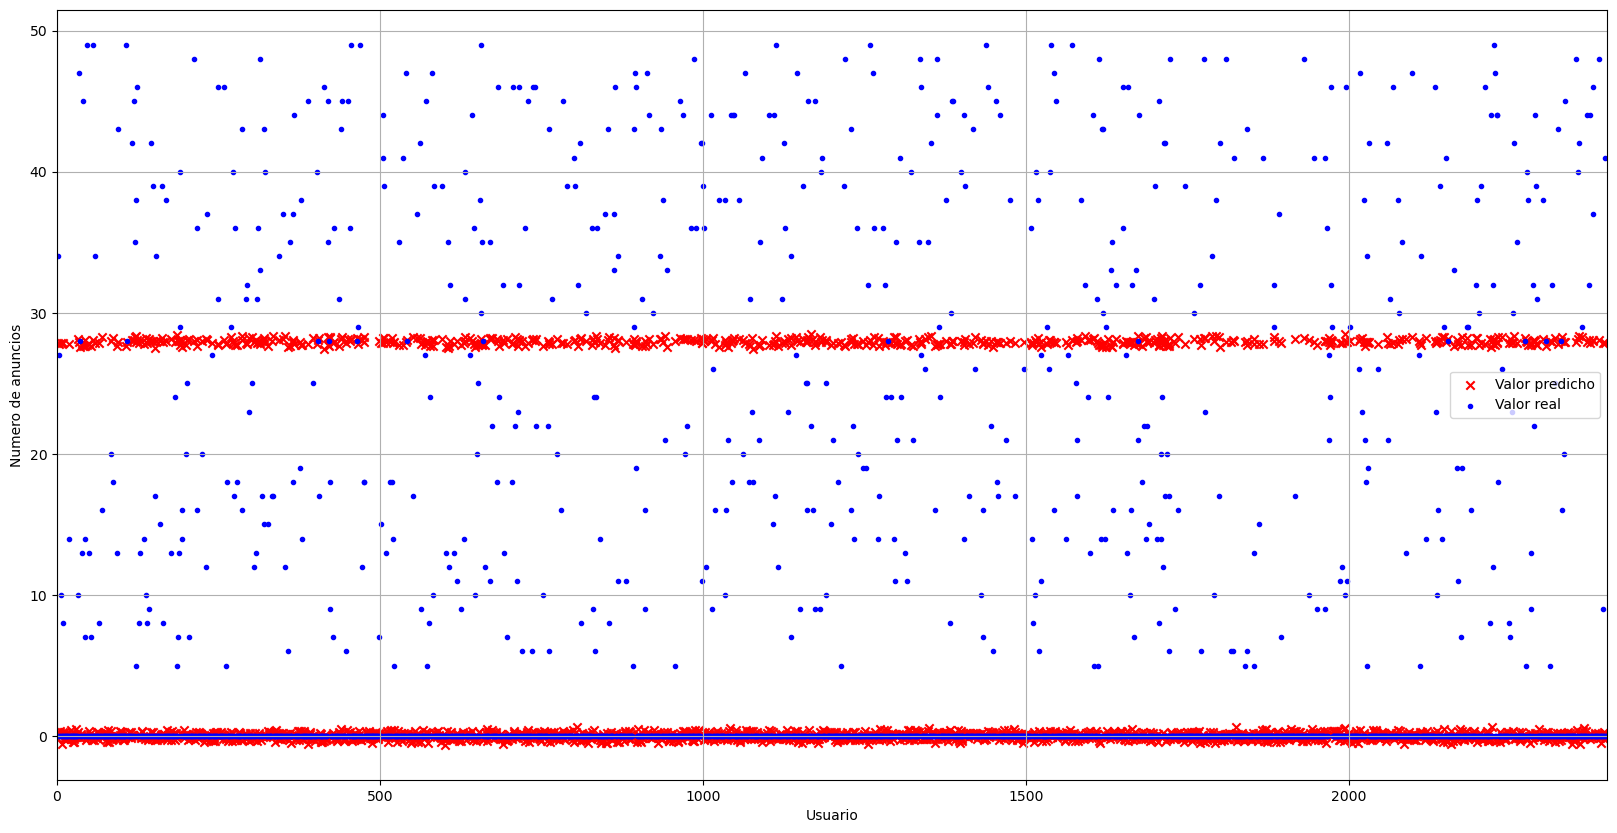

MAE: 3.1546096888482995, MSE: 46.12161441887098, RMSE: 6.791289599101998


In [31]:
predicho = []

# Se predice con el conjunto de entrenamiento
X_testGen_Norm, mu, sigma= normalizaYAnyade(X_testGen)
for i in range(X_testGen_Norm.shape[0]):
    J = np.dot(theta, X_testGen_Norm.iloc[i])
    predicho.append(J)



plt.figure(figsize=(20,10))
plt.scatter(range(X_testGen_Norm.shape[0]), predicho, marker = "x", c = "red", label="Valor predicho")
plt.scatter(range(X_testGen_Norm.shape[0]), y_testGen, marker = ".", c = "blue", label="Valor real")
plt.xlabel("Usuario")
plt.ylabel("Numero de anuncios")
plt.grid(True)
plt.xlim(0, X_testGen_Norm.shape[0]) # Se reduce el campo de vision para obervar mejor un ejemplo
#plt.xlim(0, 100) 
plt.legend()
plt.show()

MAE, MSE, RMSE = calculaErrores(X_testGen_Norm, theta, y_testGen)
print(f"MAE: {MAE}, MSE: {MSE}, RMSE: {RMSE}")

El modelo es capaz de encontrar correctamente los usuarios que no tienen anuncios (por el tipo de subscripcion, tal y como comentamos cuando se hicieron los coeficientes de corelacion) pero no es capaz de decir cuantos anuncios tienen los usuarios que tienen anuncios (también se comentó cuando se hizo el estudio de las correlaciones), asi que el modelo actua según lo esperado.

Los resultados de los errores podrian parecer bajos viendo los resultados dados en la grafica, ya que dice que el error absoluto medio es de 2.94 y el modelo no es capaz de salirse de la media, pero es tal y como comentamos anteriormente, como el modelo no es capaz de encontrar una relación a encontrado que si predice siempre en la media minimiza el error, por eso es el error tan bajo. Ademas como sus valores se alejan mucho de los reales, por lo que existen fallos grandes, el MSE se incrementa en gran medida.

# Modificaciones
Nuestro trabajo tratará las modificaciones de la regresión lineal.

## Apartado 1
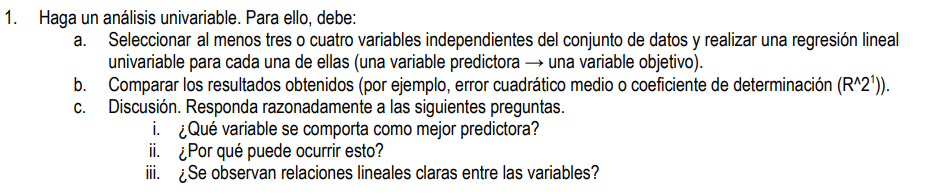

Tal como indica el enunciado del apartado 1, se seleccionarán 3/4 variables y se implementará una regresión lineal para cada una de ellas que prediga una variable del dataset. Se va a seleccionar como clase la columna "ads_listened_per_week", y como columnas predictoras "listening_time", "age", "offline_listening" y "songs_played_per_day".

### Apartado a
Se realiza un modelo de regresion lineal para cada variable.

#### Implementacion 1. listening_time

In [32]:
X = pd.DataFrame({"listening_time":file["listening_time"]})
y = file["ads_listened_per_week"]

In [33]:
theta = thetaInicial(X.shape[1] + 1)

X_trainGen, y_trainGen, X_testGen, y_testGen = generaTrainTest(X, y, tamTest = 0.3)
#print(X_trainGen)

listado = generaIndicesKFolds(X_trainGen, 10)

for i in range(len(listado)):
    print(f"Fold {i}")
    X_train, y_train, X_val, y_val = generaContenidoKFolds(X_trainGen, y_trainGen, listado[i] ) # Genera una iteracion del cross validation
    
    X_norm, mu, sigma = normalizaYAnyade(X_train)

    alpha =  0.005
    theta, J_history = gradientDescent(X_norm, y_train, theta, alpha, 600)
    #mostrarHistorico(J_history)

    X_val_norm, mu, sigma = normalizaYAnyade(X_val)
    MAE, MSE, RMSE = calculaErrores(X_val_norm, theta, y_val)
    print(f"MAE: {MAE}, MSE: {MSE}, RMSE: {RMSE}")

Fold 0
MAE: 9.653099811785772, MSE: 161.20097837770052, RMSE: 12.696494727983016
Fold 1
MAE: 10.372650341348482, MSE: 192.95148429325494, RMSE: 13.890697761208935
Fold 2
MAE: 10.29590532635863, MSE: 185.29339886980387, RMSE: 13.612251792771241
Fold 3
MAE: 10.133186709970914, MSE: 178.11208316330354, RMSE: 13.345863897226868
Fold 4
MAE: 10.076995755918567, MSE: 170.60009626760737, RMSE: 13.061397179000696
Fold 5
MAE: 10.824008188082578, MSE: 214.45225003037663, RMSE: 14.644188268059676
Fold 6
MAE: 10.055100268049992, MSE: 173.85865369283042, RMSE: 13.185547151818556
Fold 7
MAE: 10.136298589027737, MSE: 178.27663201092903, RMSE: 13.352027262214866
Fold 8
MAE: 10.127848897871317, MSE: 177.8578234493473, RMSE: 13.336334708207772
Fold 9
MAE: 9.982113416186749, MSE: 175.52842661065202, RMSE: 13.248714149329814


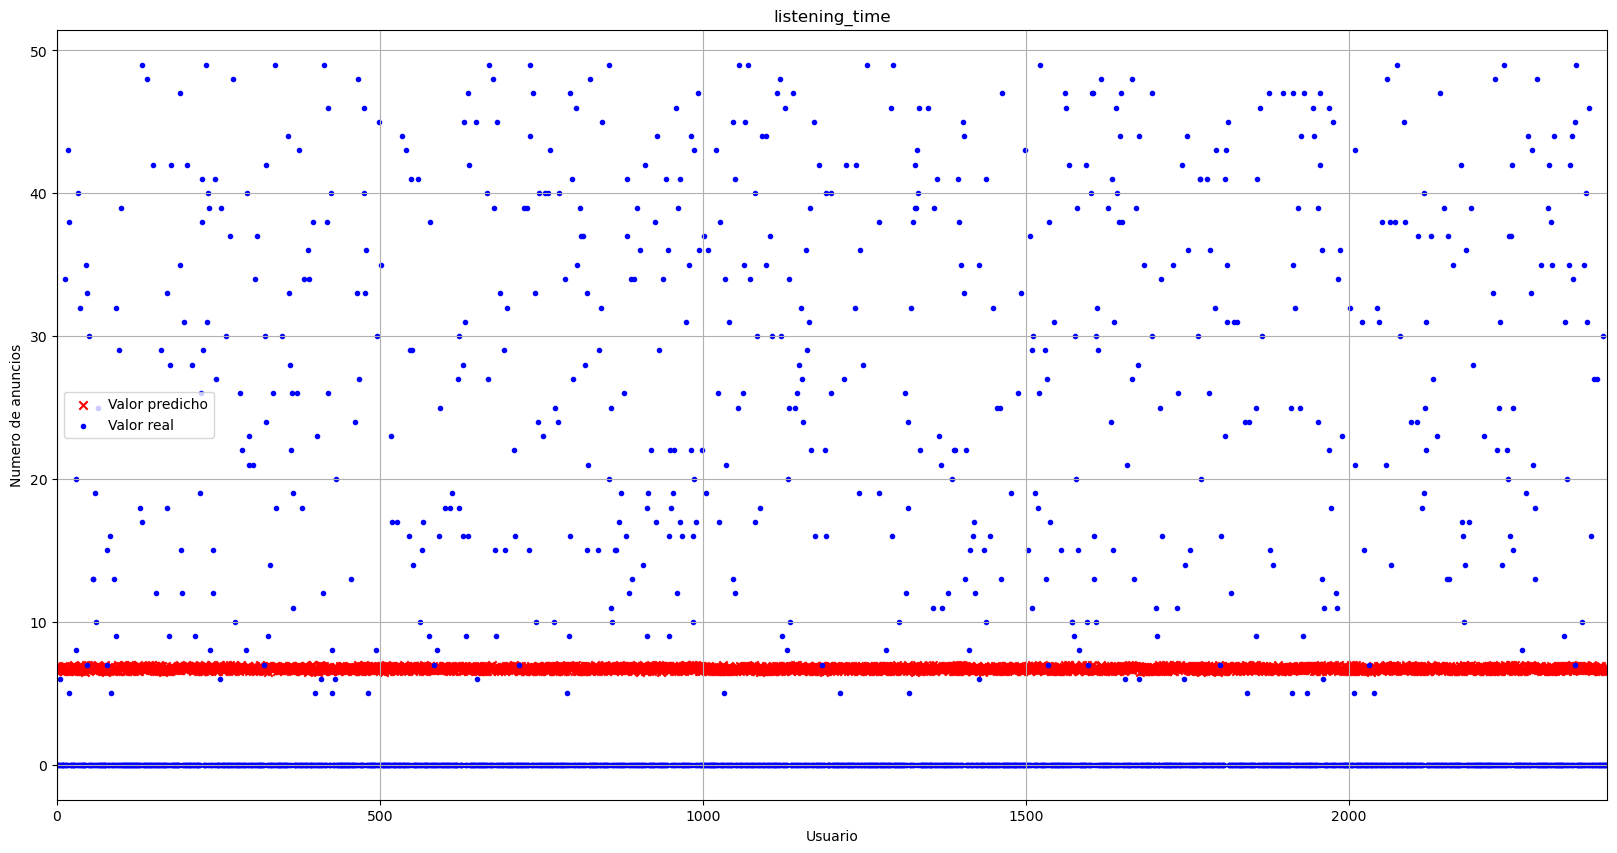

MAE: 10.59829332793268, MSE: 196.61586604188022, RMSE: 14.021977964676745


In [34]:
predicho = []

# Se predice con el conjunto de entrenamiento
X_testGen_Norm, mu, sigma= normalizaYAnyade(X_testGen)
for i in range(X_testGen_Norm.shape[0]):
    J = np.dot(theta, X_testGen_Norm.iloc[i])
    predicho.append(J)



plt.figure(figsize=(20,10))
plt.scatter(range(X_testGen_Norm.shape[0]), predicho, marker = "x", c = "red", label="Valor predicho")
plt.scatter(range(X_testGen_Norm.shape[0]), y_testGen, marker = ".", c = "blue", label="Valor real")
plt.xlabel("Usuario")
plt.ylabel("Numero de anuncios")
plt.grid(True)
plt.xlim(0, X_testGen_Norm.shape[0]) # Se reduce el campo de vision para obervar mejor un ejemplo
#plt.xlim(0, 100) 
plt.title("listening_time")
plt.legend()
plt.show()

MAE1, MSE1, RMSE1 = calculaErrores(X_testGen_Norm, theta, y_testGen)
print(f"MAE: {MAE1}, MSE: {MSE1}, RMSE: {RMSE1}")

#### Implementacion 2. age

In [35]:
X = pd.DataFrame({"age":file["age"]})
y = file["ads_listened_per_week"]

In [36]:
theta = thetaInicial(X.shape[1] + 1)

X_trainGen, y_trainGen, X_testGen, y_testGen = generaTrainTest(X, y, tamTest = 0.3)
#print(X_trainGen)

listado = generaIndicesKFolds(X_trainGen, 10)

for i in range(len(listado)):
    print(f"Fold {i}")
    X_train, y_train, X_val, y_val = generaContenidoKFolds(X_trainGen, y_trainGen, listado[i] ) # Genera una iteracion del cross validation
    
    X_norm, mu, sigma = normalizaYAnyade(X_train)

    alpha =  0.005
    theta, J_history = gradientDescent(X_norm, y_train, theta, alpha, 600)
    #mostrarHistorico(J_history)

    X_val_norm, mu, sigma = normalizaYAnyade(X_val)
    MAE, MSE, RMSE = calculaErrores(X_val_norm, theta, y_val)
    print(f"MAE: {MAE}, MSE: {MSE}, RMSE: {RMSE}")

Fold 0
MAE: 10.00806459342391, MSE: 175.65366478469656, RMSE: 13.253439734072682
Fold 1
MAE: 10.794056529678528, MSE: 205.5021955940306, RMSE: 14.33534776676278
Fold 2
MAE: 10.76306491931452, MSE: 207.21151119680286, RMSE: 14.394843215429713
Fold 3
MAE: 9.835425850987086, MSE: 160.13905691885537, RMSE: 12.654606154237095
Fold 4
MAE: 10.18747237956574, MSE: 170.0058779412248, RMSE: 13.038630217213187
Fold 5
MAE: 10.94356100975848, MSE: 212.67316538251666, RMSE: 14.583318051202088
Fold 6
MAE: 10.395504140591349, MSE: 189.7987763316348, RMSE: 13.77674766886709
Fold 7
MAE: 10.375231440759492, MSE: 187.51176230920436, RMSE: 13.693493429698806
Fold 8
MAE: 10.378960279583513, MSE: 187.2305096402064, RMSE: 13.683220002623885
Fold 9
MAE: 9.570872721391584, MSE: 152.55404878846957, RMSE: 12.35127721284198


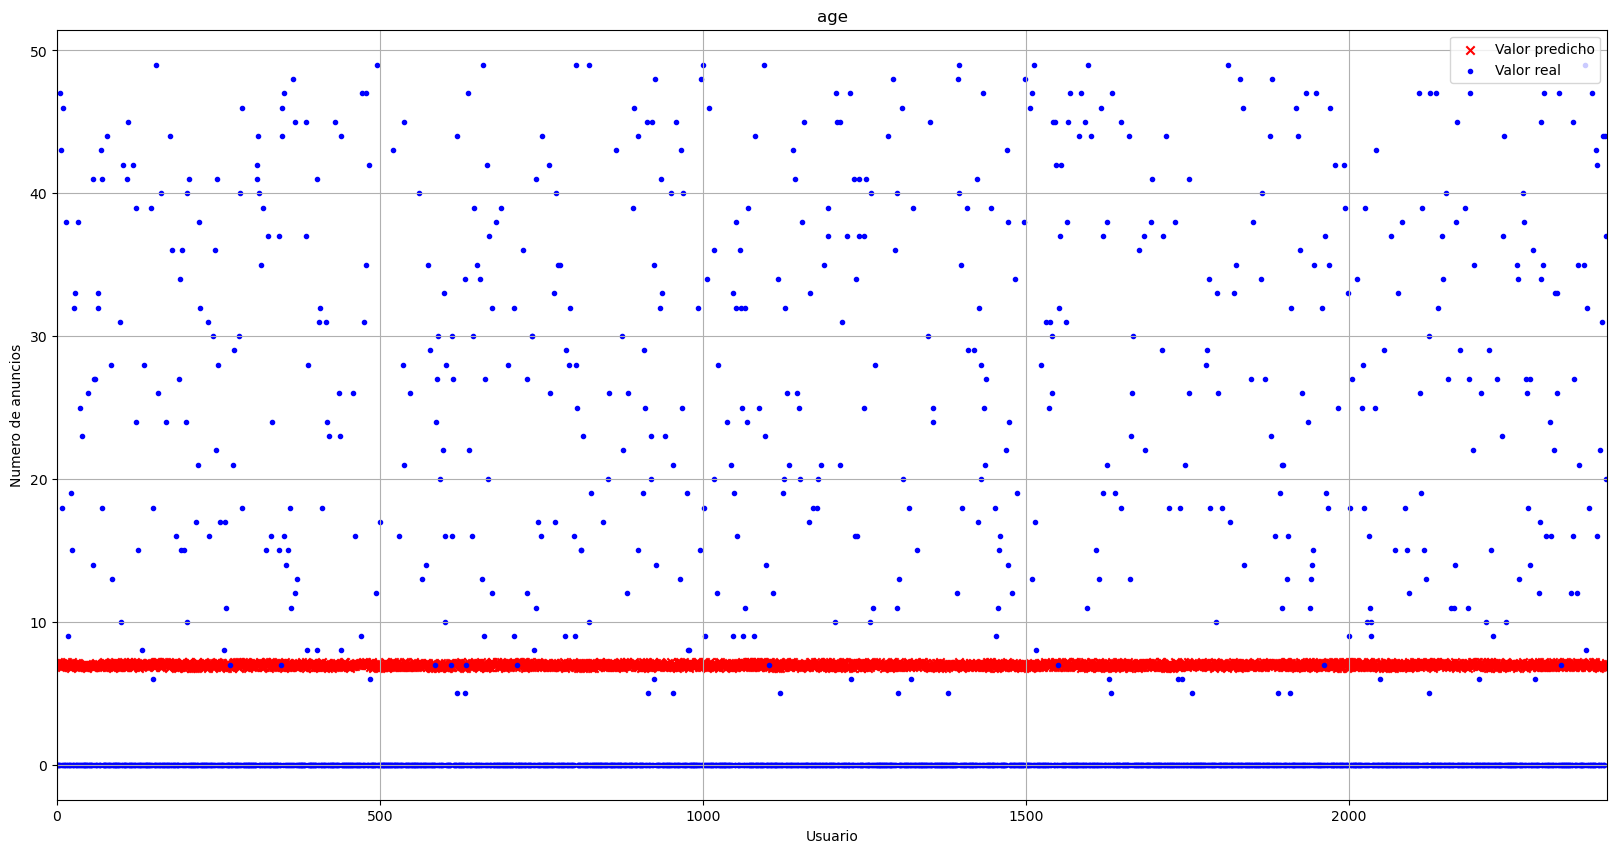

MAE: 10.512367064507112, MSE: 187.0839178740751, RMSE: 13.677862328378477


In [37]:
predicho = []

# Se predice con el conjunto de entrenamiento
X_testGen_Norm, mu, sigma= normalizaYAnyade(X_testGen)
for i in range(X_testGen_Norm.shape[0]):
    J = np.dot(theta, X_testGen_Norm.iloc[i])
    predicho.append(J)



plt.figure(figsize=(20,10))
plt.scatter(range(X_testGen_Norm.shape[0]), predicho, marker = "x", c = "red", label="Valor predicho")
plt.scatter(range(X_testGen_Norm.shape[0]), y_testGen, marker = ".", c = "blue", label="Valor real")
plt.xlabel("Usuario")
plt.ylabel("Numero de anuncios")
plt.grid(True)
plt.xlim(0, X_testGen_Norm.shape[0]) # Se reduce el campo de vision para obervar mejor un ejemplo
#plt.xlim(0, 100) 
plt.title("age")
plt.legend()
plt.show()

MAE2, MSE2, RMSE2 = calculaErrores(X_testGen_Norm, theta, y_testGen)
print(f"MAE: {MAE2}, MSE: {MSE2}, RMSE: {RMSE2}")

#### Implementacion 3. offline_listening

In [38]:
X = pd.DataFrame({"offline_listening":file["offline_listening"]})
y = file["ads_listened_per_week"]

In [39]:
theta = thetaInicial(X.shape[1] + 1)

X_trainGen, y_trainGen, X_testGen, y_testGen = generaTrainTest(X, y, tamTest = 0.3)
#print(X_trainGen)

listado = generaIndicesKFolds(X_trainGen, 10)

for i in range(len(listado)):
    print(f"Fold {i}")
    X_train, y_train, X_val, y_val = generaContenidoKFolds(X_trainGen, y_trainGen, listado[i] ) # Genera una iteracion del cross validation
    
    X_norm, mu, sigma = normalizaYAnyade(X_train)

    alpha =  0.005
    theta, J_history = gradientDescent(X_norm, y_train, theta, alpha, 600)
    #mostrarHistorico(J_history)

    X_val_norm, mu, sigma = normalizaYAnyade(X_val)
    MAE, MSE, RMSE = calculaErrores(X_val_norm, theta, y_val)
    print(f"MAE: {MAE}, MSE: {MSE}, RMSE: {RMSE}")

Fold 0
MAE: 2.6779532366138232, MSE: 36.23150658543258, RMSE: 6.01926129898284
Fold 1
MAE: 3.1624320925859237, MSE: 47.24307672079456, RMSE: 6.873359929524611
Fold 2
MAE: 3.2204804938193736, MSE: 45.79077770431456, RMSE: 6.766888332484478
Fold 3
MAE: 3.201603981909995, MSE: 44.75962358012574, RMSE: 6.690263341612626
Fold 4
MAE: 2.5797691180036155, MSE: 34.271627293098504, RMSE: 5.854197408108007
Fold 5
MAE: 3.4669652266003483, MSE: 50.77038036620098, RMSE: 7.125333702094308
Fold 6
MAE: 2.543852879237334, MSE: 34.81304312348319, RMSE: 5.900257886184568
Fold 7
MAE: 2.8314010884788843, MSE: 41.95440472424362, RMSE: 6.477221991274008
Fold 8
MAE: 2.775733803137957, MSE: 41.45062970512388, RMSE: 6.438216345007667
Fold 9
MAE: 3.2382069744092004, MSE: 47.01055938201025, RMSE: 6.856424679234086


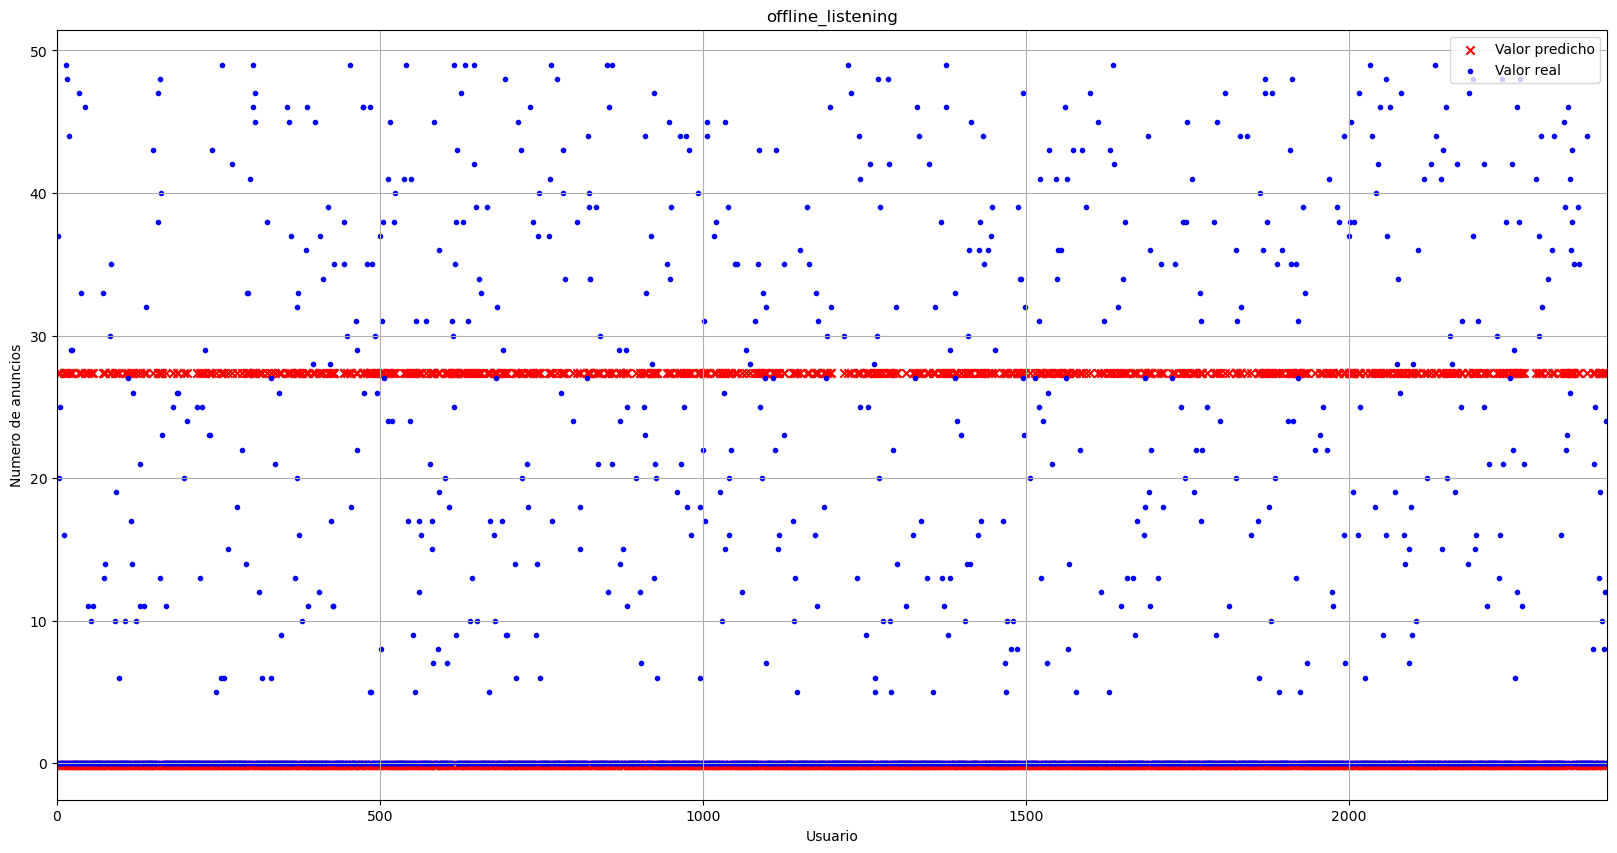

MAE: 3.0198567798421028, MSE: 43.818079019715164, RMSE: 6.6195225673544735


In [40]:
predicho = []

# Se predice con el conjunto de entrenamiento
X_testGen_Norm, mu, sigma= normalizaYAnyade(X_testGen)
for i in range(X_testGen_Norm.shape[0]):
    J = np.dot(theta, X_testGen_Norm.iloc[i])
    predicho.append(J)



plt.figure(figsize=(20,10))
plt.scatter(range(X_testGen_Norm.shape[0]), predicho, marker = "x", c = "red", label="Valor predicho")
plt.scatter(range(X_testGen_Norm.shape[0]), y_testGen, marker = ".", c = "blue", label="Valor real")
plt.xlabel("Usuario")
plt.ylabel("Numero de anuncios")
plt.grid(True)
plt.xlim(0, X_testGen_Norm.shape[0]) # Se reduce el campo de vision para obervar mejor un ejemplo
#plt.xlim(0, 100) 
plt.title("offline_listening")
plt.legend()
plt.show()

MAE3, MSE3, RMSE3 = calculaErrores(X_testGen_Norm, theta, y_testGen)
print(f"MAE: {MAE3}, MSE: {MSE3}, RMSE: {RMSE3}")

#### Implementacion 4. songs_played_per_day

In [41]:
X = pd.DataFrame({"songs_played_per_day":file["songs_played_per_day"]})
y = file["ads_listened_per_week"]

In [42]:
theta = thetaInicial(X.shape[1] + 1)

X_trainGen, y_trainGen, X_testGen, y_testGen = generaTrainTest(X, y, tamTest = 0.3)
#print(X_trainGen)

listado = generaIndicesKFolds(X_trainGen, 10)

for i in range(len(listado)):
    print(f"Fold {i}")
    X_train, y_train, X_val, y_val = generaContenidoKFolds(X_trainGen, y_trainGen, listado[i] ) # Genera una iteracion del cross validation
    
    X_norm, mu, sigma = normalizaYAnyade(X_train)

    alpha =  0.005
    theta, J_history = gradientDescent(X_norm, y_train, theta, alpha, 600)
    #mostrarHistorico(J_history)

    X_val_norm, mu, sigma = normalizaYAnyade(X_val)
    MAE, MSE, RMSE = calculaErrores(X_val_norm, theta, y_val)
    print(f"MAE: {MAE}, MSE: {MSE}, RMSE: {RMSE}")

Fold 0
MAE: 10.036062975274488, MSE: 173.75465356097425, RMSE: 13.181602844911321
Fold 1
MAE: 10.46063067007492, MSE: 191.21552831674396, RMSE: 13.828070303435108
Fold 2
MAE: 10.883907550969672, MSE: 212.8490791063182, RMSE: 14.589348138498792
Fold 3
MAE: 10.475158598987973, MSE: 187.11161892376975, RMSE: 13.678874914398836
Fold 4
MAE: 9.777597487582673, MSE: 155.16177265426313, RMSE: 12.456394849805585
Fold 5
MAE: 10.903689263816995, MSE: 208.8810817814099, RMSE: 14.45271883700122
Fold 6
MAE: 10.03681031630177, MSE: 170.83222872946575, RMSE: 13.07028036154794
Fold 7
MAE: 10.462659683084372, MSE: 186.0472883971458, RMSE: 13.639915263561786
Fold 8
MAE: 10.12632569030159, MSE: 172.9482798154617, RMSE: 13.150980184589349
Fold 9
MAE: 10.149560669711784, MSE: 178.2220028851634, RMSE: 13.34998138145381


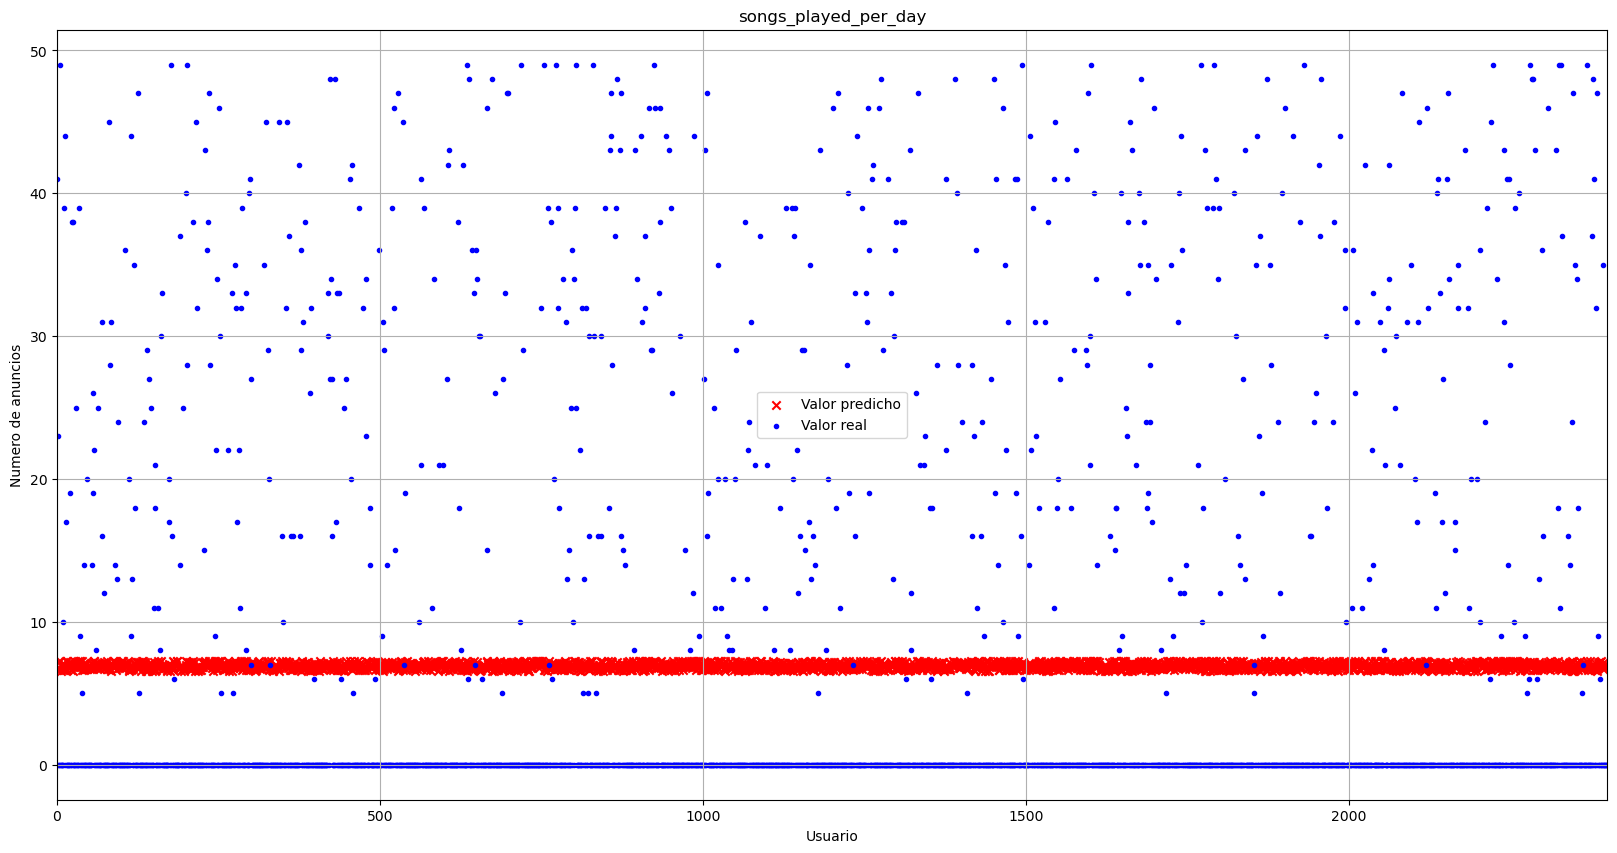

MAE: 10.48214621071227, MSE: 189.47560288856724, RMSE: 13.765013726421316


In [43]:
predicho = []

# Se predice con el conjunto de entrenamiento
X_testGen_Norm, mu, sigma= normalizaYAnyade(X_testGen)
for i in range(X_testGen_Norm.shape[0]):
    J = np.dot(theta, X_testGen_Norm.iloc[i])
    predicho.append(J)



plt.figure(figsize=(20,10))
plt.scatter(range(X_testGen_Norm.shape[0]), predicho, marker = "x", c = "red", label="Valor predicho")
plt.scatter(range(X_testGen_Norm.shape[0]), y_testGen, marker = ".", c = "blue", label="Valor real")
plt.xlabel("Usuario")
plt.ylabel("Numero de anuncios")
plt.grid(True)
plt.xlim(0, X_testGen_Norm.shape[0]) # Se reduce el campo de vision para obervar mejor un ejemplo
#plt.xlim(0, 100)
plt.title("songs_played_per_day")
plt.legend()
plt.show()

MAE4, MSE4, RMSE4 = calculaErrores(X_testGen_Norm, theta, y_testGen)
print(f"MAE: {MAE4}, MSE: {MSE4}, RMSE: {RMSE4}")

### Apartado b
Se procede a comparar los distintos errores de cada implementación. Se comparan los MSE porque son más sensibles a errores extremos, y en nuestro caso no se dan errores pequeños.

In [44]:
print(f"Error implementación 1: {MSE1}")
print(f"Error implementación 2: {MSE2}")
print(f"Error implementación 3: {MSE3}")
print(f"Error implementación 4: {MSE4}")

listaError = [MSE1, MSE2, MSE3, MSE4]
menor = np.min(listaError)
              
print(f"El menor error es {menor}, de la implementacion {listaError.index(menor) + 1}.")

Error implementación 1: 196.61586604188022
Error implementación 2: 187.0839178740751
Error implementación 3: 43.818079019715164
Error implementación 4: 189.47560288856724
El menor error es 43.818079019715164, de la implementacion 3.


### Apartado c

La discusión se toma en la documentación.

## Apartado 2
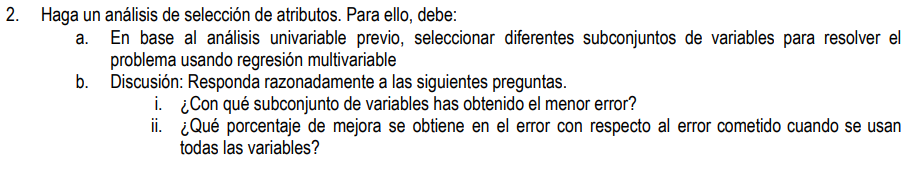

Tal como indica el enunciado, hay que formar subconjuntos de variables para resolver el problema de forma multivariable. Se va a volver a predecir la columna "ads_listened_per_week". Teniendo en cuenta el apartado 1 y el punto ii del apartado 2, se formarán 3 grupos. El primero estará formado por "listening_time" y "age", el segundo lo estará por "offline_listening" y "songs_played_per_day" y el tercero por todas las columnas del dataset (excluyendo la clase). De esta forma se compara un subconjunto que no incluye una columna que hemos visto que es relevante (offline_listening), otro que si la incluye y otro que incluye todas las columnas para ver si es posible mejorar a esa columna.

### Apartado a
Se realiza un modelo de regresion lineal para cada subconjunto.

#### Implementación 1. listening_time y age

In [91]:
X = pd.DataFrame({"listening_time":file["listening_time"],
                 "age":file["age"]})
y = file["ads_listened_per_week"]

In [92]:
theta = thetaInicial(X.shape[1] + 1)

X_trainGen, y_trainGen, X_testGen, y_testGen = generaTrainTest(X, y, tamTest = 0.3)
#print(X_trainGen)

listado = generaIndicesKFolds(X_trainGen, 10)

for i in range(len(listado)):
    print(f"Fold {i}")
    X_train, y_train, X_val, y_val = generaContenidoKFolds(X_trainGen, y_trainGen, listado[i] ) # Genera una iteracion del cross validation
    
    X_norm, mu, sigma = normalizaYAnyade(X_train)

    alpha =  0.005
    theta, J_history = gradientDescent(X_norm, y_train, theta, alpha, 600)
    #mostrarHistorico(J_history)

    X_val_norm, mu, sigma = normalizaYAnyade(X_val)
    MAE, MSE, RMSE = calculaErrores(X_val_norm, theta, y_val)
    print(f"MAE: {MAE}, MSE: {MSE}, RMSE: {RMSE}")

Fold 0
MAE: 9.833936753678119, MSE: 167.97321264152697, RMSE: 12.960448010833845
Fold 1
MAE: 10.542901969767755, MSE: 196.36086918997927, RMSE: 14.01288225847842
Fold 2
MAE: 10.602098185245953, MSE: 198.65001471379242, RMSE: 14.094325621106972
Fold 3
MAE: 10.608434964247042, MSE: 195.63964120733348, RMSE: 13.987124122110789
Fold 4
MAE: 9.886652145901943, MSE: 159.2372960180519, RMSE: 12.618926103993632
Fold 5
MAE: 10.75486749053418, MSE: 205.8437302664093, RMSE: 14.3472551474632
Fold 6
MAE: 10.072585736605435, MSE: 171.26687255765168, RMSE: 13.086896979714163
Fold 7
MAE: 10.354008938765928, MSE: 184.96118065307886, RMSE: 13.600043406293924
Fold 8
MAE: 10.392242793072434, MSE: 186.4948368460523, RMSE: 13.65631124594238
Fold 9
MAE: 9.702387286583477, MSE: 156.4951322748884, RMSE: 12.509801448260015


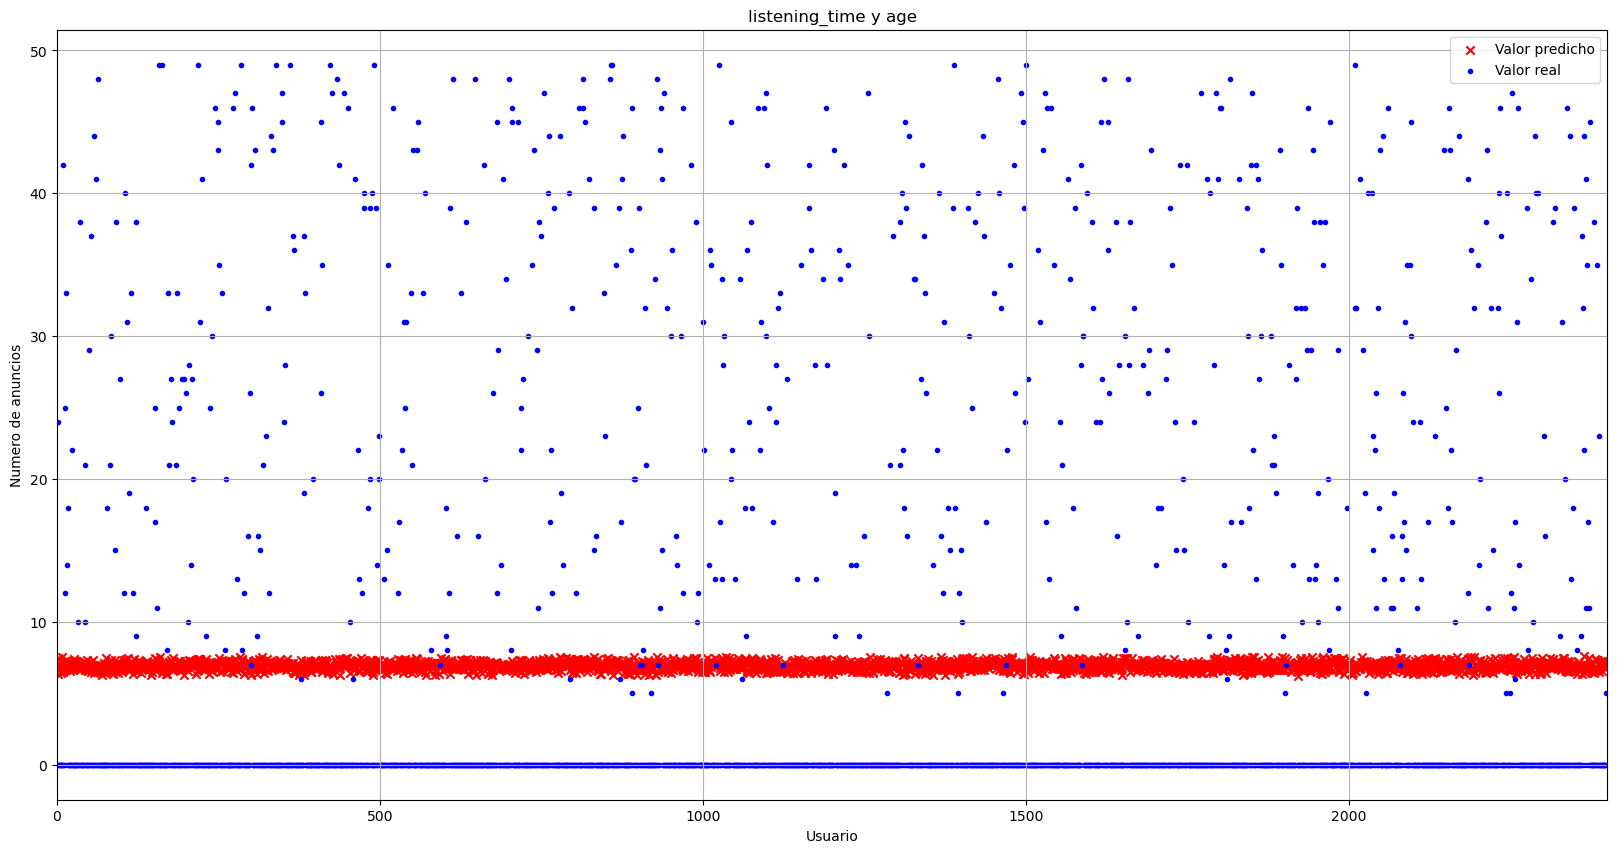

MAE: 10.56457539319231, MSE: 193.26439543370702, RMSE: 13.90195653257868


In [93]:
predicho = []

# Se predice con el conjunto de entrenamiento
X_testGen_Norm, mu, sigma= normalizaYAnyade(X_testGen)
for i in range(X_testGen_Norm.shape[0]):
    J = np.dot(theta, X_testGen_Norm.iloc[i])
    predicho.append(J)



plt.figure(figsize=(20,10))
plt.scatter(range(X_testGen_Norm.shape[0]), predicho, marker = "x", c = "red", label="Valor predicho")
plt.scatter(range(X_testGen_Norm.shape[0]), y_testGen, marker = ".", c = "blue", label="Valor real")
plt.xlabel("Usuario")
plt.ylabel("Numero de anuncios")
plt.grid(True)
plt.xlim(0, X_testGen_Norm.shape[0]) # Se reduce el campo de vision para obervar mejor un ejemplo
#plt.xlim(0, 100) 
plt.title("listening_time y age")
plt.legend()
plt.show()

MAE1, MSE1, RMSE1 = calculaErrores(X_testGen_Norm, theta, y_testGen)
print(f"MAE: {MAE1}, MSE: {MSE1}, RMSE: {RMSE1}")

#### Implementación 2. offline_listening y songs_played_per_day

In [94]:
X = pd.DataFrame({"offline_listening":file["offline_listening"],
                 "songs_played_per_day":file["songs_played_per_day"]})
y = file["ads_listened_per_week"]

In [95]:
theta = thetaInicial(X.shape[1] + 1)

X_trainGen, y_trainGen, X_testGen, y_testGen = generaTrainTest(X, y, tamTest = 0.3)
#print(X_trainGen)

listado = generaIndicesKFolds(X_trainGen, 10)

for i in range(len(listado)):
    print(f"Fold {i}")
    X_train, y_train, X_val, y_val = generaContenidoKFolds(X_trainGen, y_trainGen, listado[i] ) # Genera una iteracion del cross validation
    
    X_norm, mu, sigma = normalizaYAnyade(X_train)

    alpha =  0.005
    theta, J_history = gradientDescent(X_norm, y_train, theta, alpha, 600)
    #mostrarHistorico(J_history)

    X_val_norm, mu, sigma = normalizaYAnyade(X_val)
    MAE, MSE, RMSE = calculaErrores(X_val_norm, theta, y_val)
    print(f"MAE: {MAE}, MSE: {MSE}, RMSE: {RMSE}")

Fold 0
MAE: 2.695738858166363, MSE: 38.2797331544553, RMSE: 6.187061754537067
Fold 1
MAE: 3.379103590518614, MSE: 48.693342425984056, RMSE: 6.978061509186062
Fold 2
MAE: 3.711595818716696, MSE: 51.82650421045241, RMSE: 7.199062731387497
Fold 3
MAE: 2.7948616885692297, MSE: 38.70381750215561, RMSE: 6.221239225600926
Fold 4
MAE: 2.6820785321478313, MSE: 34.749021941657155, RMSE: 5.894830102866168
Fold 5
MAE: 3.2310980634424746, MSE: 47.7852208999541, RMSE: 6.912685505644973
Fold 6
MAE: 2.8546793838673743, MSE: 42.44413743679223, RMSE: 6.514916533371109
Fold 7
MAE: 2.870579641179355, MSE: 41.235986208240945, RMSE: 6.42152522444948
Fold 8
MAE: 2.9300925579567036, MSE: 42.612364096834085, RMSE: 6.527814649393324
Fold 9
MAE: 3.180484353691313, MSE: 44.510315918713964, RMSE: 6.67160519805496


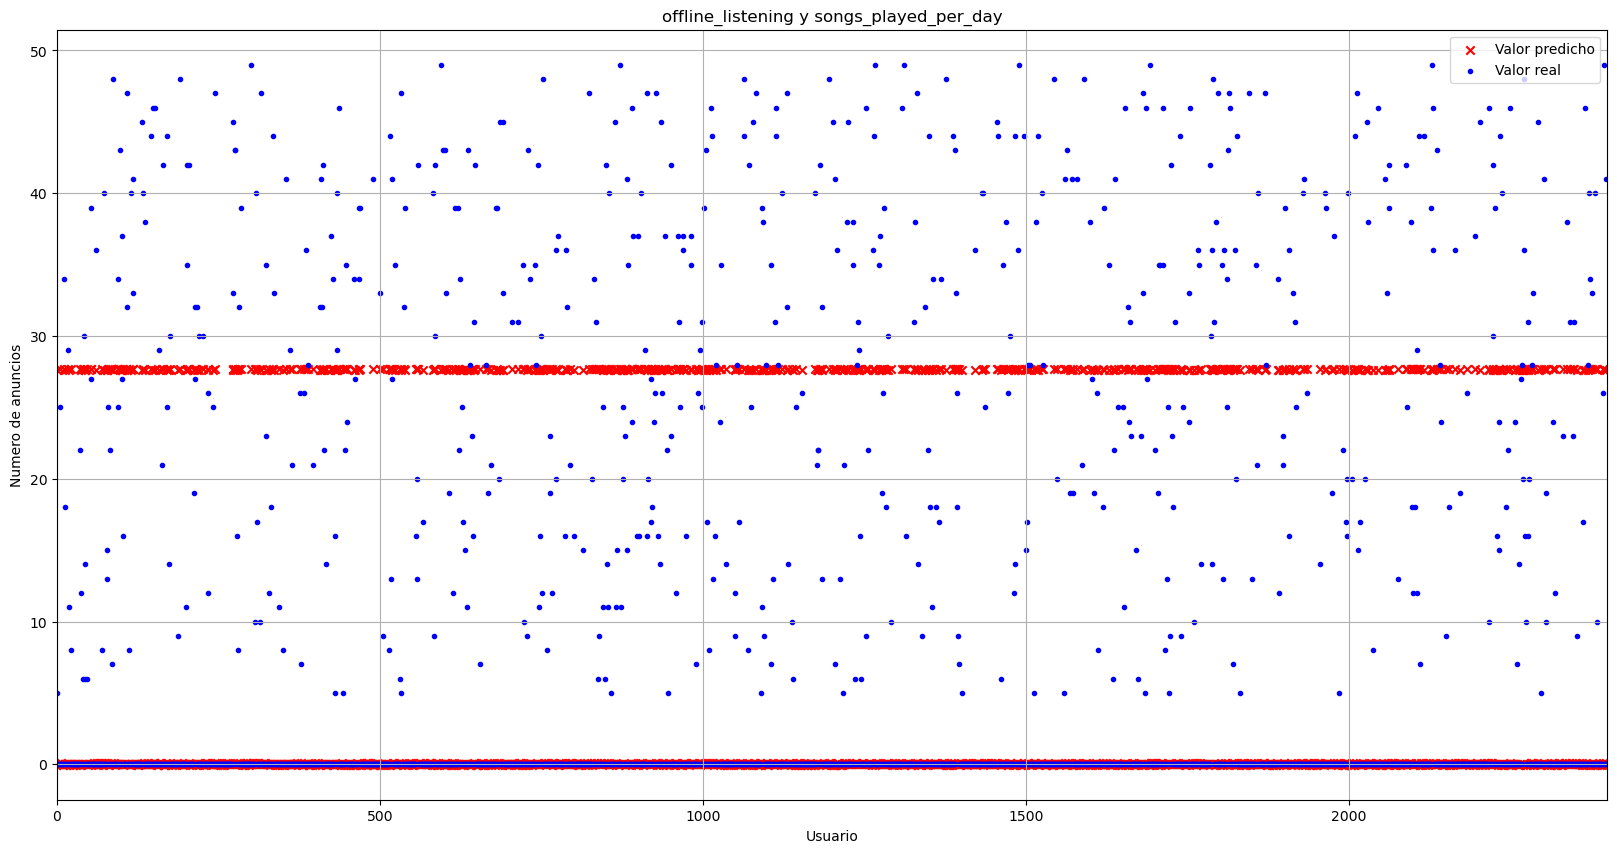

MAE: 2.879547363099981, MSE: 42.405711651521315, RMSE: 6.511966803625562


In [96]:
predicho = []

# Se predice con el conjunto de entrenamiento
X_testGen_Norm, mu, sigma= normalizaYAnyade(X_testGen)
for i in range(X_testGen_Norm.shape[0]):
    J = np.dot(theta, X_testGen_Norm.iloc[i])
    predicho.append(J)



plt.figure(figsize=(20,10))
plt.scatter(range(X_testGen_Norm.shape[0]), predicho, marker = "x", c = "red", label="Valor predicho")
plt.scatter(range(X_testGen_Norm.shape[0]), y_testGen, marker = ".", c = "blue", label="Valor real")
plt.xlabel("Usuario")
plt.ylabel("Numero de anuncios")
plt.grid(True)
plt.xlim(0, X_testGen_Norm.shape[0]) # Se reduce el campo de vision para obervar mejor un ejemplo
#plt.xlim(0, 100) 
plt.title("offline_listening y songs_played_per_day")
plt.legend()
plt.show()

MAE2, MSE2, RMSE2 = calculaErrores(X_testGen_Norm, theta, y_testGen)
print(f"MAE: {MAE2}, MSE: {MSE2}, RMSE: {RMSE2}")

#### Implementación 3. Todas las columnas

In [97]:
X = pd.DataFrame({    
    "Female":gender["Female"]
    ,"Male":gender["Male"]
    ,"Other":gender["Other"]
    
    ,"age":file["age"]
    
    ,"AU":country["AU"]
    ,"CA":country["CA"]
    ,"DE":country["DE"]
    ,"FR":country["FR"]
    ,"IN":country["IN"]
    ,"PK":country["PK"]
    ,"UK":country["UK"]
    ,"US":country["US"]
    
    ,"Family":subscription_type["Family"]
    ,"Free":subscription_type["Free"]
    ,"Premium":subscription_type["Premium"]
    ,"Student":subscription_type["Student"]
    
    ,"listening_time":file["listening_time"]
    ,"songs_played_per_day":file["songs_played_per_day"]
    ,"skip_rate":file["skip_rate"]
    
    ,"Desktop":device_type["Desktop"]
    ,"Mobile":device_type["Mobile"]
    ,"Web":device_type["Web"]
    
    ,"offline_listening":file["offline_listening"]
    ,"is_churned":file["is_churned"]               
                 })
y = file["ads_listened_per_week"]

In [98]:
theta = thetaInicial(X.shape[1] + 1)

X_trainGen, y_trainGen, X_testGen, y_testGen = generaTrainTest(X, y, tamTest = 0.3)
#print(X_trainGen)

listado = generaIndicesKFolds(X_trainGen, 10)

for i in range(len(listado)):
    print(f"Fold {i}")
    X_train, y_train, X_val, y_val = generaContenidoKFolds(X_trainGen, y_trainGen, listado[i] ) # Genera una iteracion del cross validation
    
    X_norm, mu, sigma = normalizaYAnyade(X_train)

    alpha =  0.005
    theta, J_history = gradientDescent(X_norm, y_train, theta, alpha, 600)
    #mostrarHistorico(J_history)

    X_val_norm, mu, sigma = normalizaYAnyade(X_val)
    MAE, MSE, RMSE = calculaErrores(X_val_norm, theta, y_val)
    print(f"MAE: {MAE}, MSE: {MSE}, RMSE: {RMSE}")

Fold 0
MAE: 2.6097288599263266, MSE: 34.48941106144525, RMSE: 5.872768602749921
Fold 1
MAE: 3.2134691813804475, MSE: 44.69251504842785, RMSE: 6.6852460723916405
Fold 2
MAE: 3.3461420431124966, MSE: 46.314396688969246, RMSE: 6.805468146201938
Fold 3
MAE: 3.008077797883901, MSE: 39.51854621080105, RMSE: 6.286377829147804
Fold 4
MAE: 2.857262086682341, MSE: 36.490935802115466, RMSE: 6.040772781864541
Fold 5
MAE: 3.053059416951089, MSE: 42.55037037134077, RMSE: 6.523064492348728
Fold 6
MAE: 2.786613812323255, MSE: 37.58049574007201, RMSE: 6.1302932833651615
Fold 7
MAE: 3.480728106983985, MSE: 45.32194260157405, RMSE: 6.732157351219151
Fold 8
MAE: 3.1866316785908935, MSE: 44.56354388463202, RMSE: 6.675593148524857
Fold 9
MAE: 3.1314511489130026, MSE: 44.16059612540888, RMSE: 6.645343943349274


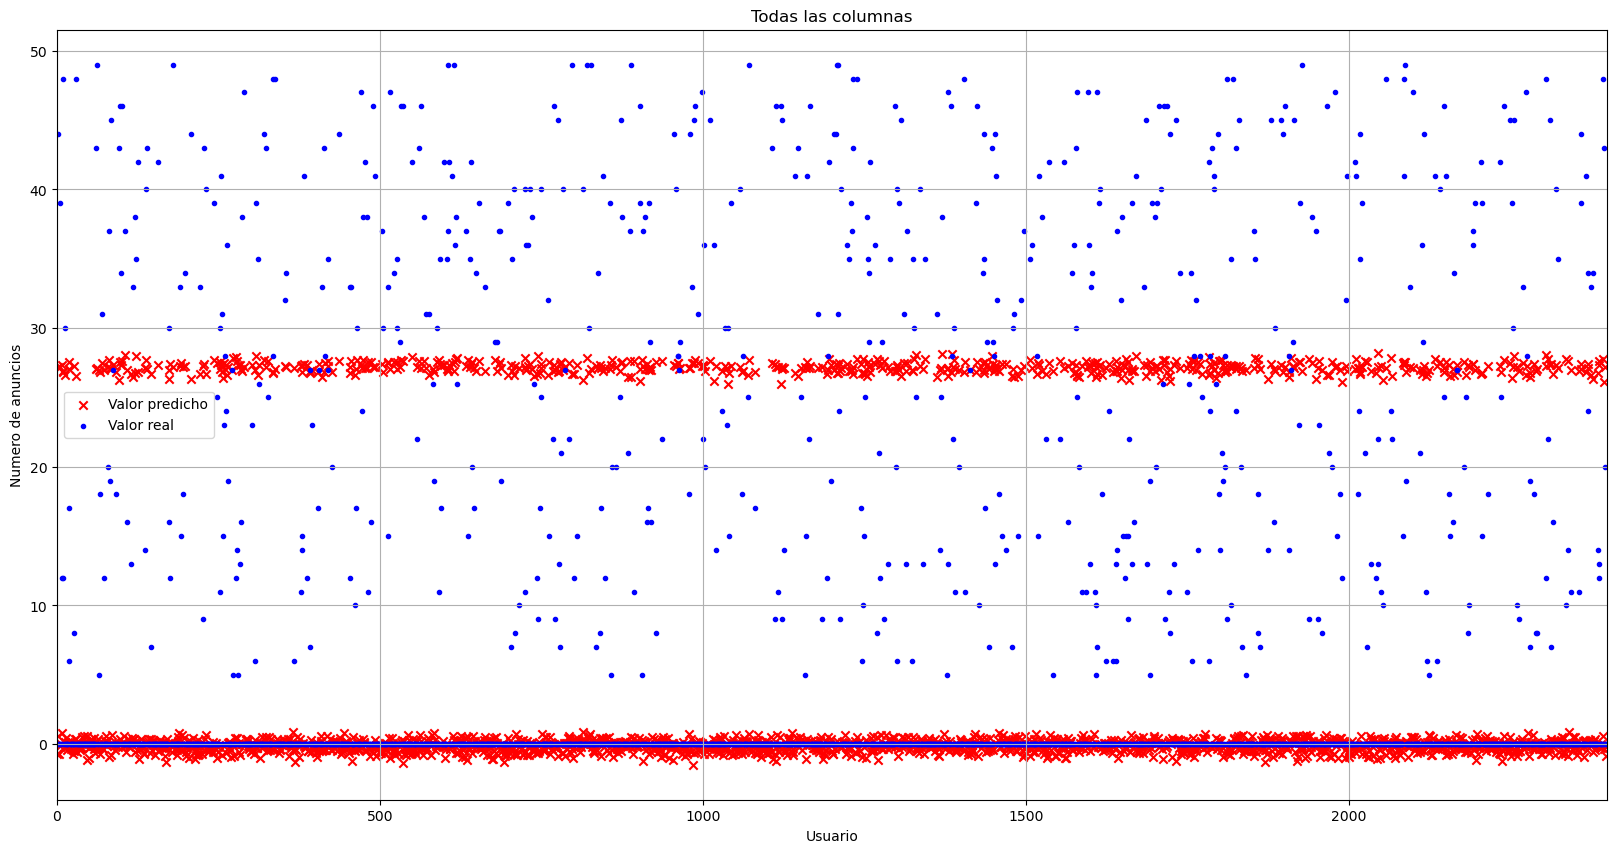

MAE: 3.271954770053274, MSE: 45.52234746106082, RMSE: 6.747025082290773


In [99]:
predicho = []

# Se predice con el conjunto de entrenamiento
X_testGen_Norm, mu, sigma= normalizaYAnyade(X_testGen)
for i in range(X_testGen_Norm.shape[0]):
    J = np.dot(theta, X_testGen_Norm.iloc[i])
    predicho.append(J)



plt.figure(figsize=(20,10))
plt.scatter(range(X_testGen_Norm.shape[0]), predicho, marker = "x", c = "red", label="Valor predicho")
plt.scatter(range(X_testGen_Norm.shape[0]), y_testGen, marker = ".", c = "blue", label="Valor real")
plt.xlabel("Usuario")
plt.ylabel("Numero de anuncios")
plt.grid(True)
plt.xlim(0, X_testGen_Norm.shape[0]) # Se reduce el campo de vision para obervar mejor un ejemplo
#plt.xlim(0, 100) 
plt.title("Todas las columnas")
plt.legend()
plt.show()

MAE3, MSE3, RMSE3 = calculaErrores(X_testGen_Norm, theta, y_testGen)
print(f"MAE: {MAE3}, MSE: {MSE3}, RMSE: {RMSE3}")

### Apartado b

La discusión se toma en la documentación. Para la discusión son necesarios algunos calculos

In [100]:
print(f"Error implementación 1: {MSE1}")
print(f"Error implementación 2: {MSE2}")
print(f"Error implementación 3: {MSE3}")

listaError = [MSE1, MSE2, MSE3]
menor = np.min(listaError)
              
print(f"El menor error es {menor}, de la implementacion {listaError.index(menor) + 1}.")

Error implementación 1: 193.26439543370702
Error implementación 2: 42.405711651521315
Error implementación 3: 45.52234746106082
El menor error es 42.405711651521315, de la implementacion 2.


In [109]:
print(f"Porcentaje de mejora de la segunda implementación con respecto a la tercera: { ((MSE3 - MSE2)/MSE2)*100 }%") # Si no hubiera mejora en MSE2, entonces saldría negativo

Porcentaje de mejora de la segunda implementación con respecto a la tercera: 7.349566103621073%


## Apartado 3
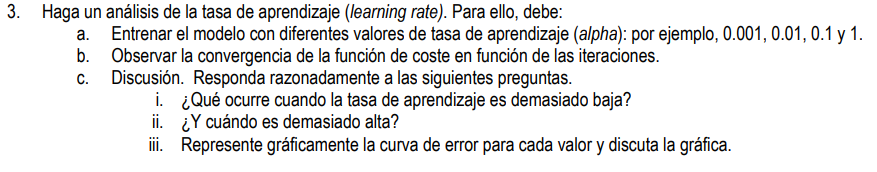

Se debe hacer una implementación en la cual el modelo se entrene de maneras distintas. Como no se especifica que tipo de implementación será, entonces usaremos la tercera implementación de la regresión lineal.

### Apartado a y b
Se crearán diferentes modelos para los diferentes alphas y se irá imprimiendo una función que muestre la convergencia del coste (para un buen alpha, en caso de que el alpha no se adecue a los datos la función no convergerá).

In [119]:
X = pd.DataFrame({
    "Family":subscription_type["Family"]
    ,"Free":subscription_type["Free"]
    ,"Premium":subscription_type["Premium"]
    ,"Student":subscription_type["Student"]
    
    ,"listening_time":file["listening_time"]
    ,"songs_played_per_day":file["songs_played_per_day"]
    ,"skip_rate":file["skip_rate"]
    
    ,"Desktop":device_type["Desktop"]
    ,"Mobile":device_type["Mobile"]
    ,"Web":device_type["Web"] 
    })
y = file["ads_listened_per_week"]

#### Modelo 1. alpha = 0.001

Fold 0


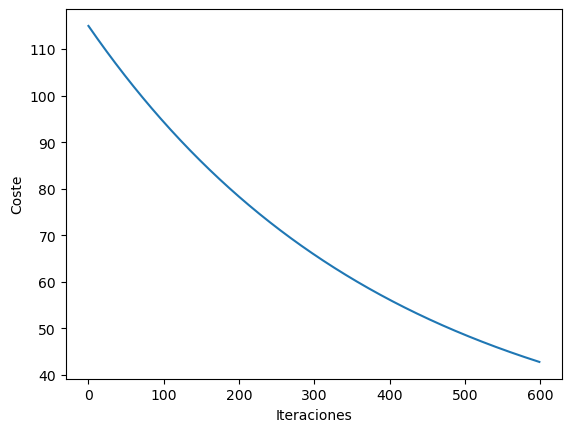

MAE: 3.3578211474545956, MSE: 64.82931315906144, RMSE: 8.051665241368486
Fold 1


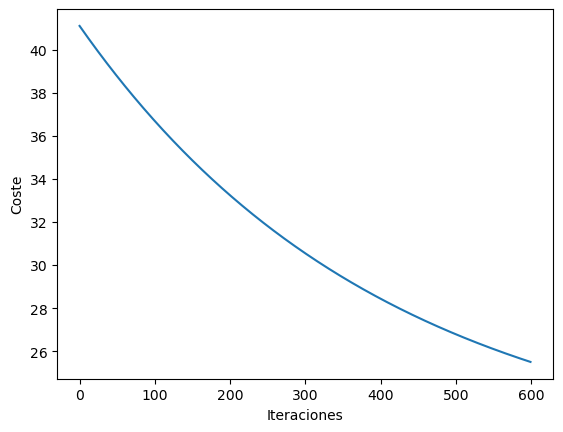

MAE: 3.9810307848297035, MSE: 58.68731664547729, RMSE: 7.6607647559155145
Fold 2


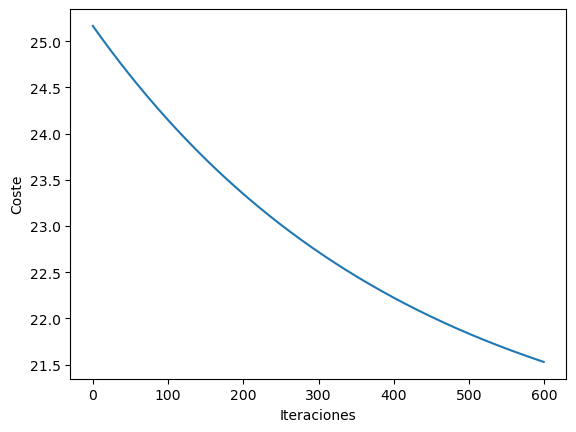

MAE: 3.982818983647068, MSE: 55.86848312365301, RMSE: 7.47452226725247
Fold 3


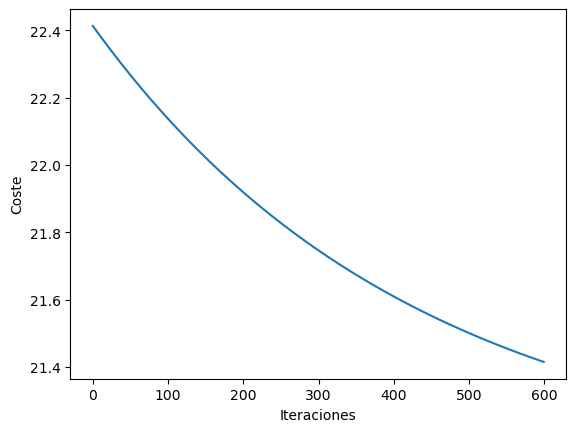

MAE: 2.8257339033530067, MSE: 38.586735824615296, RMSE: 6.211822262799806
Fold 4


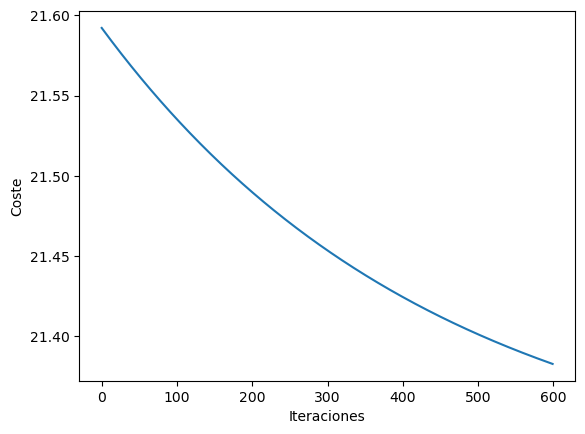

MAE: 2.6322923772888682, MSE: 34.38876613354869, RMSE: 5.864193562080697
Fold 5


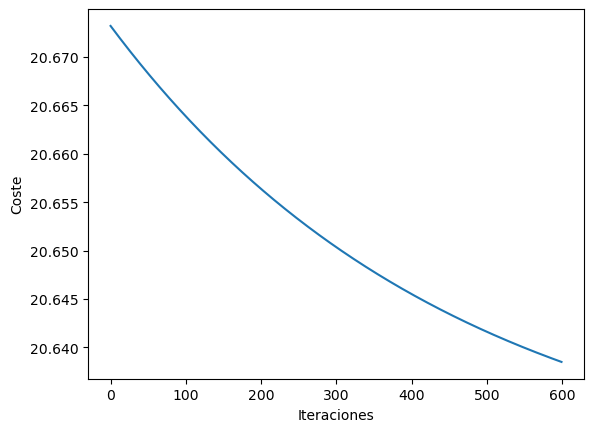

MAE: 3.524815629284667, MSE: 47.941195186278684, RMSE: 6.923958057807592
Fold 6


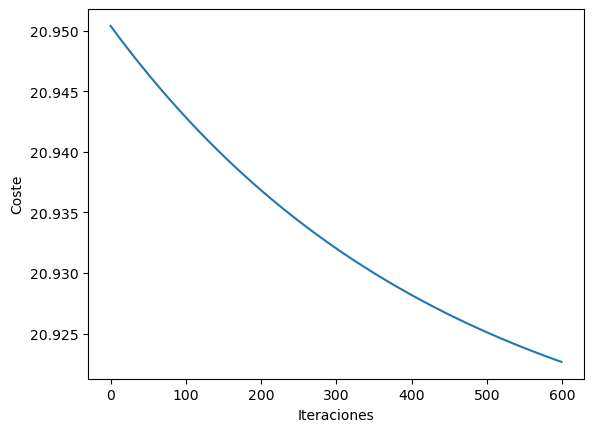

MAE: 2.9419008229369057, MSE: 41.40049345135578, RMSE: 6.434321522224063
Fold 7


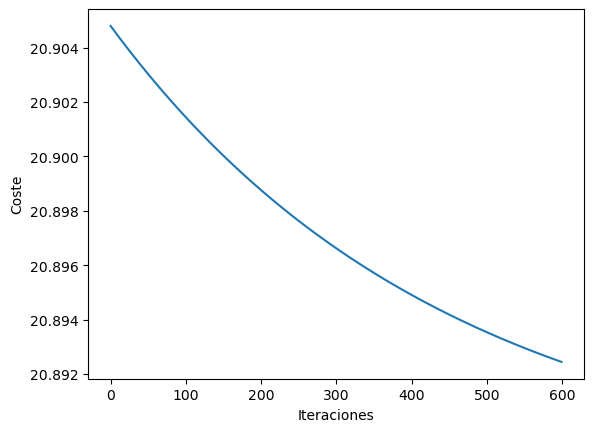

MAE: 2.9395182710741263, MSE: 41.7820257199158, RMSE: 6.46390174120212
Fold 8


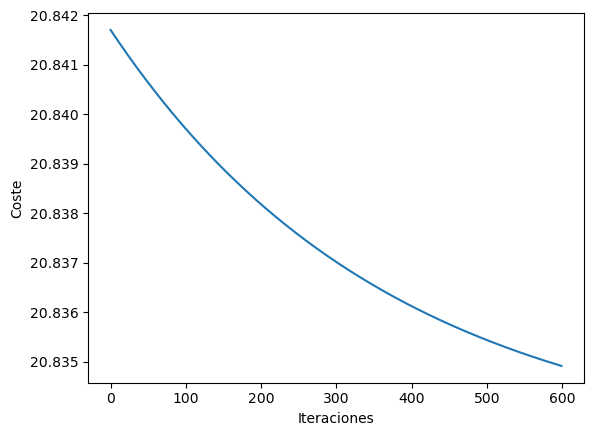

MAE: 2.9532994980034557, MSE: 42.7870618835783, RMSE: 6.541181994378256
Fold 9


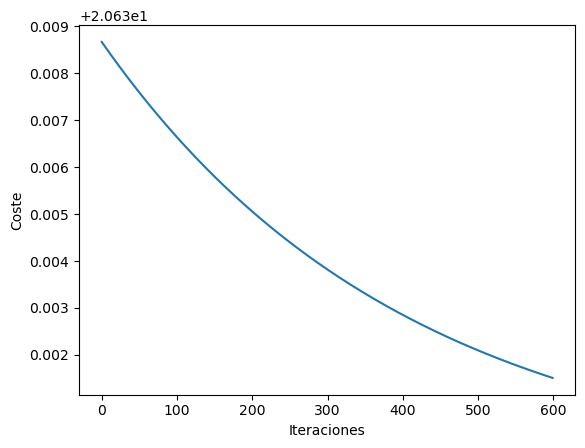

MAE: 3.179388179951713, MSE: 46.14829267140035, RMSE: 6.7932534673306835


In [120]:
theta = thetaInicial(X.shape[1] + 1)

X_trainGen, y_trainGen, X_testGen, y_testGen = generaTrainTest(X, y, tamTest = 0.3)
#print(X_trainGen)

listado = generaIndicesKFolds(X_trainGen, 10)

for i in range(len(listado)):
    print(f"Fold {i}")
    X_train, y_train, X_val, y_val = generaContenidoKFolds(X_trainGen, y_trainGen, listado[i] ) # Genera una iteracion del cross validation
    
    X_norm, mu, sigma = normalizaYAnyade(X_train)

    alpha =  0.001
    theta, J_history = gradientDescent(X_norm, y_train, theta, alpha, 600)
    mostrarHistorico(J_history)

    X_val_norm, mu, sigma = normalizaYAnyade(X_val)
    MAE, MSE, RMSE = calculaErrores(X_val_norm, theta, y_val)
    print(f"MAE: {MAE}, MSE: {MSE}, RMSE: {RMSE}")

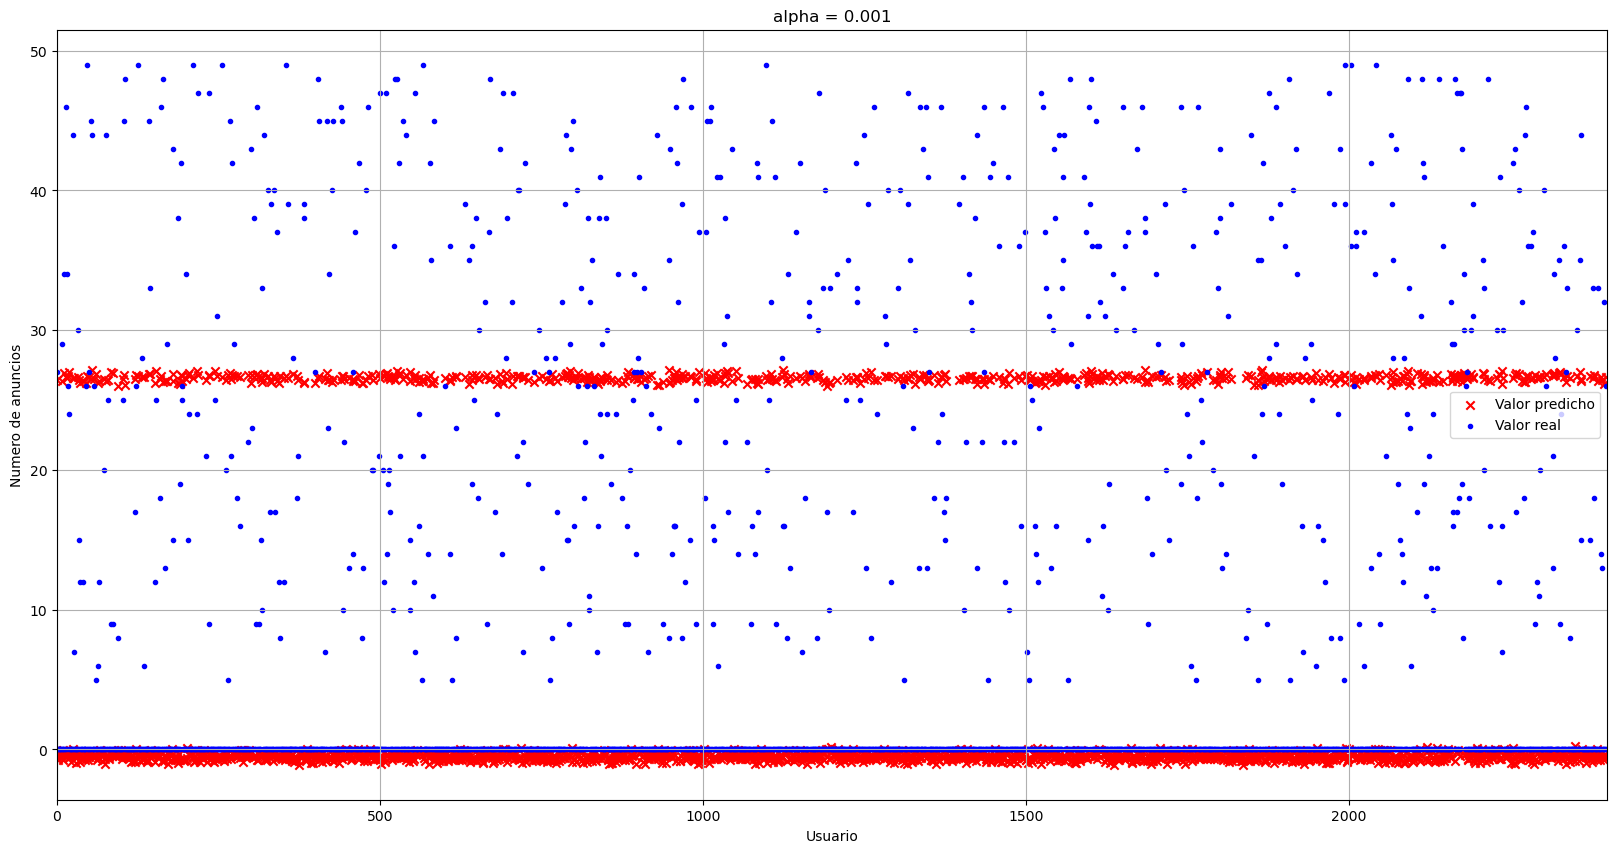

MAE: 3.347681779722898, MSE: 44.55055369824019, RMSE: 6.674620116399149


In [121]:
predicho = []

# Se predice con el conjunto de entrenamiento
X_testGen_Norm, mu, sigma= normalizaYAnyade(X_testGen)
for i in range(X_testGen_Norm.shape[0]):
    J = np.dot(theta, X_testGen_Norm.iloc[i])
    predicho.append(J)



plt.figure(figsize=(20,10))
plt.scatter(range(X_testGen_Norm.shape[0]), predicho, marker = "x", c = "red", label="Valor predicho")
plt.scatter(range(X_testGen_Norm.shape[0]), y_testGen, marker = ".", c = "blue", label="Valor real")
plt.xlabel("Usuario")
plt.ylabel("Numero de anuncios")
plt.grid(True)
plt.xlim(0, X_testGen_Norm.shape[0]) # Se reduce el campo de vision para obervar mejor un ejemplo
#plt.xlim(0, 100) 
plt.title("alpha = 0.001")
plt.legend()
plt.show()

MAE1, MSE1, RMSE1 = calculaErrores(X_testGen_Norm, theta, y_testGen)
print(f"MAE: {MAE1}, MSE: {MSE1}, RMSE: {RMSE1}")

#### Modelo 2. alpha = 0.01

Fold 0


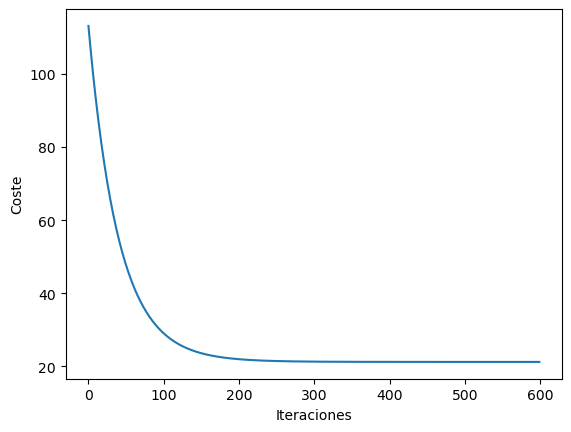

MAE: 2.9281348165211907, MSE: 38.369643434886726, RMSE: 6.194323484843743
Fold 1


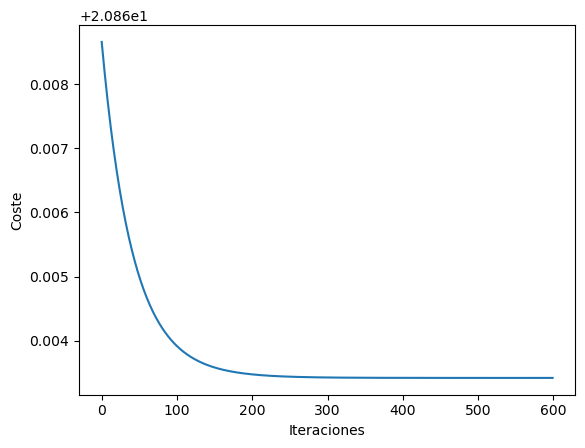

MAE: 3.1843707810556747, MSE: 44.368783311526045, RMSE: 6.660989664571328
Fold 2


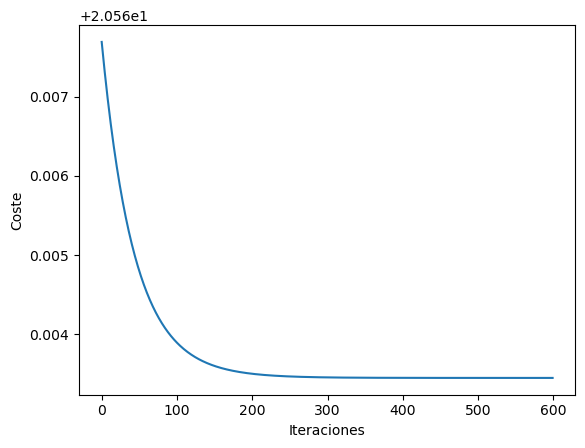

MAE: 3.639732527740092, MSE: 50.2777601763169, RMSE: 7.090681220892454
Fold 3


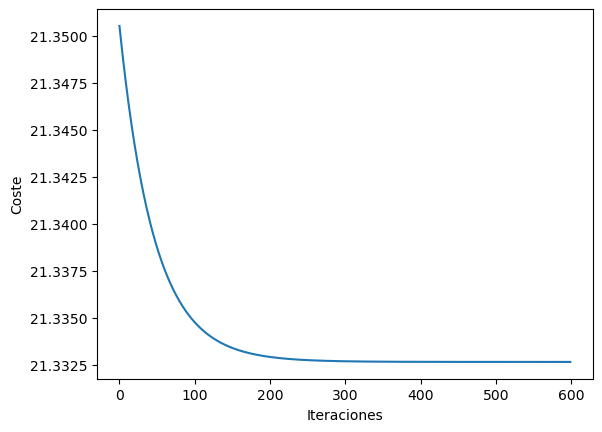

MAE: 2.8734741485206277, MSE: 36.55764497160407, RMSE: 6.046291836456794
Fold 4


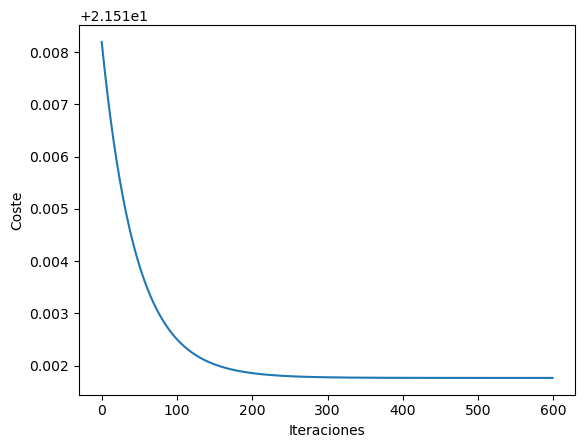

MAE: 2.6240920669246846, MSE: 32.590448925701956, RMSE: 5.708804509326095
Fold 5


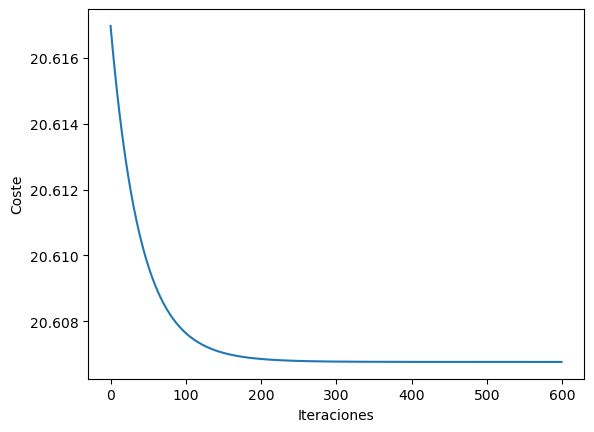

MAE: 3.3875181677899135, MSE: 49.49490298597612, RMSE: 7.035261401396264
Fold 6


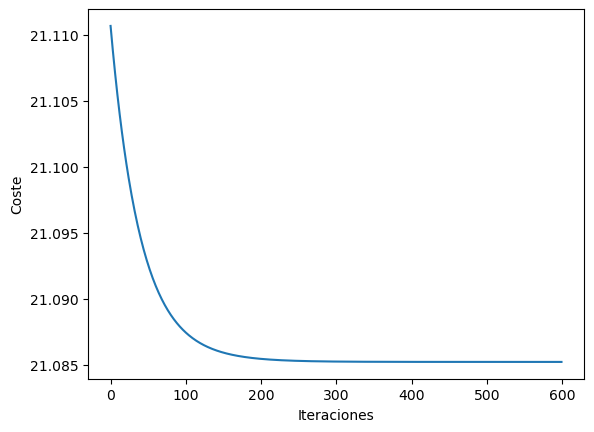

MAE: 2.9355167417719055, MSE: 40.79298205889165, RMSE: 6.386938394793836
Fold 7


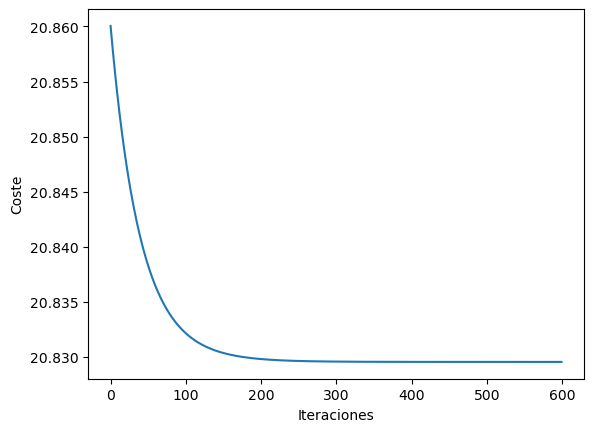

MAE: 3.2097978365630335, MSE: 45.548731659468366, RMSE: 6.7489800458638465
Fold 8


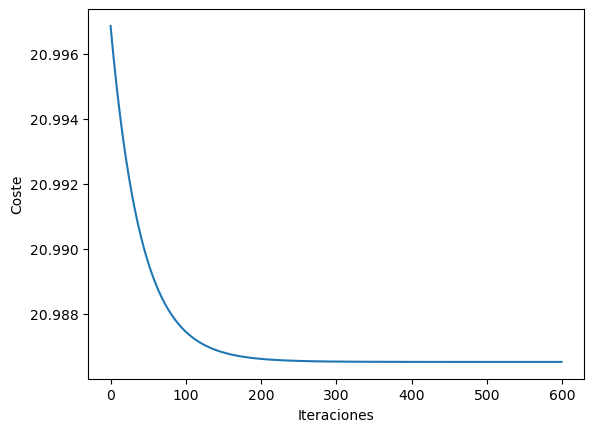

MAE: 2.9729420090888024, MSE: 42.06165708098846, RMSE: 6.485495900930665
Fold 9


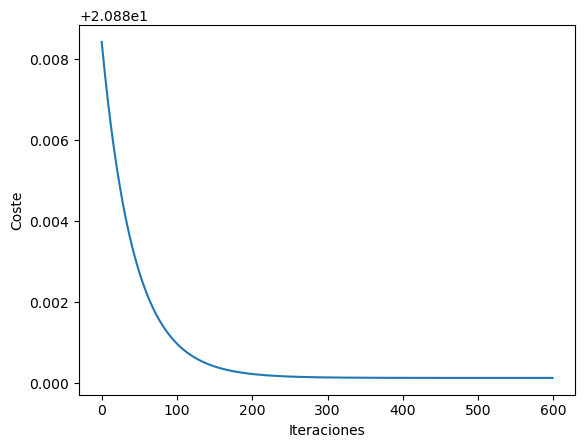

MAE: 3.0923119847156446, MSE: 44.558127440972655, RMSE: 6.675187446130082


In [122]:
theta = thetaInicial(X.shape[1] + 1)

X_trainGen, y_trainGen, X_testGen, y_testGen = generaTrainTest(X, y, tamTest = 0.3)
#print(X_trainGen)

listado = generaIndicesKFolds(X_trainGen, 10)

for i in range(len(listado)):
    print(f"Fold {i}")
    X_train, y_train, X_val, y_val = generaContenidoKFolds(X_trainGen, y_trainGen, listado[i] ) # Genera una iteracion del cross validation
    
    X_norm, mu, sigma = normalizaYAnyade(X_train)

    alpha =  0.01
    theta, J_history = gradientDescent(X_norm, y_train, theta, alpha, 600)
    mostrarHistorico(J_history)

    X_val_norm, mu, sigma = normalizaYAnyade(X_val)
    MAE, MSE, RMSE = calculaErrores(X_val_norm, theta, y_val)
    print(f"MAE: {MAE}, MSE: {MSE}, RMSE: {RMSE}")

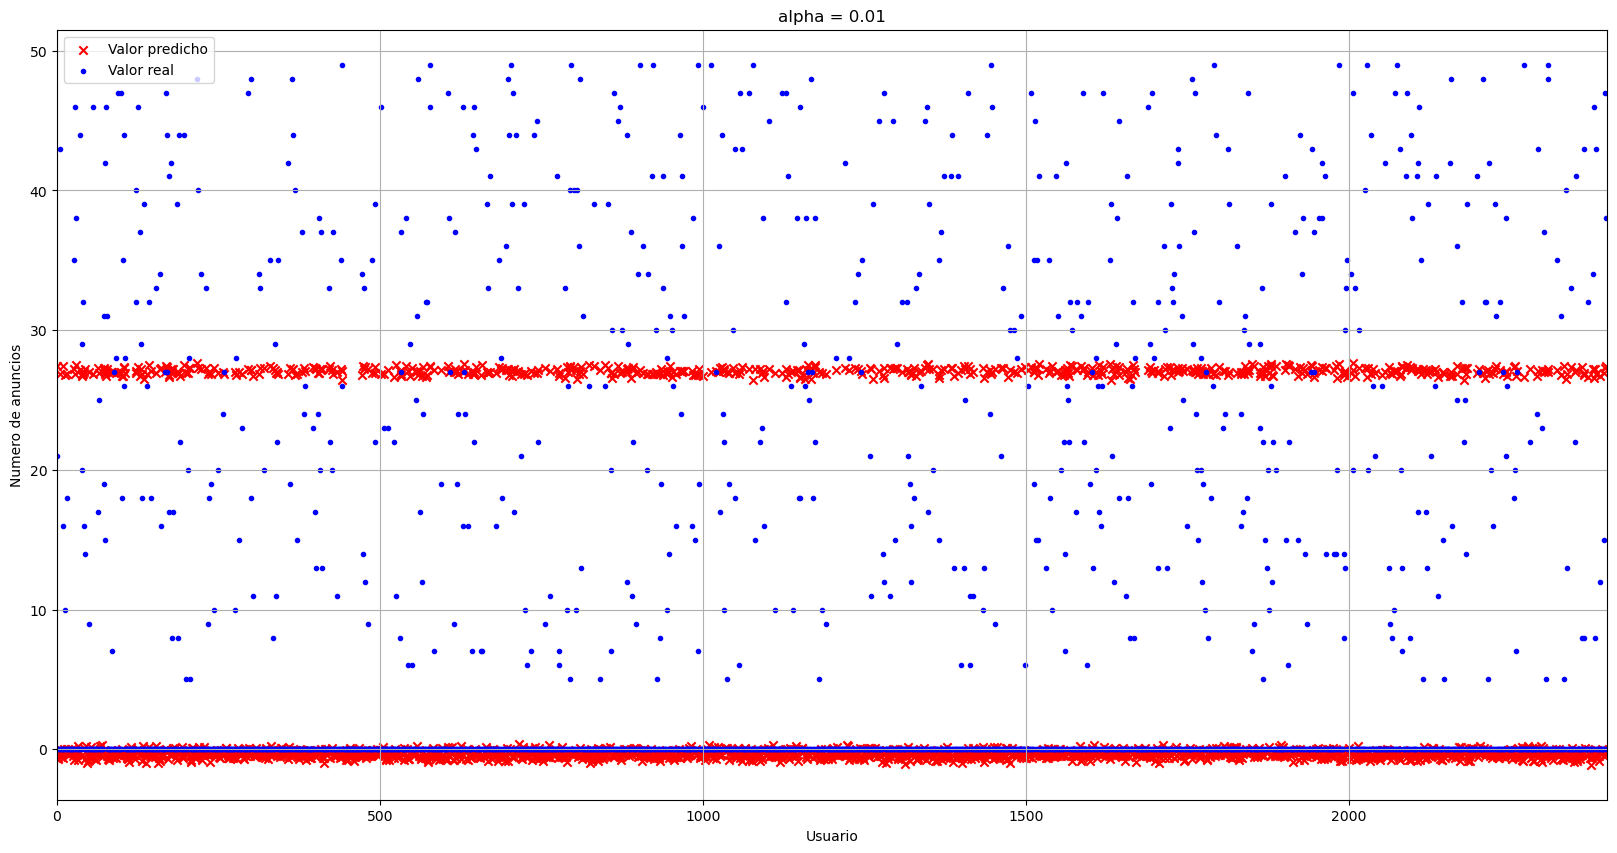

MAE: 3.1791248990455303, MSE: 43.76162197656155, RMSE: 6.615256758173604


In [123]:
predicho = []

# Se predice con el conjunto de entrenamiento
X_testGen_Norm, mu, sigma= normalizaYAnyade(X_testGen)
for i in range(X_testGen_Norm.shape[0]):
    J = np.dot(theta, X_testGen_Norm.iloc[i])
    predicho.append(J)



plt.figure(figsize=(20,10))
plt.scatter(range(X_testGen_Norm.shape[0]), predicho, marker = "x", c = "red", label="Valor predicho")
plt.scatter(range(X_testGen_Norm.shape[0]), y_testGen, marker = ".", c = "blue", label="Valor real")
plt.xlabel("Usuario")
plt.ylabel("Numero de anuncios")
plt.grid(True)
plt.xlim(0, X_testGen_Norm.shape[0]) # Se reduce el campo de vision para obervar mejor un ejemplo
#plt.xlim(0, 100) 
plt.title("alpha = 0.01")
plt.legend()
plt.show()

MAE2, MSE2, RMSE2 = calculaErrores(X_testGen_Norm, theta, y_testGen)
print(f"MAE: {MAE2}, MSE: {MSE2}, RMSE: {RMSE2}")

#### Modelo 3. alpha = 0.1

Fold 0


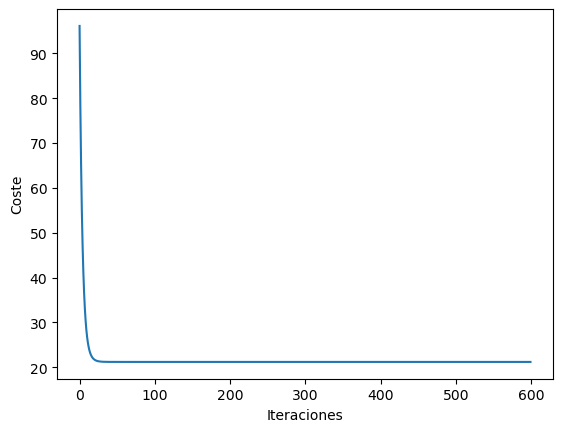

MAE: 2.773791701271559, MSE: 35.880522033639906, RMSE: 5.990035228080041
Fold 1


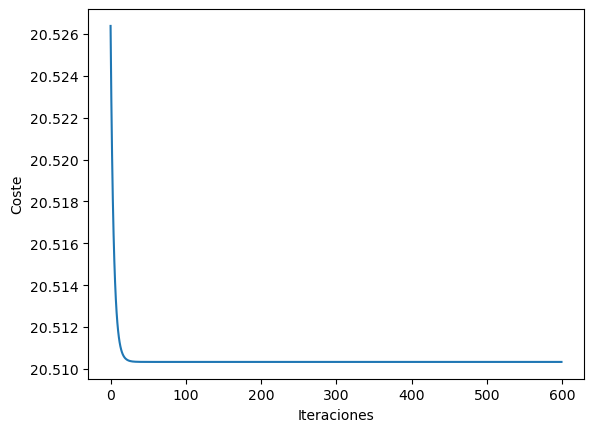

MAE: 3.4163377338234873, MSE: 48.52262696326212, RMSE: 6.965818470449982
Fold 2


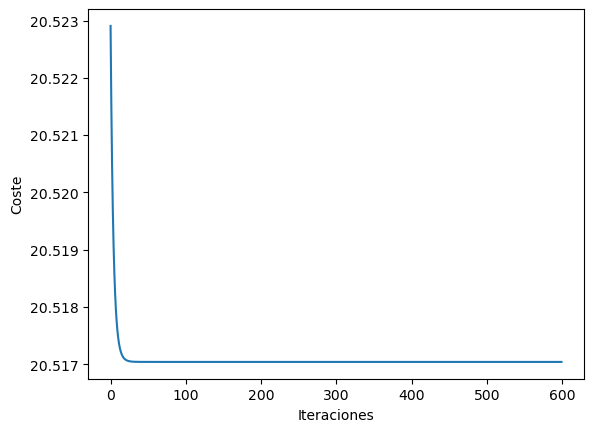

MAE: 3.4062430954429654, MSE: 47.9604890585461, RMSE: 6.925351186658053
Fold 3


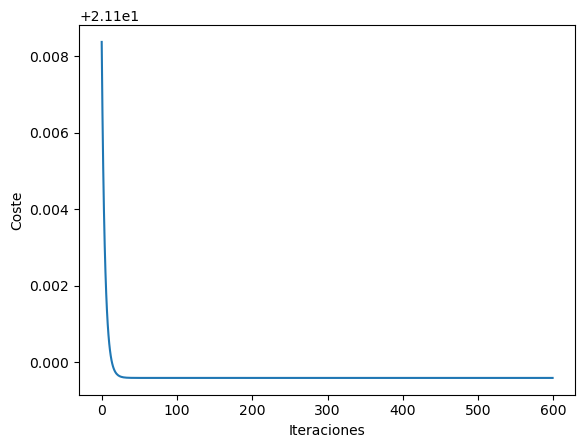

MAE: 2.8666879929518503, MSE: 37.45448635097541, RMSE: 6.120007054814186
Fold 4


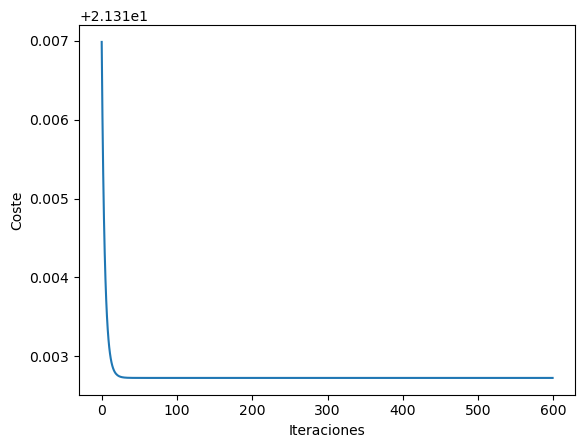

MAE: 2.703905656869707, MSE: 33.44124952456889, RMSE: 5.7828409561883065
Fold 5


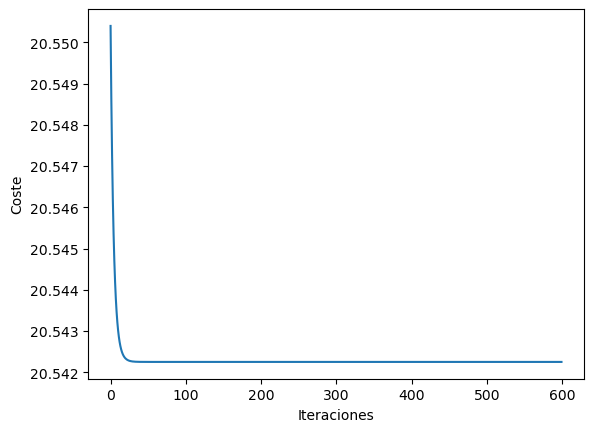

MAE: 3.410841542621283, MSE: 47.897024353573755, RMSE: 6.920767613030635
Fold 6


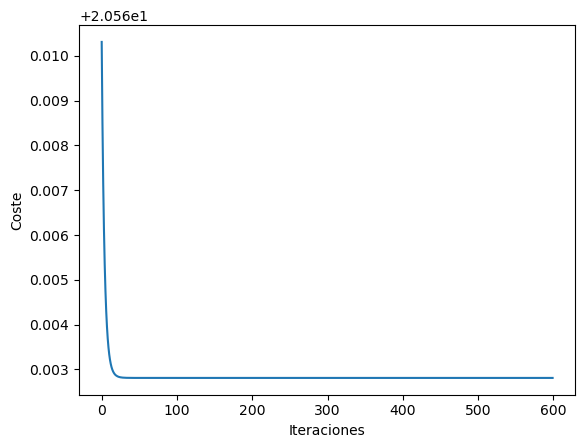

MAE: 3.3379618176936305, MSE: 46.776777960437656, RMSE: 6.839355083663785
Fold 7


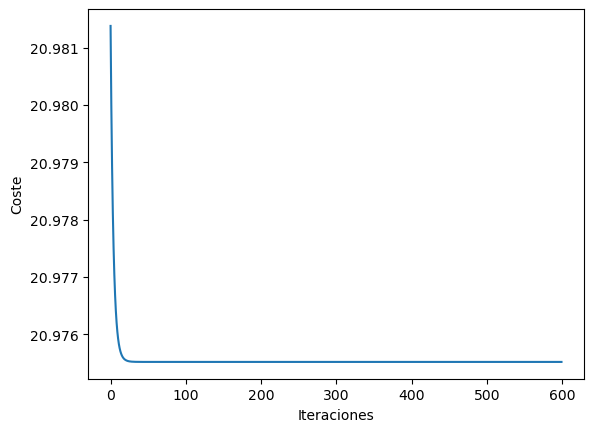

MAE: 2.9531951904270493, MSE: 39.42209600948391, RMSE: 6.2787017773966545
Fold 8


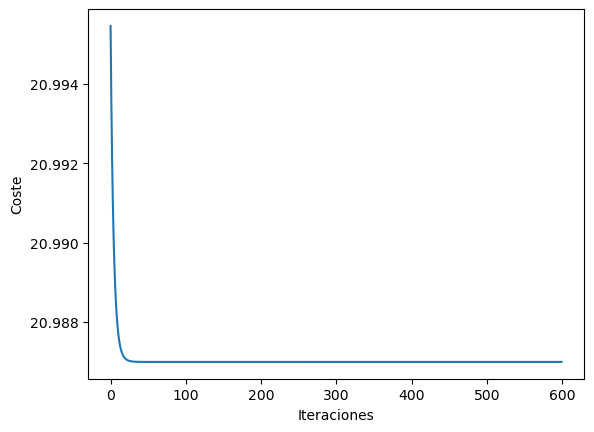

MAE: 2.928381421473316, MSE: 39.606687992579545, RMSE: 6.293384462479592
Fold 9


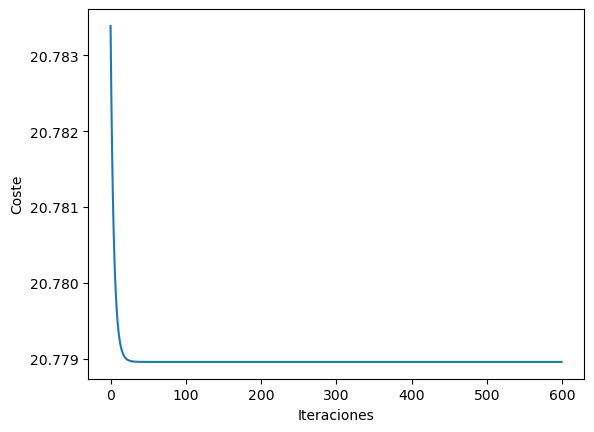

MAE: 3.0761783805800538, MSE: 43.62089316997911, RMSE: 6.604611507876834


In [124]:
theta = thetaInicial(X.shape[1] + 1)

X_trainGen, y_trainGen, X_testGen, y_testGen = generaTrainTest(X, y, tamTest = 0.3)
#print(X_trainGen)

listado = generaIndicesKFolds(X_trainGen, 10)

for i in range(len(listado)):
    print(f"Fold {i}")
    X_train, y_train, X_val, y_val = generaContenidoKFolds(X_trainGen, y_trainGen, listado[i] ) # Genera una iteracion del cross validation
    
    X_norm, mu, sigma = normalizaYAnyade(X_train)

    alpha =  0.1
    theta, J_history = gradientDescent(X_norm, y_train, theta, alpha, 600)
    mostrarHistorico(J_history)

    X_val_norm, mu, sigma = normalizaYAnyade(X_val)
    MAE, MSE, RMSE = calculaErrores(X_val_norm, theta, y_val)
    print(f"MAE: {MAE}, MSE: {MSE}, RMSE: {RMSE}")

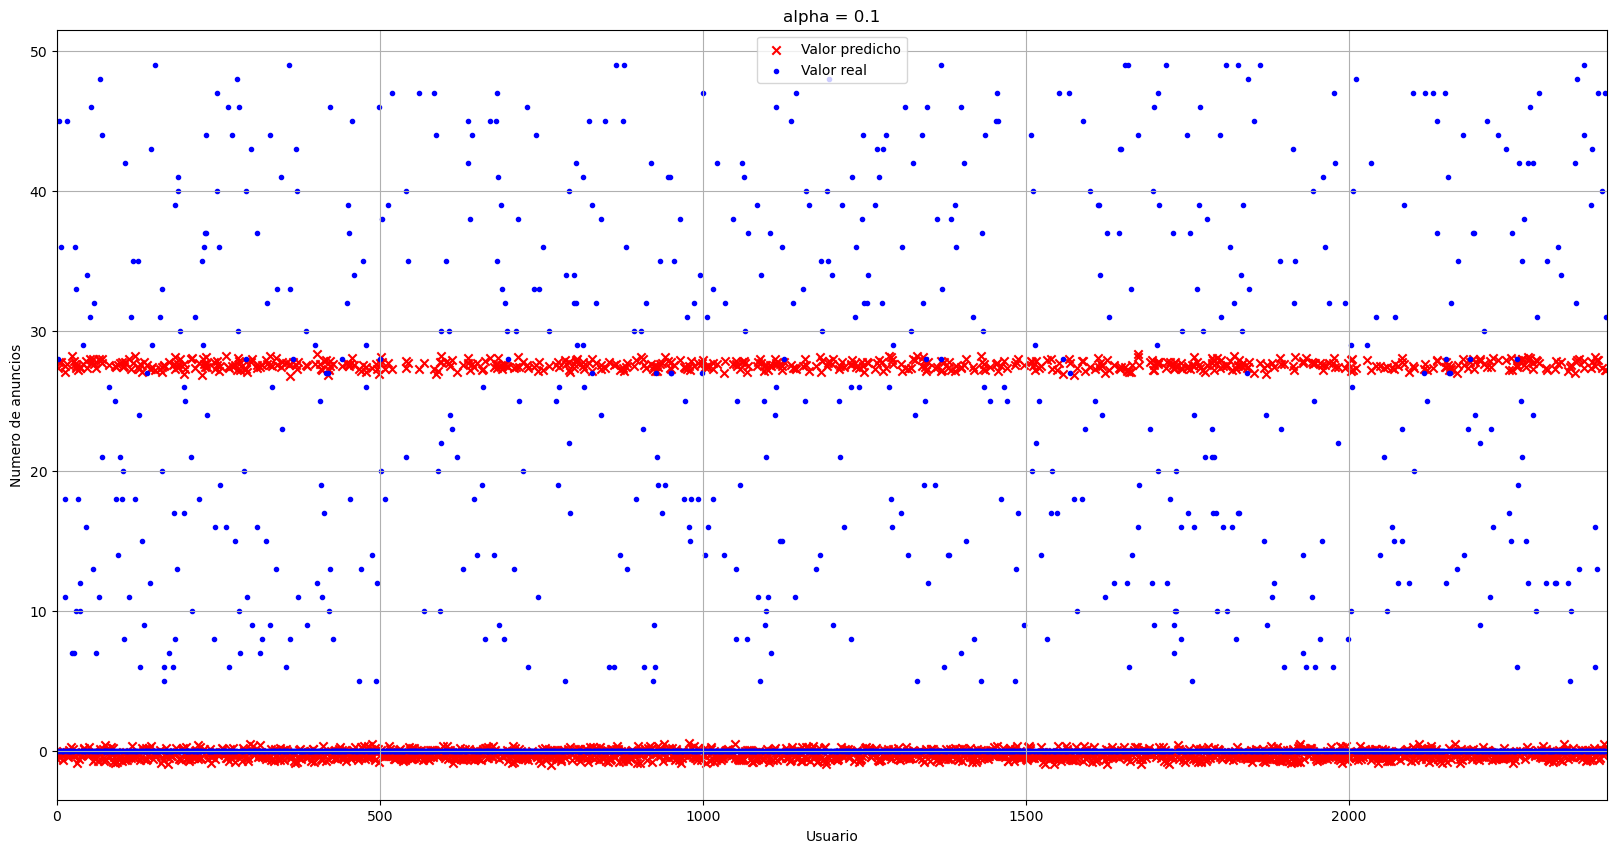

MAE: 3.1606020312046055, MSE: 44.231963850287634, RMSE: 6.650711529625054


In [125]:
predicho = []

# Se predice con el conjunto de entrenamiento
X_testGen_Norm, mu, sigma= normalizaYAnyade(X_testGen)
for i in range(X_testGen_Norm.shape[0]):
    J = np.dot(theta, X_testGen_Norm.iloc[i])
    predicho.append(J)



plt.figure(figsize=(20,10))
plt.scatter(range(X_testGen_Norm.shape[0]), predicho, marker = "x", c = "red", label="Valor predicho")
plt.scatter(range(X_testGen_Norm.shape[0]), y_testGen, marker = ".", c = "blue", label="Valor real")
plt.xlabel("Usuario")
plt.ylabel("Numero de anuncios")
plt.grid(True)
plt.xlim(0, X_testGen_Norm.shape[0]) # Se reduce el campo de vision para obervar mejor un ejemplo
#plt.xlim(0, 100) 
plt.title("alpha = 0.1")
plt.legend()
plt.show()

MAE3, MSE3, RMSE3 = calculaErrores(X_testGen_Norm, theta, y_testGen)
print(f"MAE: {MAE3}, MSE: {MSE3}, RMSE: {RMSE3}")

#### Modelo 4. alpha = 1

Fold 0


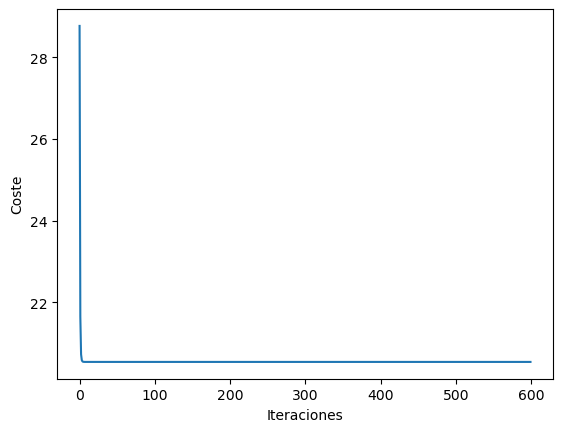

MAE: 2.7978075070887893, MSE: 37.785023752464554, RMSE: 6.146952395493604
Fold 1


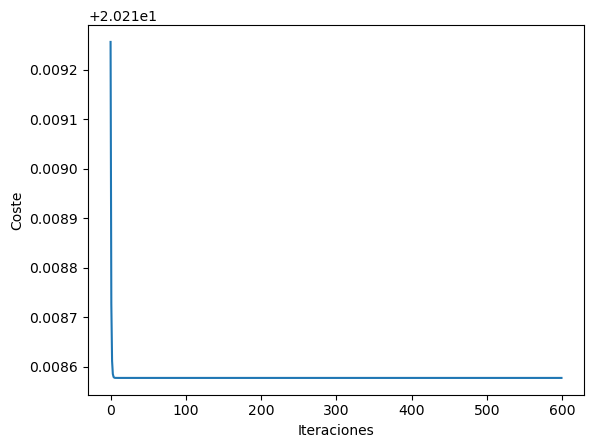

MAE: 3.146836128716322, MSE: 43.9125395701133, RMSE: 6.6266537234197855
Fold 2


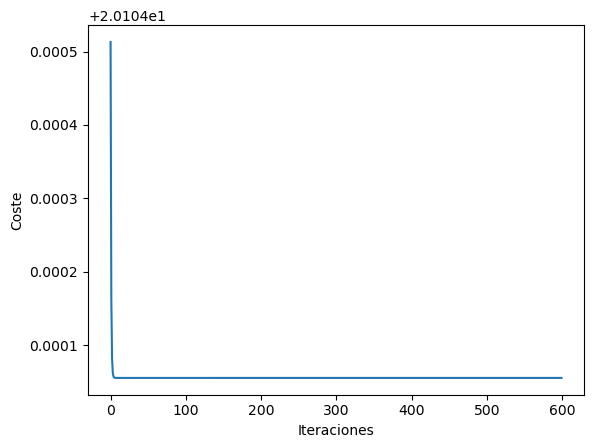

MAE: 3.267103861253359, MSE: 46.38547731222298, RMSE: 6.810688460957746
Fold 3


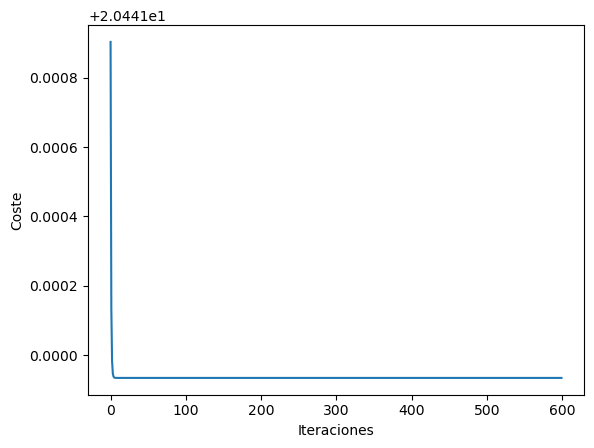

MAE: 2.932983469794577, MSE: 39.685309169260044, RMSE: 6.299627700845507
Fold 4


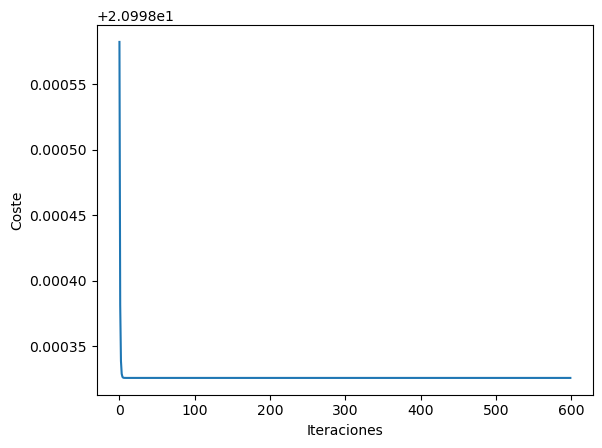

MAE: 2.733172166003743, MSE: 30.381648297698874, RMSE: 5.511955034078097
Fold 5


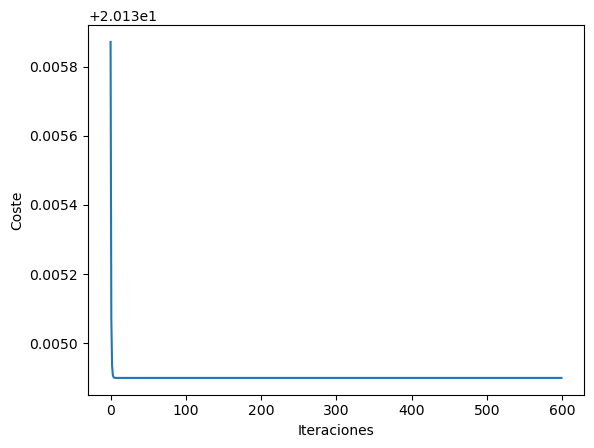

MAE: 3.2762814247587024, MSE: 45.67323737423868, RMSE: 6.75819779040527
Fold 6


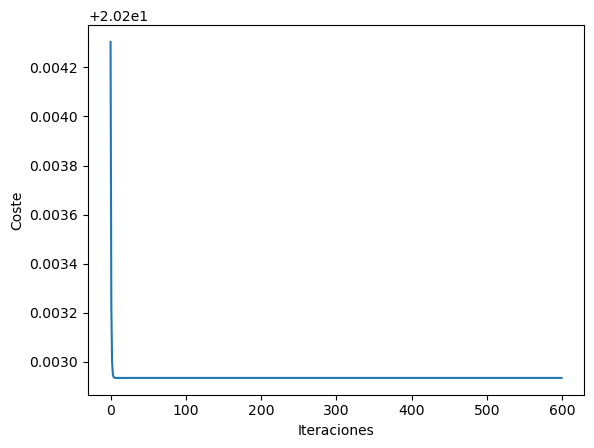

MAE: 3.1897322475683096, MSE: 43.97113353744009, RMSE: 6.631073332232127
Fold 7


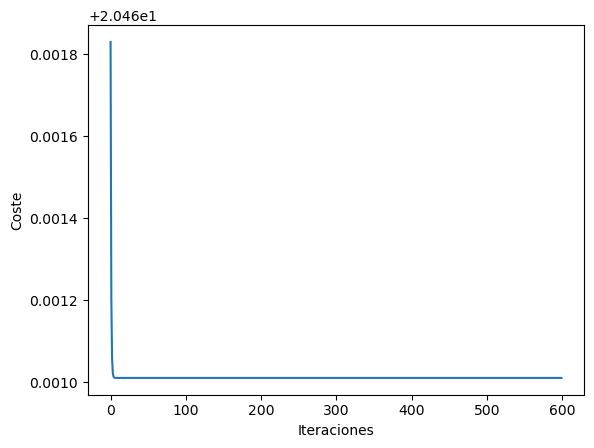

MAE: 2.969917286761205, MSE: 39.26660274445793, RMSE: 6.2663069462369885
Fold 8


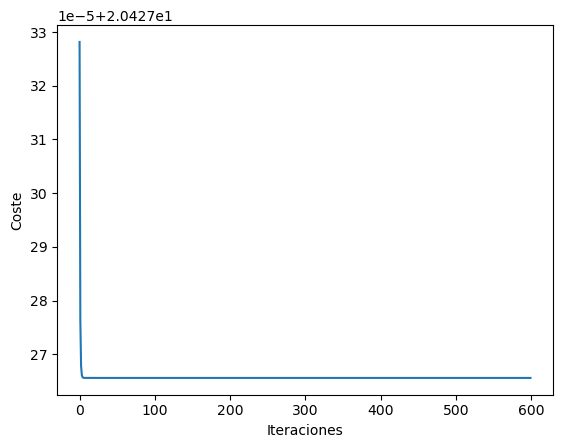

MAE: 2.9094516614803263, MSE: 39.909727054685355, RMSE: 6.317414586259584
Fold 9


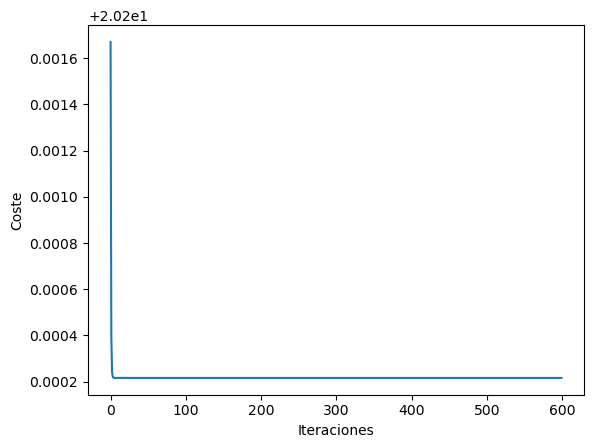

MAE: 3.1684529174050735, MSE: 45.626620918965685, RMSE: 6.754748027792427


In [126]:
theta = thetaInicial(X.shape[1] + 1)

X_trainGen, y_trainGen, X_testGen, y_testGen = generaTrainTest(X, y, tamTest = 0.3)
#print(X_trainGen)

listado = generaIndicesKFolds(X_trainGen, 10)

for i in range(len(listado)):
    print(f"Fold {i}")
    X_train, y_train, X_val, y_val = generaContenidoKFolds(X_trainGen, y_trainGen, listado[i] ) # Genera una iteracion del cross validation
    
    X_norm, mu, sigma = normalizaYAnyade(X_train)

    alpha =  1
    theta, J_history = gradientDescent(X_norm, y_train, theta, alpha, 600)
    mostrarHistorico(J_history)

    X_val_norm, mu, sigma = normalizaYAnyade(X_val)
    MAE, MSE, RMSE = calculaErrores(X_val_norm, theta, y_val)
    print(f"MAE: {MAE}, MSE: {MSE}, RMSE: {RMSE}")

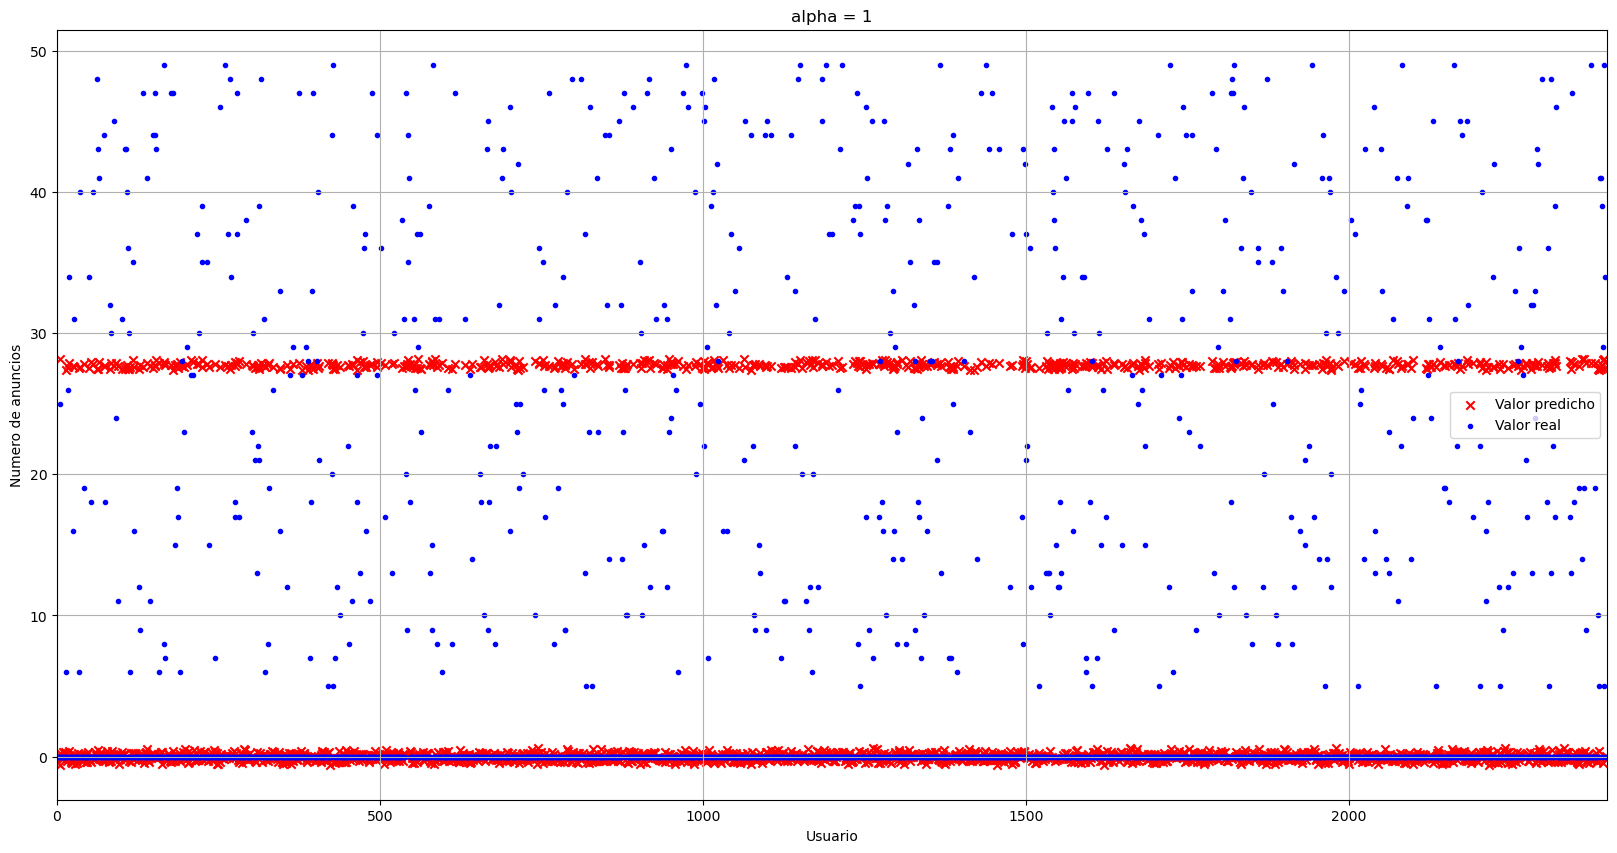

MAE: 3.159303815737517, MSE: 46.46083523781476, RMSE: 6.816218543871284


In [127]:
predicho = []

# Se predice con el conjunto de entrenamiento
X_testGen_Norm, mu, sigma= normalizaYAnyade(X_testGen)
for i in range(X_testGen_Norm.shape[0]):
    J = np.dot(theta, X_testGen_Norm.iloc[i])
    predicho.append(J)



plt.figure(figsize=(20,10))
plt.scatter(range(X_testGen_Norm.shape[0]), predicho, marker = "x", c = "red", label="Valor predicho")
plt.scatter(range(X_testGen_Norm.shape[0]), y_testGen, marker = ".", c = "blue", label="Valor real")
plt.xlabel("Usuario")
plt.ylabel("Numero de anuncios")
plt.grid(True)
plt.xlim(0, X_testGen_Norm.shape[0]) # Se reduce el campo de vision para obervar mejor un ejemplo
#plt.xlim(0, 100) 
plt.title("alpha = 1")
plt.legend()
plt.show()

MAE4, MSE4, RMSE4 = calculaErrores(X_testGen_Norm, theta, y_testGen)
print(f"MAE: {MAE4}, MSE: {MSE4}, RMSE: {RMSE4}")

### Apartado c

La discusión se toma en la documentación. Las siguientes operaciones son para justificar palabras de la documentación:

In [ ]:
theta = thetaInicial(X.shape[1] + 1)

X_trainGen, y_trainGen, X_testGen, y_testGen = generaTrainTest(X, y, tamTest = 0.3)
#print(X_trainGen)

listado = generaIndicesKFolds(X_trainGen, 10)

for i in range(len(listado)):
    print(f"Fold {i}")
    X_train, y_train, X_val, y_val = generaContenidoKFolds(X_trainGen, y_trainGen, listado[i] ) # Genera una iteracion del cross validation
    
    X_norm, mu, sigma = normalizaYAnyade(X_train)

    alpha =  3
    theta, J_history = gradientDescent(X_norm, y_train, theta, alpha, 600)
    mostrarHistorico(J_history)

    X_val_norm, mu, sigma = normalizaYAnyade(X_val)
    MAE, MSE, RMSE = calculaErrores(X_val_norm, theta, y_val)
    print(f"MAE: {MAE}, MSE: {MSE}, RMSE: {RMSE}")

Solo muestra un resultado porque en la primera grafica tiende a infinito. Al intentar continuar por donde iba la primera, como no pueden agarrar un valor tan grande sucede el error.

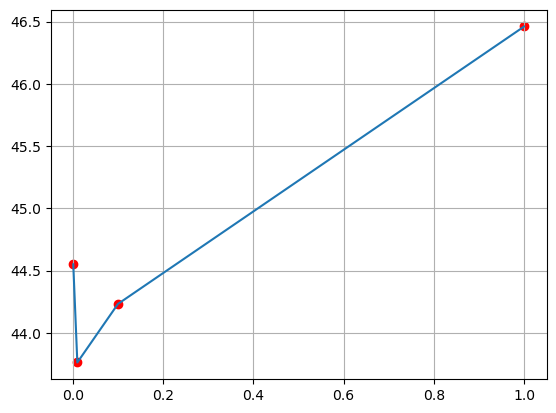

In [130]:
error = [MSE1, MSE2, MSE3, MSE4]
num_iter = [0.001, 0.01, 0.1, 1]

plt.plot(num_iter, error)
plt.scatter(num_iter, error, c="red")

plt.grid(True)
plt.show()

## Apartado 4
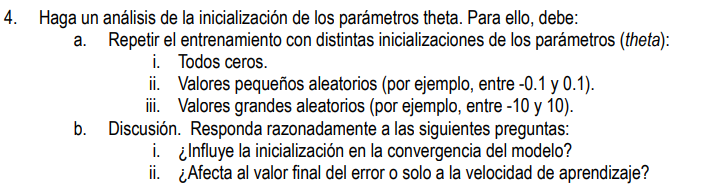

### Apartado a
Se utilizará la misma implementación que en el apartado anterior. Tal como se comenta en el enunciado, se creará un modelo con los theta inicializados a 0, otro con valores entre -0.1 y 0.1 y otro con los valores entre -10 y 10.

In [131]:
X = pd.DataFrame({
    "Family":subscription_type["Family"]
    ,"Free":subscription_type["Free"]
    ,"Premium":subscription_type["Premium"]
    ,"Student":subscription_type["Student"]
    
    ,"listening_time":file["listening_time"]
    ,"songs_played_per_day":file["songs_played_per_day"]
    ,"skip_rate":file["skip_rate"]
    
    ,"Desktop":device_type["Desktop"]
    ,"Mobile":device_type["Mobile"]
    ,"Web":device_type["Web"] 
    })
y = file["ads_listened_per_week"]

#### Modelo 1. Theta de todo ceros

Fold 0


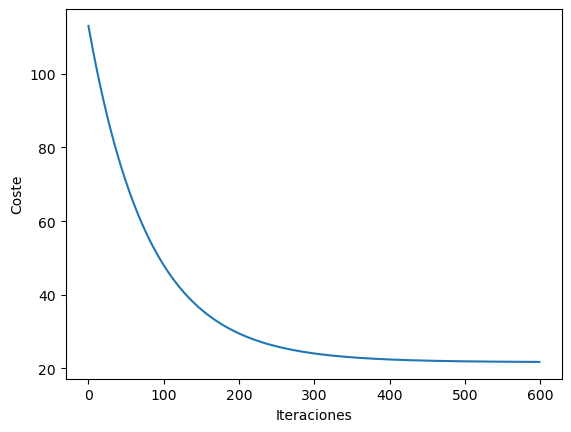

MAE: 2.97229046105507, MSE: 39.80716610982518, RMSE: 6.309292045057447
Fold 1


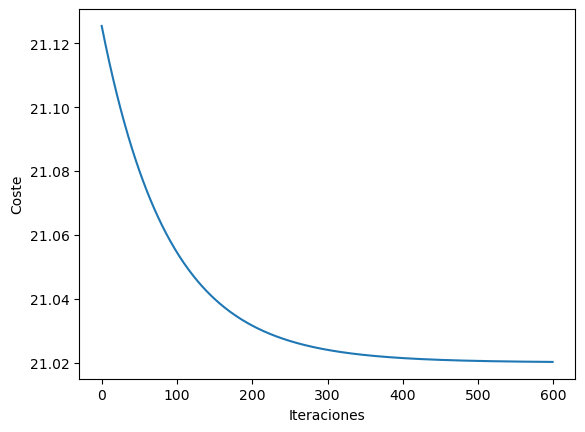

MAE: 3.526192688294126, MSE: 51.32297658979909, RMSE: 7.164005624634803
Fold 2


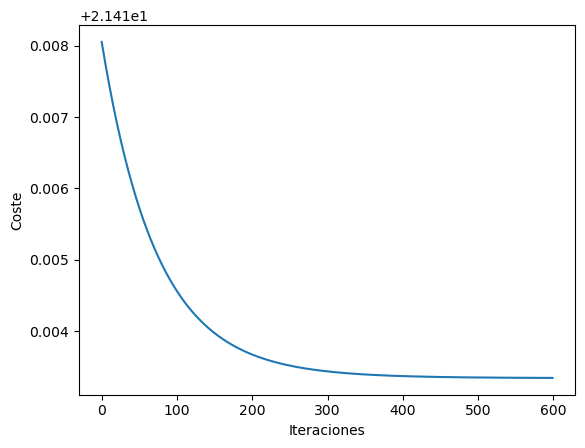

MAE: 3.219830180060795, MSE: 44.349006364126126, RMSE: 6.659504963893797
Fold 3


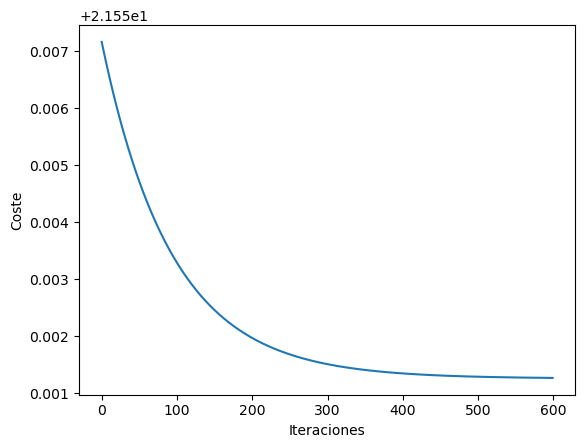

MAE: 3.034876920452986, MSE: 41.7964231745743, RMSE: 6.465015326708383
Fold 4


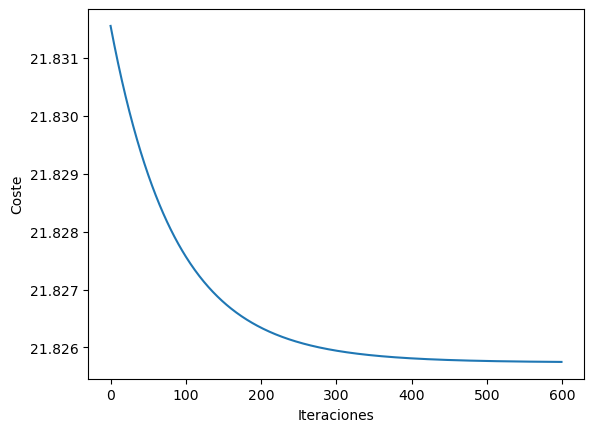

MAE: 2.8581610762920793, MSE: 37.04837822744514, RMSE: 6.086737897054968
Fold 5


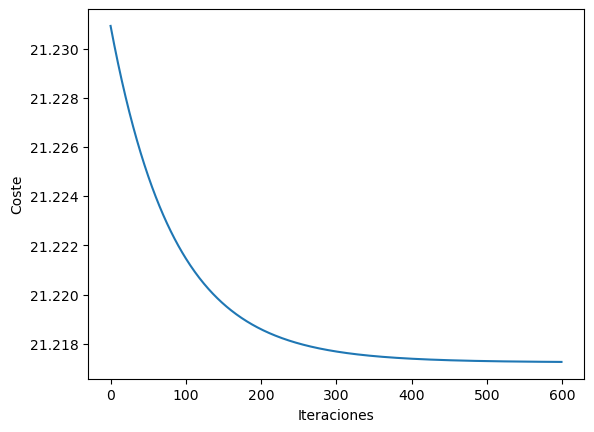

MAE: 3.2592775041128133, MSE: 48.07610100338149, RMSE: 6.933693171995822
Fold 6


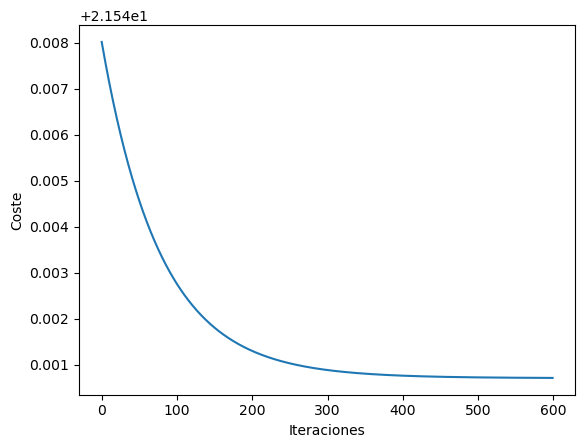

MAE: 3.025744888802149, MSE: 41.95209210265757, RMSE: 6.47704346925799
Fold 7


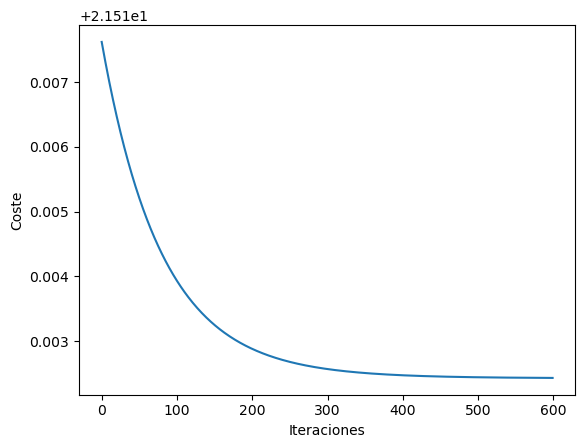

MAE: 3.145606993014952, MSE: 42.902110109273934, RMSE: 6.549970237281536
Fold 8


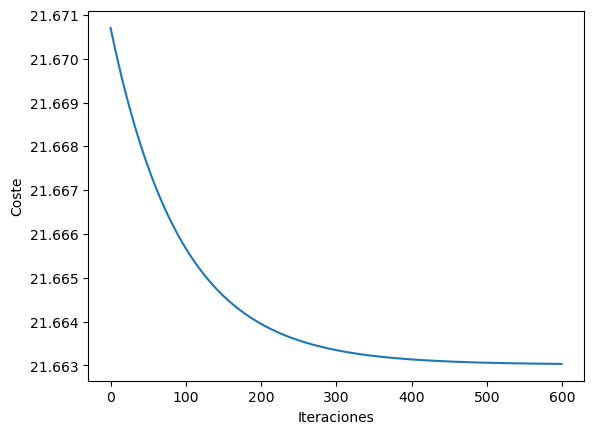

MAE: 3.0365615161105763, MSE: 39.96852060641663, RMSE: 6.322066165931565
Fold 9


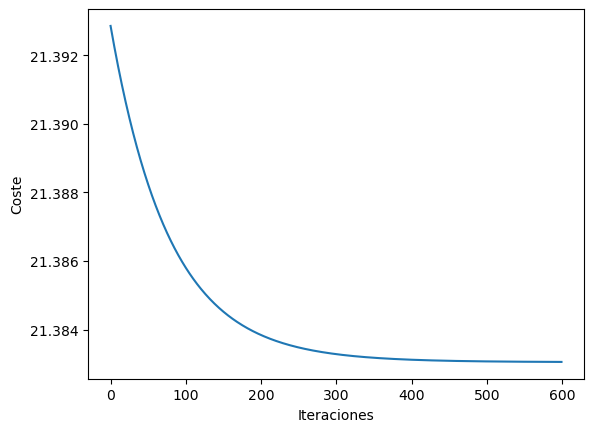

MAE: 3.118222883562586, MSE: 45.181340033851534, RMSE: 6.72170663104628


In [132]:
theta = thetaInicial(X.shape[1] + 1)

X_trainGen, y_trainGen, X_testGen, y_testGen = generaTrainTest(X, y, tamTest = 0.3)
#print(X_trainGen)

listado = generaIndicesKFolds(X_trainGen, 10)

for i in range(len(listado)):
    print(f"Fold {i}")
    X_train, y_train, X_val, y_val = generaContenidoKFolds(X_trainGen, y_trainGen, listado[i] ) # Genera una iteracion del cross validation
    
    X_norm, mu, sigma = normalizaYAnyade(X_train)

    alpha =  0.005
    theta, J_history = gradientDescent(X_norm, y_train, theta, alpha, 600)
    mostrarHistorico(J_history)

    X_val_norm, mu, sigma = normalizaYAnyade(X_val)
    MAE, MSE, RMSE = calculaErrores(X_val_norm, theta, y_val)
    print(f"MAE: {MAE}, MSE: {MSE}, RMSE: {RMSE}")

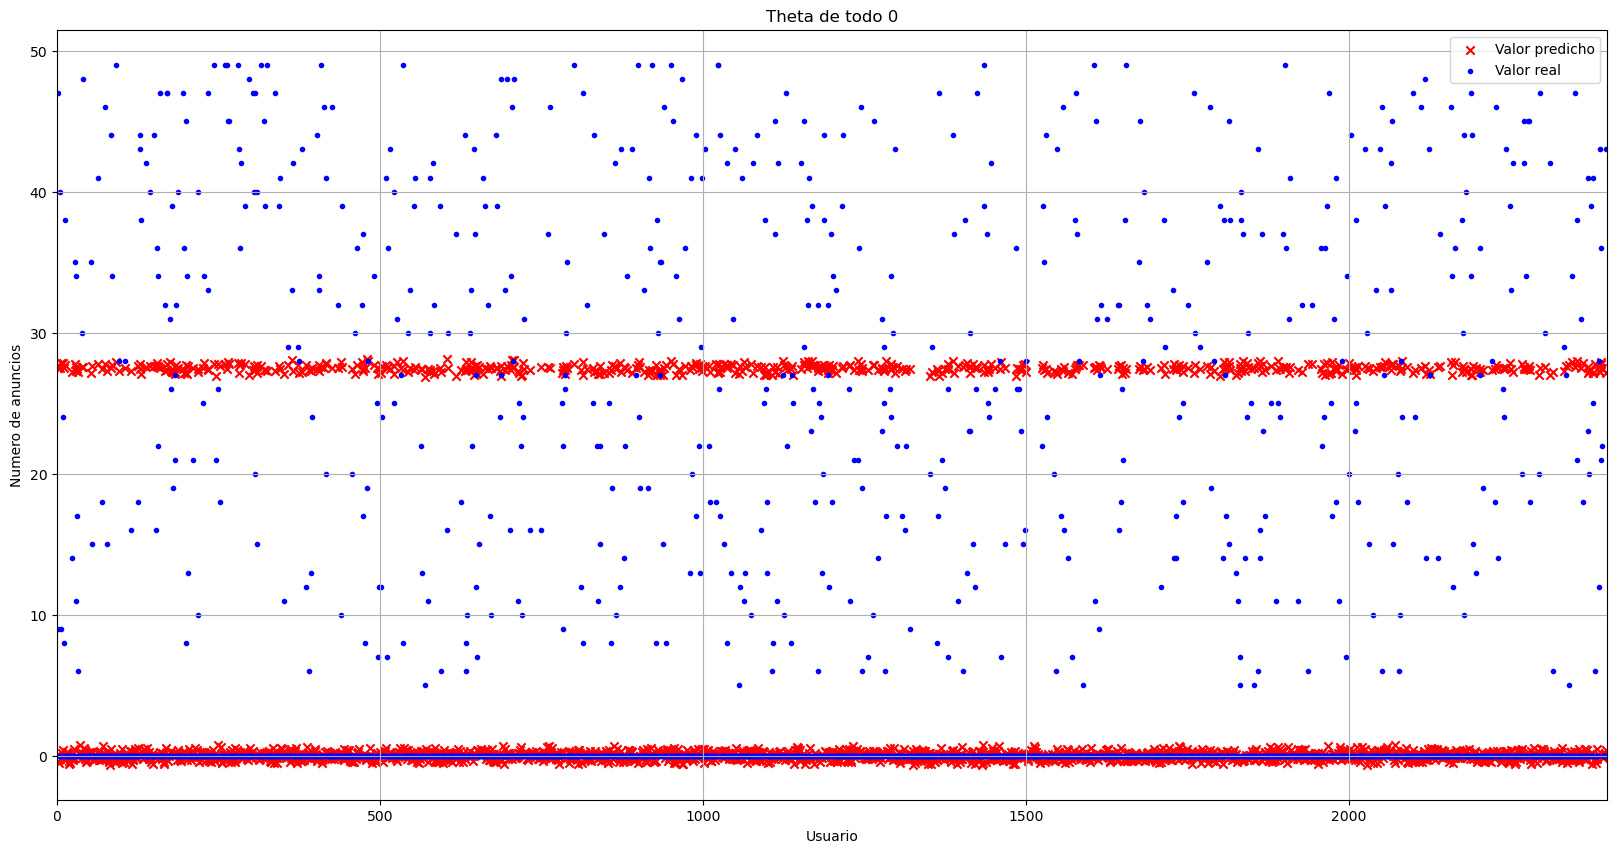

MAE: 2.9492565230838386, MSE: 41.23429021068364, RMSE: 6.421393167427427


In [133]:
predicho = []

# Se predice con el conjunto de entrenamiento
X_testGen_Norm, mu, sigma= normalizaYAnyade(X_testGen)
for i in range(X_testGen_Norm.shape[0]):
    J = np.dot(theta, X_testGen_Norm.iloc[i])
    predicho.append(J)

plt.figure(figsize=(20,10))
plt.scatter(range(X_testGen_Norm.shape[0]), predicho, marker = "x", c = "red", label="Valor predicho")
plt.scatter(range(X_testGen_Norm.shape[0]), y_testGen, marker = ".", c = "blue", label="Valor real")
plt.xlabel("Usuario")
plt.ylabel("Numero de anuncios")
plt.grid(True)
plt.xlim(0, X_testGen_Norm.shape[0]) # Se reduce el campo de vision para obervar mejor un ejemplo
#plt.xlim(0, 100) 
plt.title("Theta de todo 0")
plt.legend()
plt.show()

MAE1, MSE1, RMSE1 = calculaErrores(X_testGen_Norm, theta, y_testGen)
print(f"MAE: {MAE1}, MSE: {MSE1}, RMSE: {RMSE1}")

#### Modelo 2. Theta de valores pequeños aleatorios

Fold 0


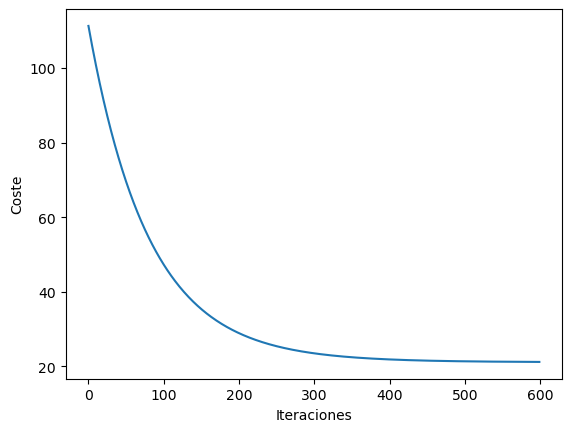

MAE: 2.665375304956905, MSE: 34.12612034168798, RMSE: 5.841756614383039
Fold 1


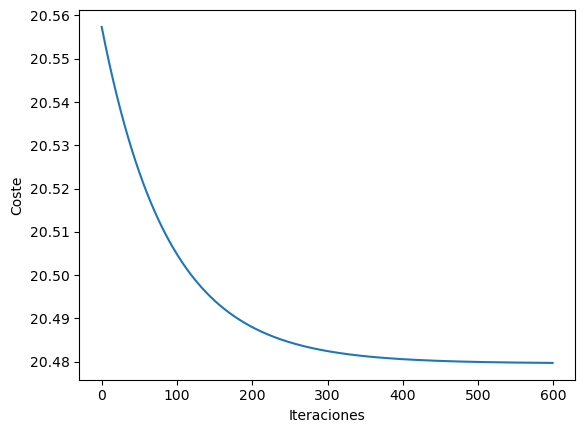

MAE: 3.2141821499451684, MSE: 45.963115368039794, RMSE: 6.779610266677562
Fold 2


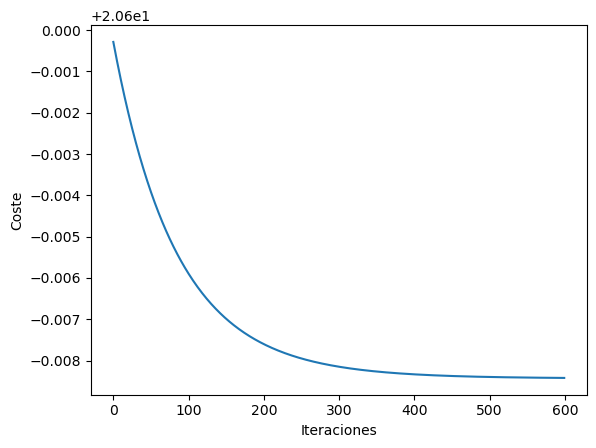

MAE: 3.1469118436417216, MSE: 44.04265611412671, RMSE: 6.636464127389427
Fold 3


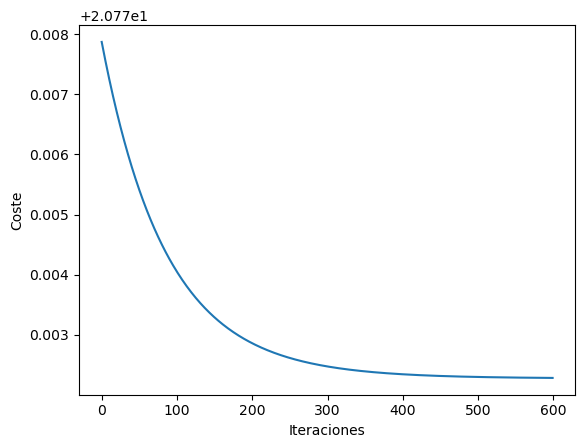

MAE: 2.9415596934026116, MSE: 40.8555489608843, RMSE: 6.391834553622637
Fold 4


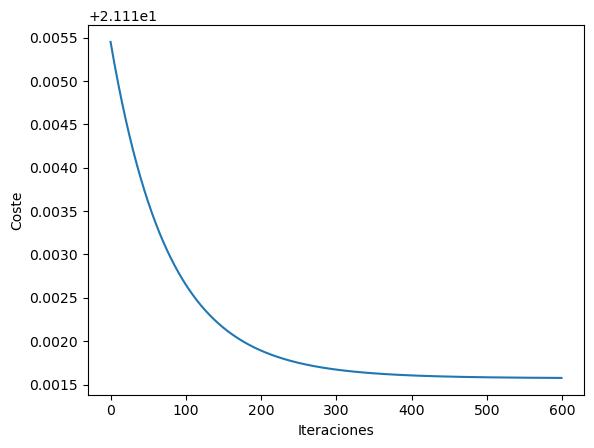

MAE: 2.719052035071624, MSE: 34.74684424608954, RMSE: 5.894645387645429
Fold 5


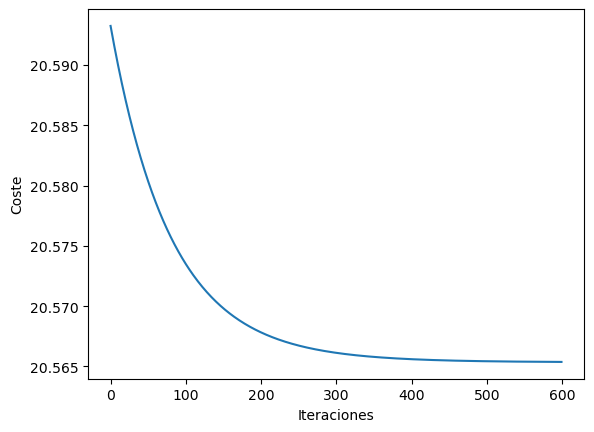

MAE: 3.281100024596991, MSE: 45.70459932769222, RMSE: 6.760517681930299
Fold 6


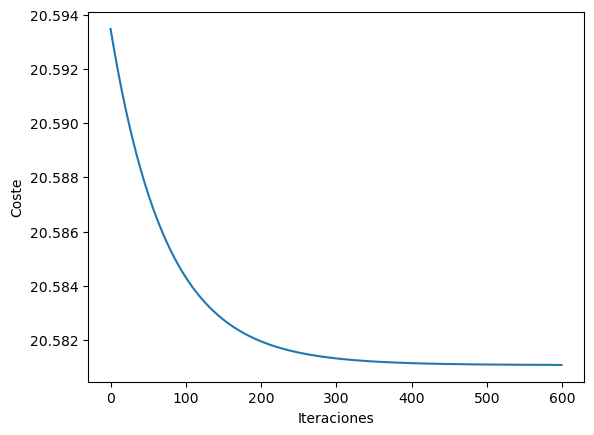

MAE: 3.173364542846219, MSE: 44.29777641684085, RMSE: 6.655657474422857
Fold 7


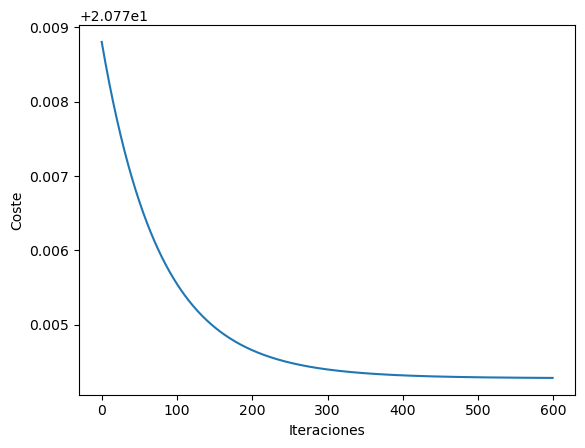

MAE: 2.9180587240965914, MSE: 40.66502663143416, RMSE: 6.376913566250852
Fold 8


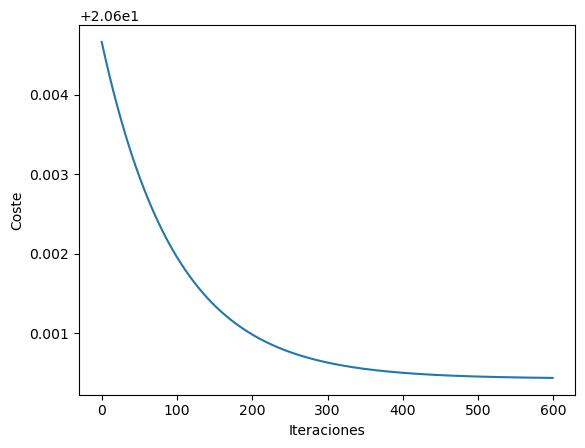

MAE: 3.066871488019515, MSE: 44.02517117544954, RMSE: 6.635146658171886
Fold 9


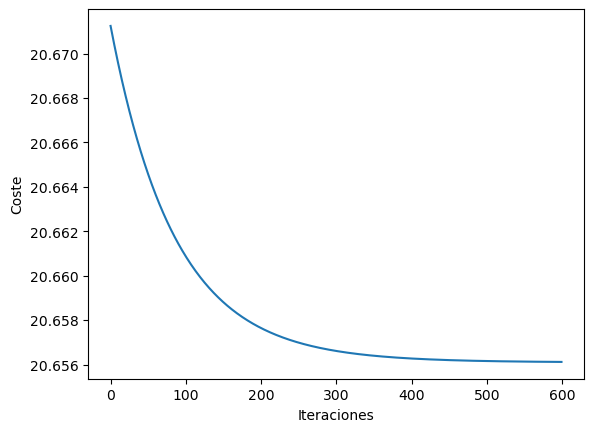

MAE: 2.9677795590828273, MSE: 43.30554243605284, RMSE: 6.580694677315826


In [134]:
theta = np.random.uniform(-0.1, 0.1, size=(X.shape[1] + 1))

X_trainGen, y_trainGen, X_testGen, y_testGen = generaTrainTest(X, y, tamTest = 0.3)
#print(X_trainGen)

listado = generaIndicesKFolds(X_trainGen, 10)

for i in range(len(listado)):
    print(f"Fold {i}")
    X_train, y_train, X_val, y_val = generaContenidoKFolds(X_trainGen, y_trainGen, listado[i] ) # Genera una iteracion del cross validation
    
    X_norm, mu, sigma = normalizaYAnyade(X_train)

    alpha =  0.005
    theta, J_history = gradientDescent(X_norm, y_train, theta, alpha, 600)
    mostrarHistorico(J_history)

    X_val_norm, mu, sigma = normalizaYAnyade(X_val)
    MAE, MSE, RMSE = calculaErrores(X_val_norm, theta, y_val)
    print(f"MAE: {MAE}, MSE: {MSE}, RMSE: {RMSE}")

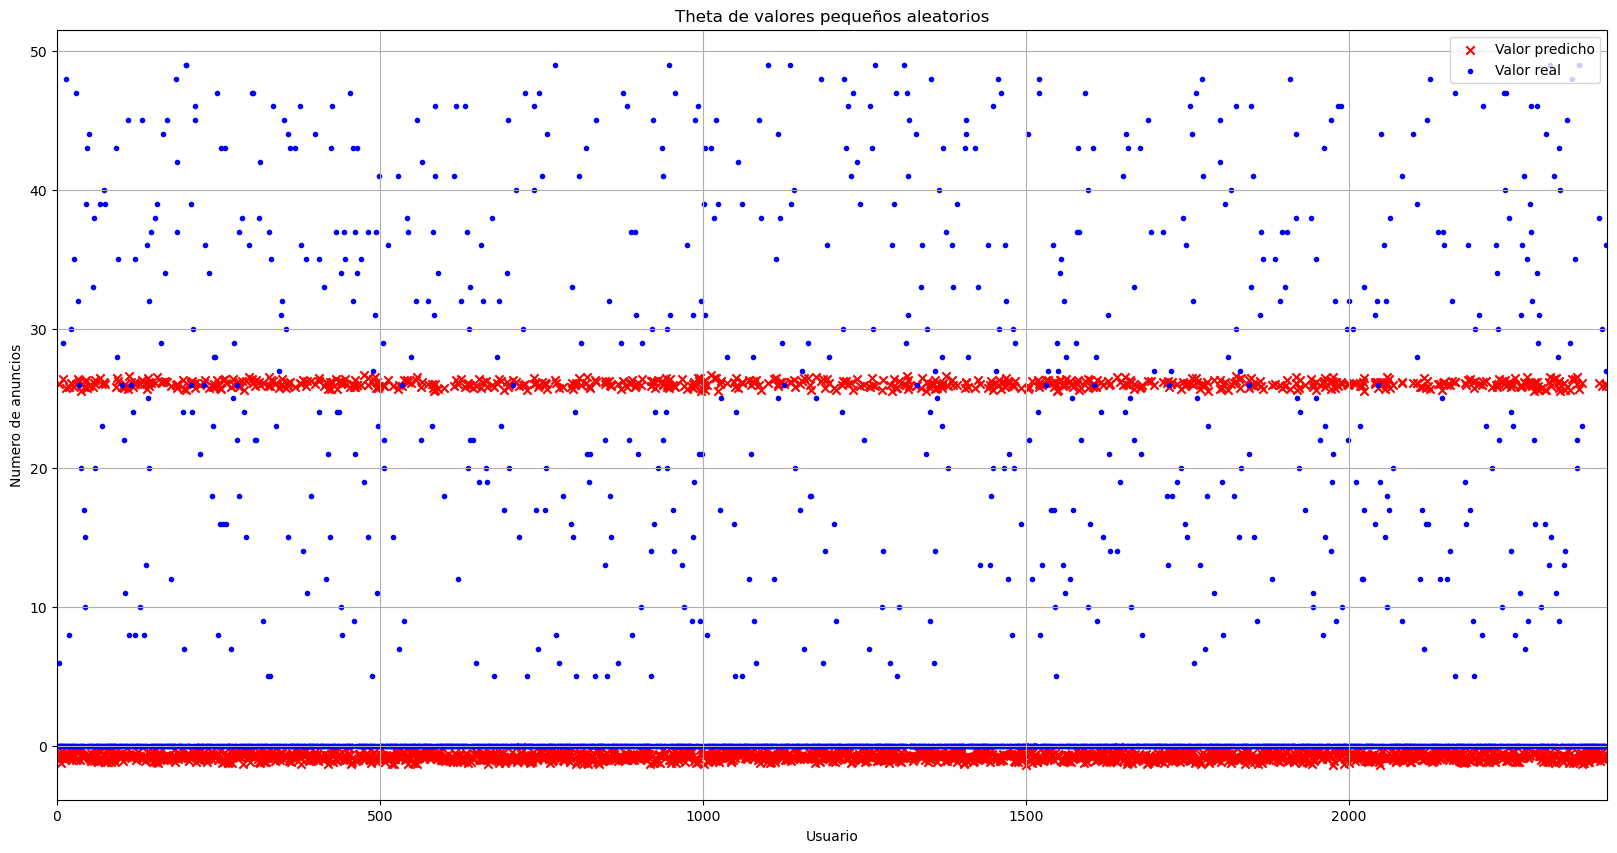

MAE: 3.6181680199529582, MSE: 46.015261337469646, RMSE: 6.783454970549274


In [135]:
predicho = []

# Se predice con el conjunto de entrenamiento
X_testGen_Norm, mu, sigma= normalizaYAnyade(X_testGen)
for i in range(X_testGen_Norm.shape[0]):
    J = np.dot(theta, X_testGen_Norm.iloc[i])
    predicho.append(J)



plt.figure(figsize=(20,10))
plt.scatter(range(X_testGen_Norm.shape[0]), predicho, marker = "x", c = "red", label="Valor predicho")
plt.scatter(range(X_testGen_Norm.shape[0]), y_testGen, marker = ".", c = "blue", label="Valor real")
plt.xlabel("Usuario")
plt.ylabel("Numero de anuncios")
plt.grid(True)
plt.xlim(0, X_testGen_Norm.shape[0]) # Se reduce el campo de vision para obervar mejor un ejemplo
#plt.xlim(0, 100) 
plt.title("Theta de valores pequeños aleatorios")
plt.legend()
plt.show()

MAE2, MSE2, RMSE2 = calculaErrores(X_testGen_Norm, theta, y_testGen)
print(f"MAE: {MAE2}, MSE: {MSE2}, RMSE: {RMSE2}")

#### Modelo 3. Theta de valores grandes aleatorios

Fold 0


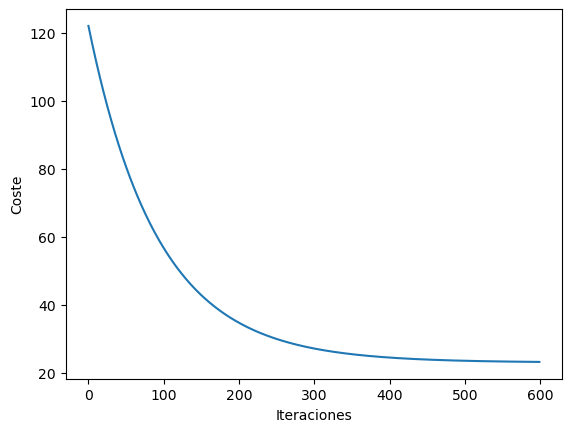

MAE: 3.0703089564951385, MSE: 37.403122260141416, RMSE: 6.115809207303758
Fold 1


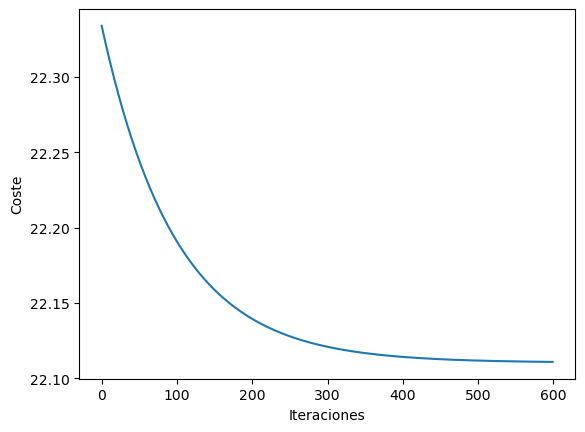

MAE: 3.64546142789704, MSE: 51.402664261722364, RMSE: 7.169565137560462
Fold 2


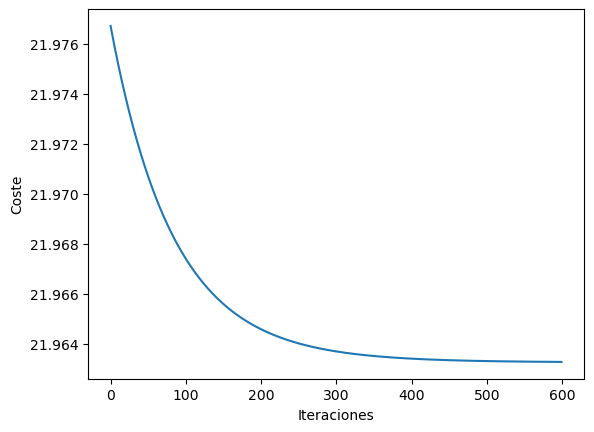

MAE: 4.122921679687732, MSE: 54.42102512733033, RMSE: 7.377060737673937
Fold 3


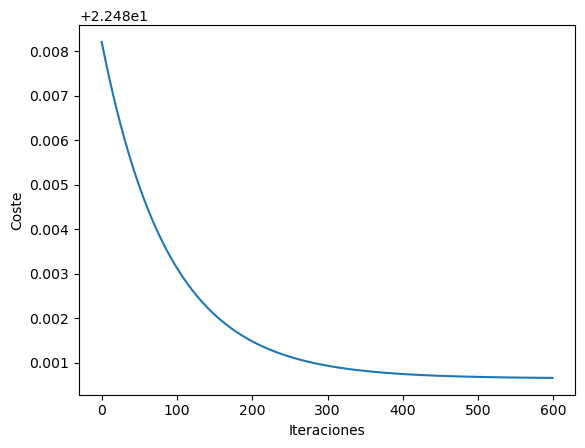

MAE: 3.263054693026177, MSE: 44.46100554772886, RMSE: 6.667908633726834
Fold 4


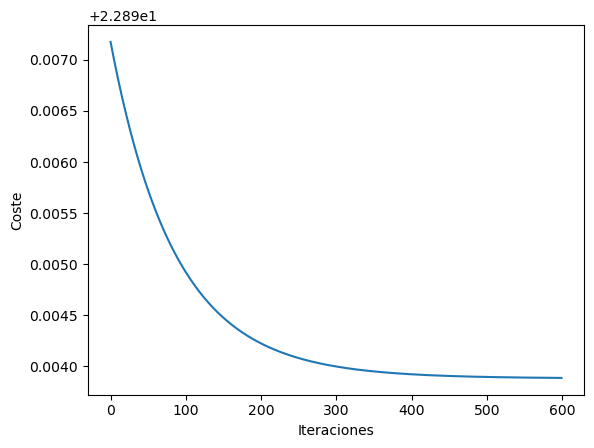

MAE: 2.9756837085365064, MSE: 36.988665368174196, RMSE: 6.081830757935821
Fold 5


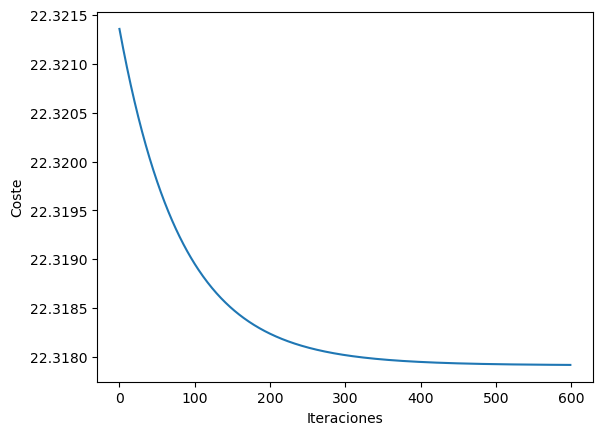

MAE: 3.395253763228857, MSE: 47.49952876750051, RMSE: 6.891990189161655
Fold 6


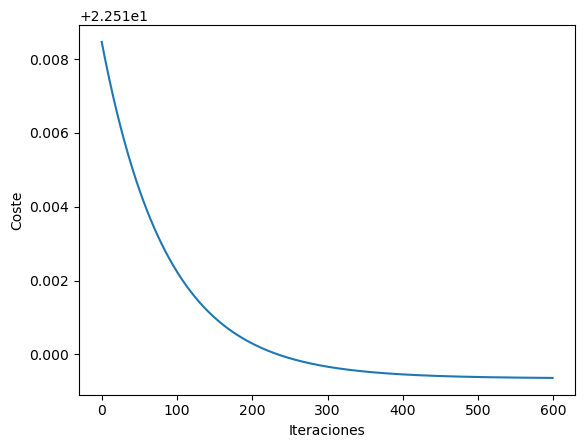

MAE: 3.235507710481462, MSE: 44.30205949913487, RMSE: 6.6559792291694295
Fold 7


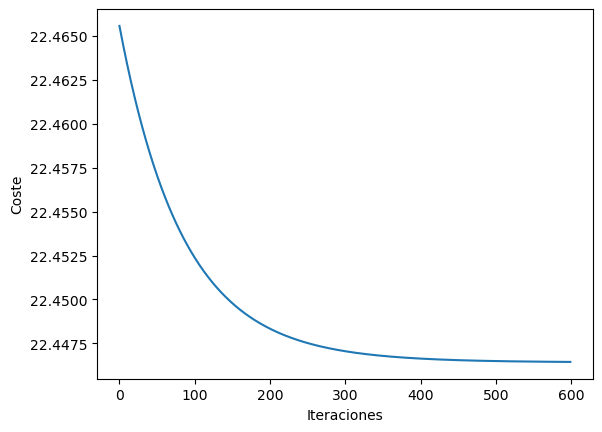

MAE: 3.3283497026194078, MSE: 45.52561127655199, RMSE: 6.747266948665363
Fold 8


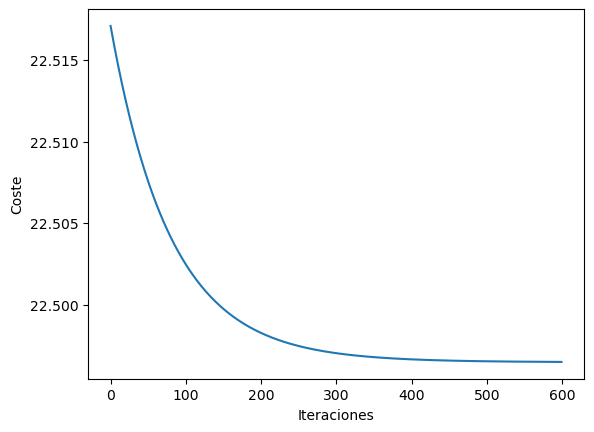

MAE: 3.2597215381068105, MSE: 44.20514517111523, RMSE: 6.648694997600298
Fold 9


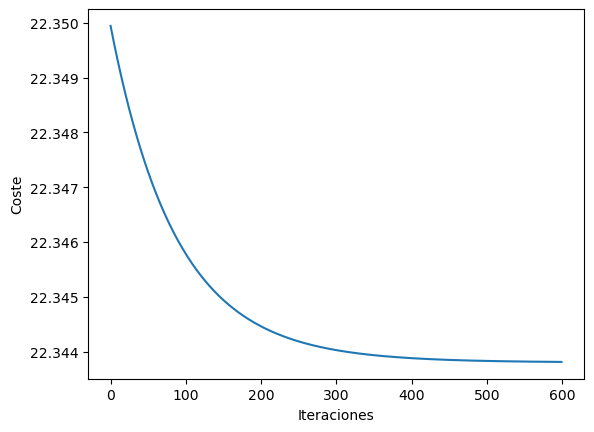

MAE: 3.3639779743958393, MSE: 47.174034941764646, RMSE: 6.868335674802495


In [136]:
theta = theta = np.random.uniform(-10, 10, size=(X.shape[1] + 1))

X_trainGen, y_trainGen, X_testGen, y_testGen = generaTrainTest(X, y, tamTest = 0.3)
#print(X_trainGen)

listado = generaIndicesKFolds(X_trainGen, 10)

for i in range(len(listado)):
    print(f"Fold {i}")
    X_train, y_train, X_val, y_val = generaContenidoKFolds(X_trainGen, y_trainGen, listado[i] ) # Genera una iteracion del cross validation
    
    X_norm, mu, sigma = normalizaYAnyade(X_train)

    alpha =  0.005
    theta, J_history = gradientDescent(X_norm, y_train, theta, alpha, 600)
    mostrarHistorico(J_history)

    X_val_norm, mu, sigma = normalizaYAnyade(X_val)
    MAE, MSE, RMSE = calculaErrores(X_val_norm, theta, y_val)
    print(f"MAE: {MAE}, MSE: {MSE}, RMSE: {RMSE}")

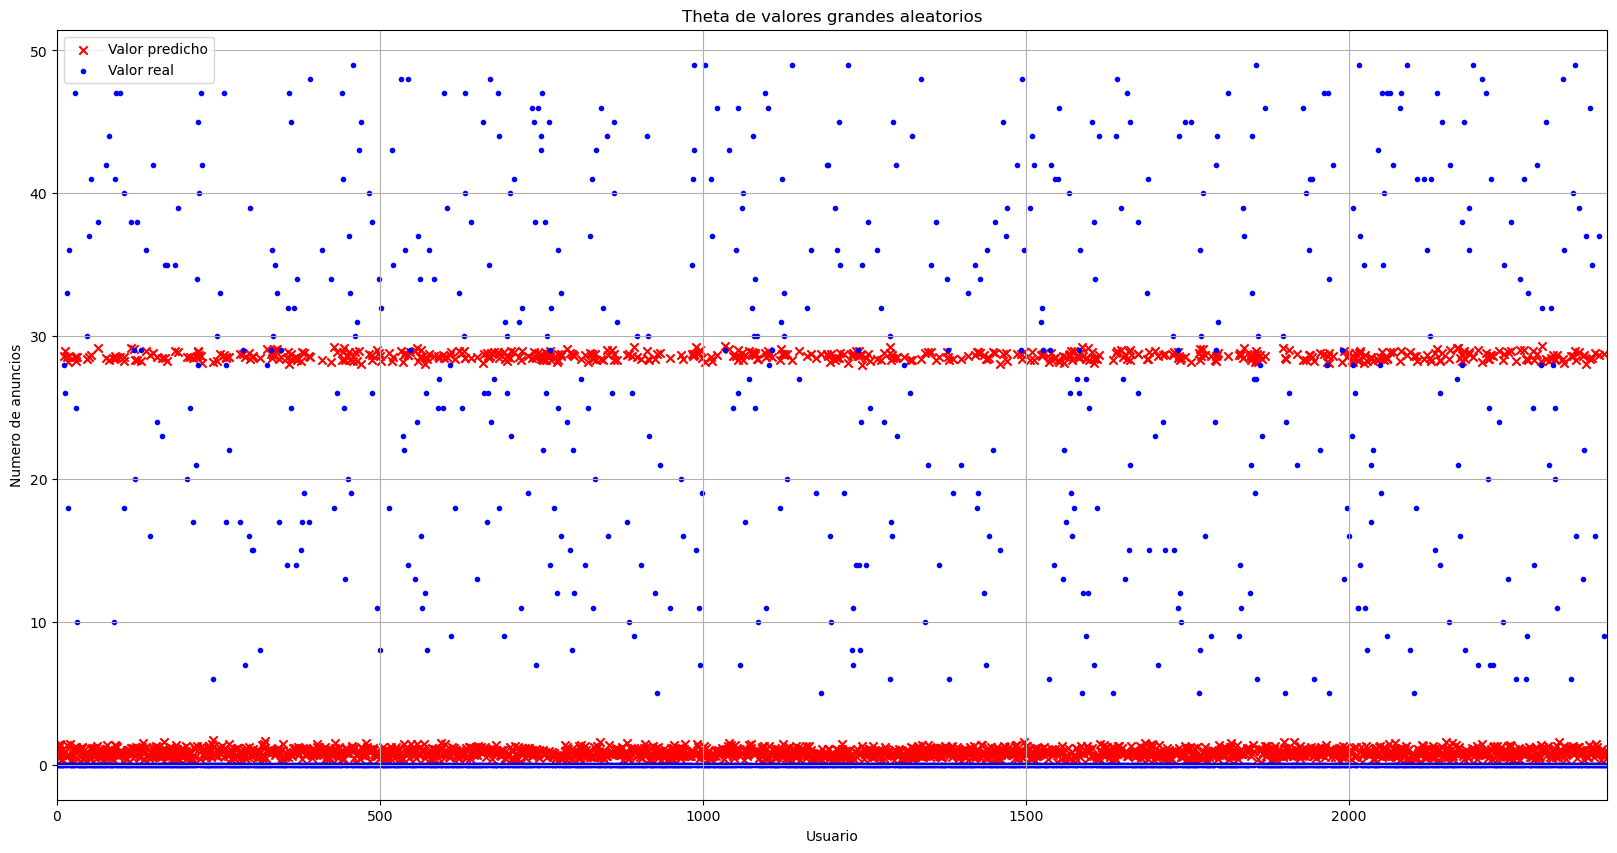

MAE: 3.1308472951294455, MSE: 37.21228282608429, RMSE: 6.100187114022347


In [137]:
predicho = []

# Se predice con el conjunto de entrenamiento
X_testGen_Norm, mu, sigma= normalizaYAnyade(X_testGen)
for i in range(X_testGen_Norm.shape[0]):
    J = np.dot(theta, X_testGen_Norm.iloc[i])
    predicho.append(J)



plt.figure(figsize=(20,10))
plt.scatter(range(X_testGen_Norm.shape[0]), predicho, marker = "x", c = "red", label="Valor predicho")
plt.scatter(range(X_testGen_Norm.shape[0]), y_testGen, marker = ".", c = "blue", label="Valor real")
plt.xlabel("Usuario")
plt.ylabel("Numero de anuncios")
plt.grid(True)
plt.xlim(0, X_testGen_Norm.shape[0]) # Se reduce el campo de vision para obervar mejor un ejemplo
#plt.xlim(0, 100) 
plt.title("Theta de valores grandes aleatorios")
plt.legend()
plt.show()

MAE3, MSE3, RMSE3 = calculaErrores(X_testGen_Norm, theta, y_testGen)
print(f"MAE: {MAE3}, MSE: {MSE3}, RMSE: {RMSE3}")

### Apartado b

La discusión se toma en la documentación. Las siguientes operaciones son para justificar palabras de la documentación:

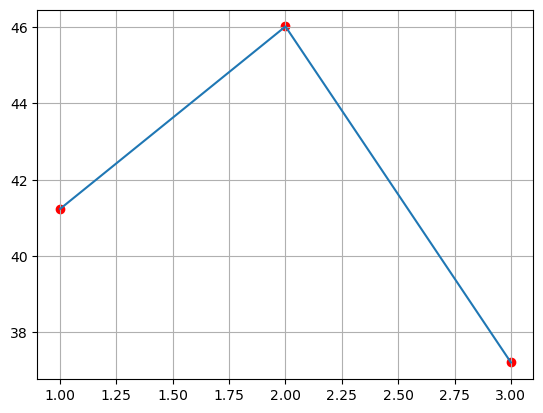

In [138]:
error = [MSE1, MSE2, MSE3]
num_iter = [1, 2, 3]

plt.plot(num_iter, error)
plt.scatter(num_iter, error, c="red")

plt.grid(True)
plt.show()

## Apartado 5
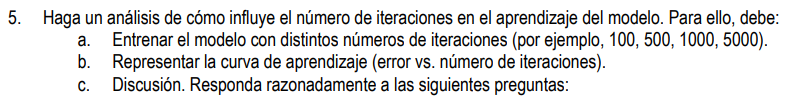
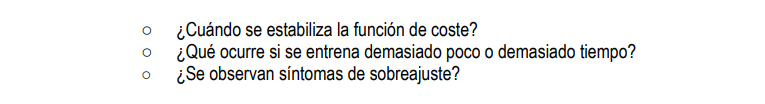

### Apartado a
Se utilizará la misma implementación que la del anterior apartado. En este apartado se cambiarán el numero de iteraciones del entrenamiento del modelo.

In [70]:
X = pd.DataFrame({
    "Family":subscription_type["Family"]
    ,"Free":subscription_type["Free"]
    ,"Premium":subscription_type["Premium"]
    ,"Student":subscription_type["Student"]
    
    ,"listening_time":file["listening_time"]
    ,"songs_played_per_day":file["songs_played_per_day"]
    ,"skip_rate":file["skip_rate"]
    
    ,"Desktop":device_type["Desktop"]
    ,"Mobile":device_type["Mobile"]
    ,"Web":device_type["Web"] 
    })
y = file["ads_listened_per_week"]

#### Modelo 1. Iteraciones = 100

	Fold 0


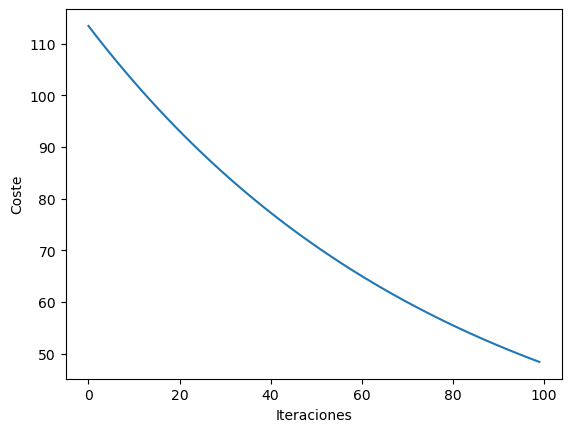

MAE: 4.265435397998577, MSE: 91.7499787167222, RMSE: 9.578620919355886
	Fold 1


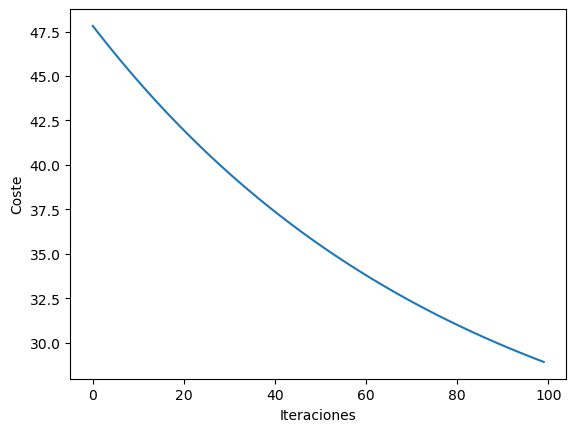

MAE: 3.8715220479118364, MSE: 61.12167319300188, RMSE: 7.818035123546189
	Fold 2


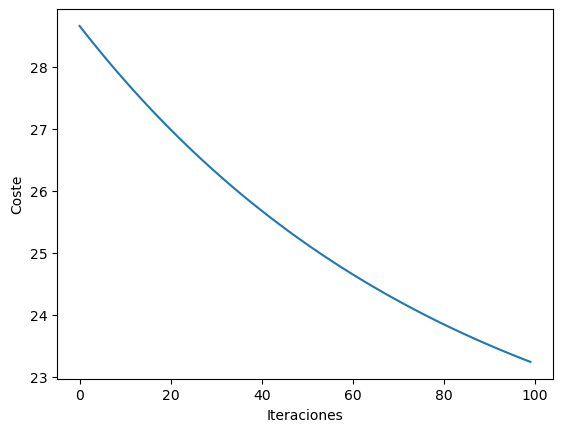

MAE: 3.664592600860899, MSE: 53.04550475938412, RMSE: 7.283234498448071
	Fold 3


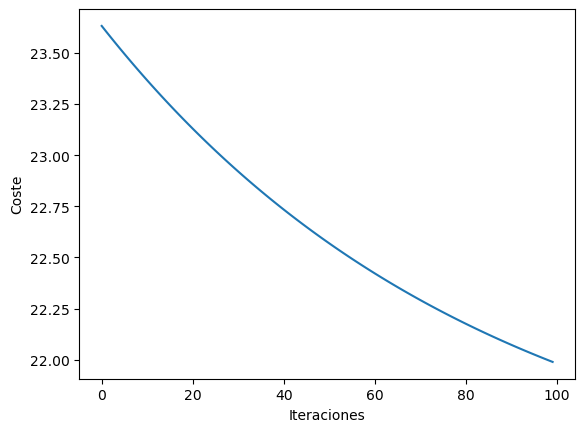

MAE: 3.2065294576618917, MSE: 42.382530384182324, RMSE: 6.510186662775679
	Fold 4


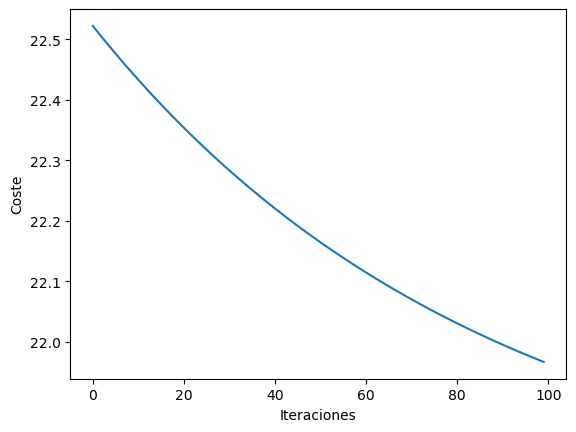

MAE: 2.597205864853245, MSE: 32.59186228323662, RMSE: 5.708928295506664
	Fold 5


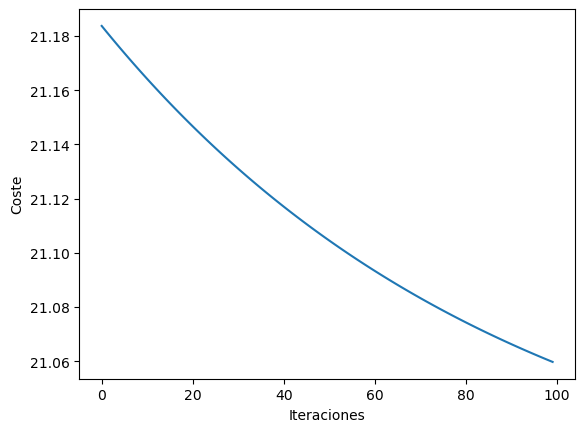

MAE: 3.139761572963551, MSE: 45.64437290629314, RMSE: 6.756061937718832
	Fold 6


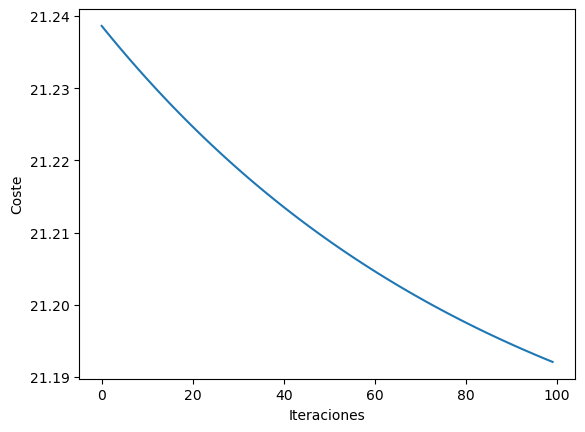

MAE: 3.027884305355377, MSE: 42.419826984721304, RMSE: 6.513050512987083
	Fold 7


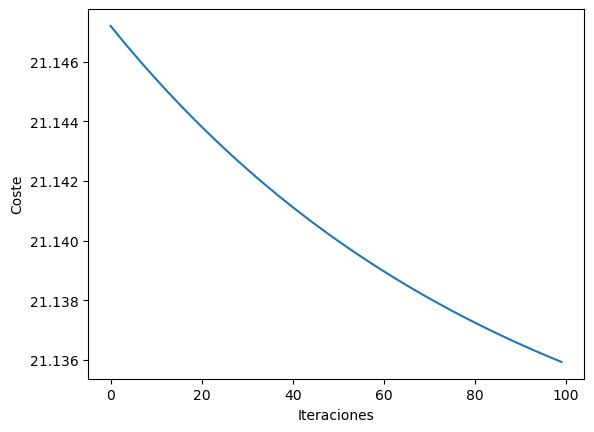

MAE: 3.2506502522551433, MSE: 43.693559812803734, RMSE: 6.610110423646774
	Fold 8


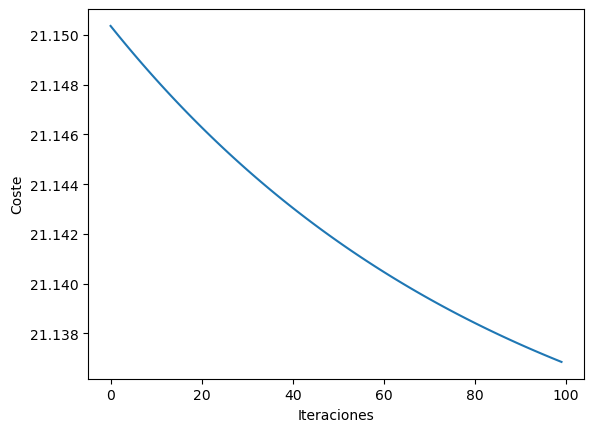

MAE: 2.9919815782787484, MSE: 42.84976474116622, RMSE: 6.5459731699088275
	Fold 9


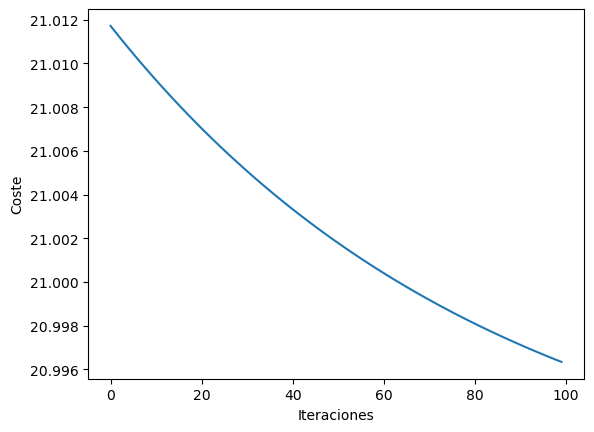

MAE: 3.1246653733856062, MSE: 45.253885233976575, RMSE: 6.727100804505354


In [85]:
theta = thetaInicial(X.shape[1] + 1)

X_trainGen, y_trainGen, X_testGen, y_testGen = generaTrainTest(X, y, tamTest = 0.3)
#print(X_trainGen)

listado = generaIndicesKFolds(X_trainGen, 10)
for i in range(len(listado)):
    print(f"\tFold {i}")
    X_train, y_train, X_val, y_val = generaContenidoKFolds(X_trainGen, y_trainGen, listado[i] ) # Genera una iteracion del cross validation
    
    X_norm, mu, sigma = normalizaYAnyade(X_train)

    alpha =  0.005
    theta, J_history = gradientDescent(X_norm, y_train, theta, alpha, 100)
    mostrarHistorico(J_history)

    X_val_norm, mu, sigma = normalizaYAnyade(X_val)
    MAE, MSE, RMSE = calculaErrores(X_val_norm, theta, y_val)
    print(f"MAE: {MAE}, MSE: {MSE}, RMSE: {RMSE}")

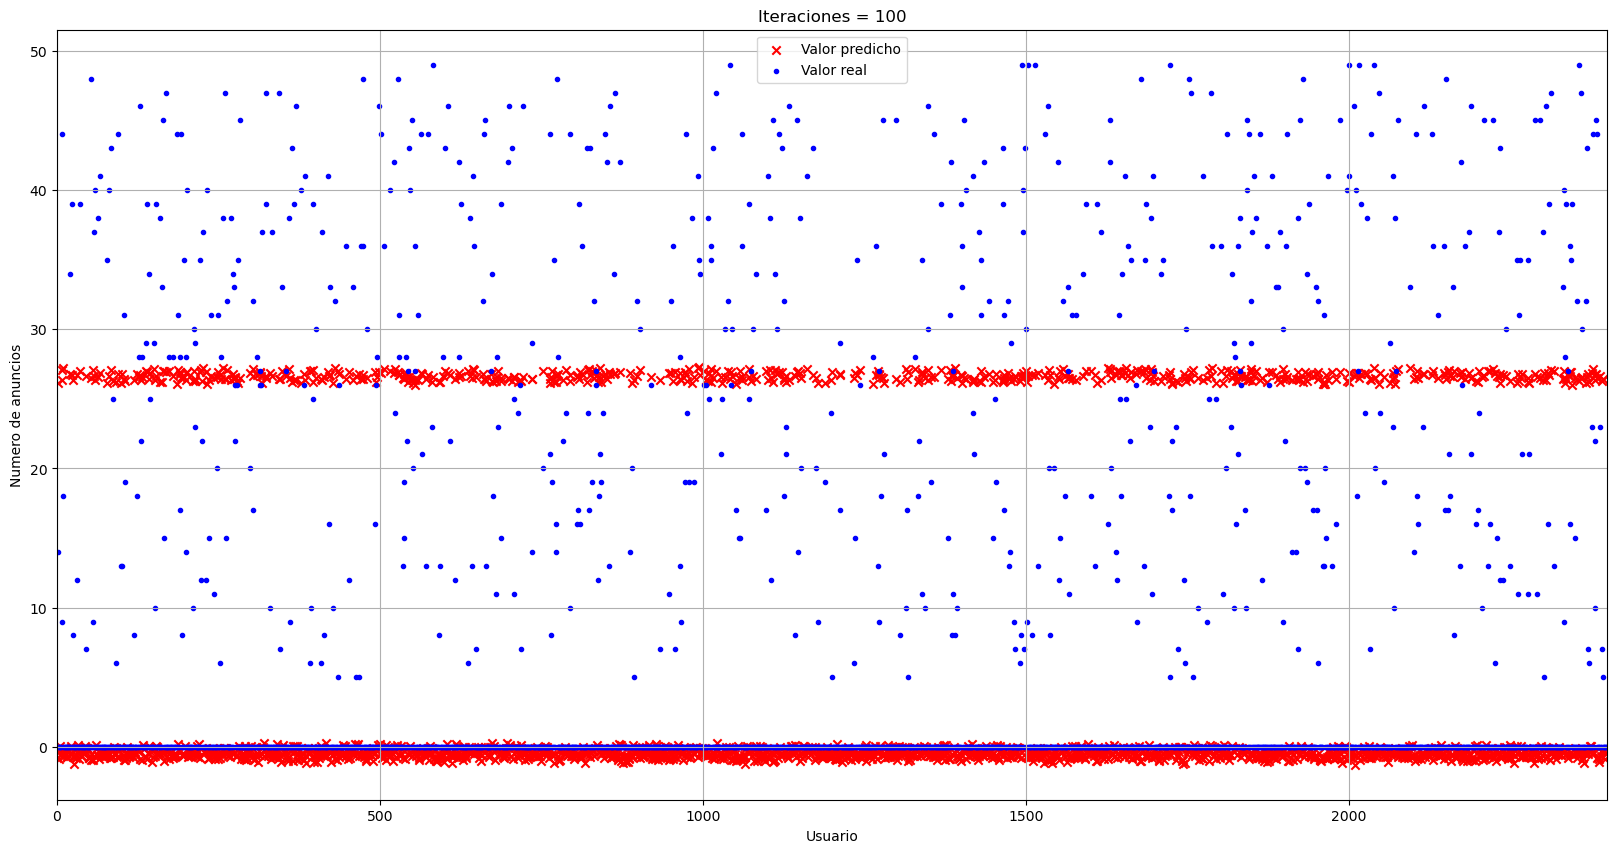

MAE: 3.283897901370294, MSE: 43.18252810372893, RMSE: 6.571341423463624


In [86]:
predicho = []

# Se predice con el conjunto de entrenamiento
X_testGen_Norm, mu, sigma= normalizaYAnyade(X_testGen)
for i in range(X_testGen_Norm.shape[0]):
    J = np.dot(theta, X_testGen_Norm.iloc[i])
    predicho.append(J)

plt.figure(figsize=(20,10))
plt.scatter(range(X_testGen_Norm.shape[0]), predicho, marker = "x", c = "red", label="Valor predicho")
plt.scatter(range(X_testGen_Norm.shape[0]), y_testGen, marker = ".", c = "blue", label="Valor real")
plt.xlabel("Usuario")
plt.ylabel("Numero de anuncios")
plt.grid(True)
plt.xlim(0, X_testGen_Norm.shape[0]) # Se reduce el campo de vision para obervar mejor un ejemplo
#plt.xlim(0, 100) 
plt.title("Iteraciones = 100")
plt.legend()
plt.show()

MAE1, MSE1, RMSE1 = calculaErrores(X_testGen_Norm, theta, y_testGen)
print(f"MAE: {MAE1}, MSE: {MSE1}, RMSE: {RMSE1}")

#### Modelo 2. Iteraciones = 500

Fold 0


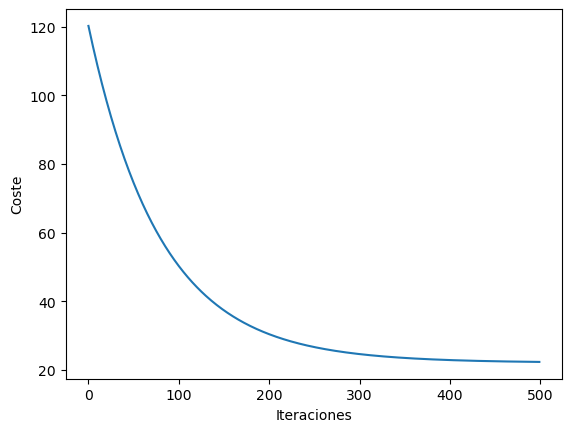

MAE: 2.8378348475603623, MSE: 35.739620155431, RMSE: 5.978262302327575
Fold 1


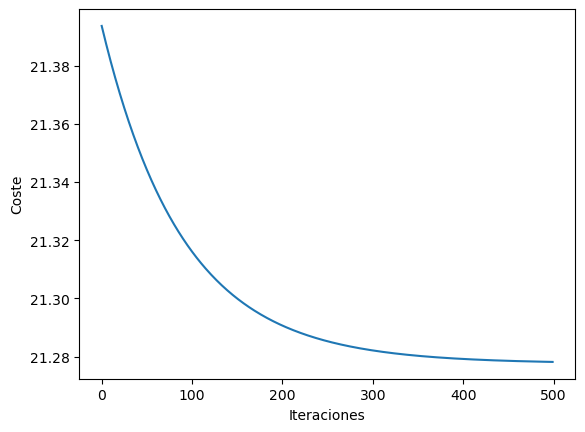

MAE: 3.4599526659277564, MSE: 49.64004566831985, RMSE: 7.045569222448946
Fold 2


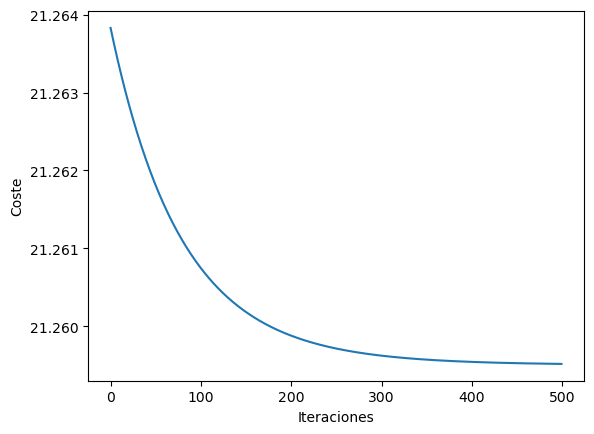

MAE: 3.6424114928354534, MSE: 50.392005296012606, RMSE: 7.098732654214596
Fold 3


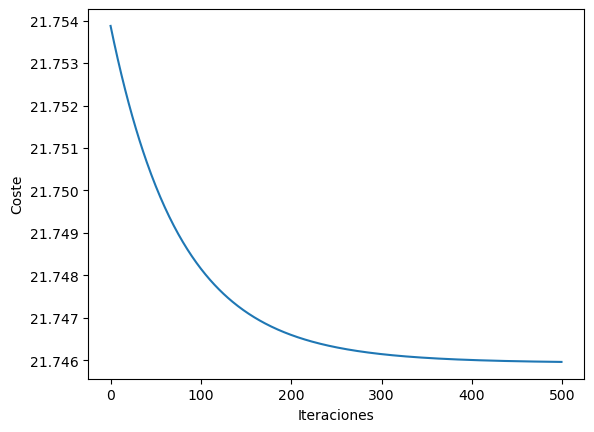

MAE: 3.039777884474461, MSE: 40.89238516944917, RMSE: 6.394715409574469
Fold 4


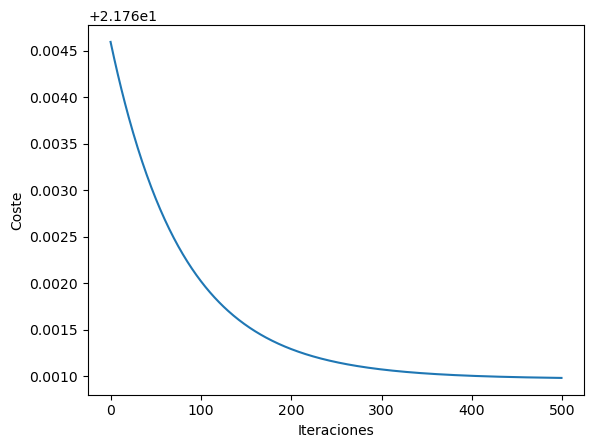

MAE: 3.1574206823119484, MSE: 40.63886254884062, RMSE: 6.374861767037825
Fold 5


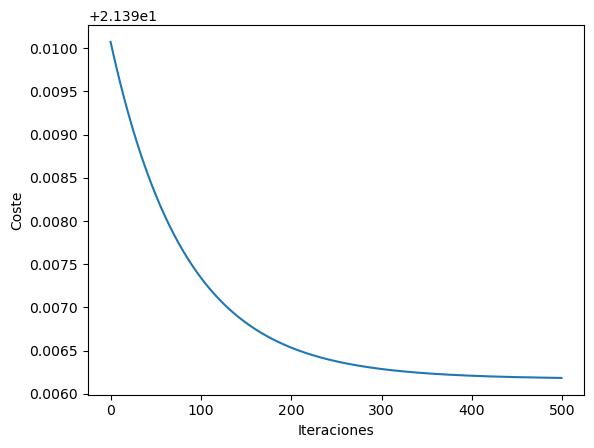

MAE: 3.361580893930845, MSE: 47.54106705238093, RMSE: 6.895003049483077
Fold 6


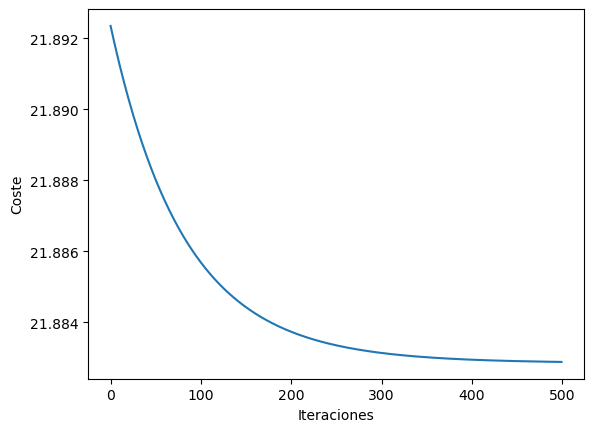

MAE: 2.823789675341858, MSE: 38.43119882297531, RMSE: 6.199290187027488
Fold 7


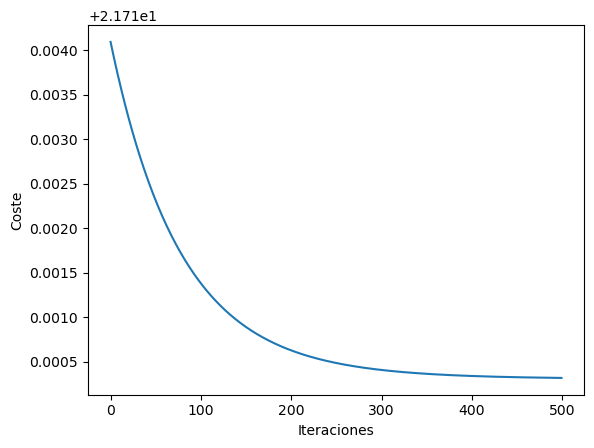

MAE: 3.0048740295910292, MSE: 41.408287603923746, RMSE: 6.434927163839832
Fold 8


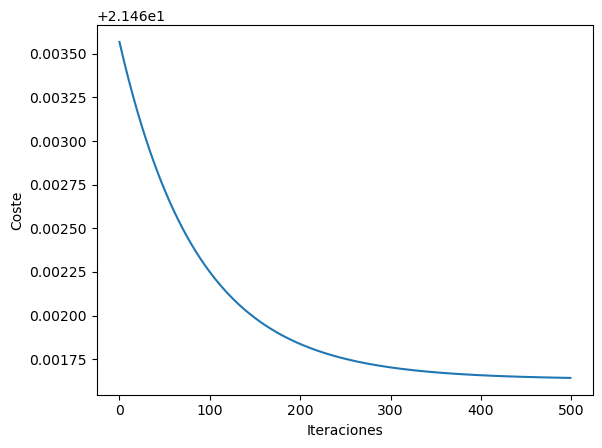

MAE: 3.1689670934992975, MSE: 45.93467146137561, RMSE: 6.777512188212988
Fold 9


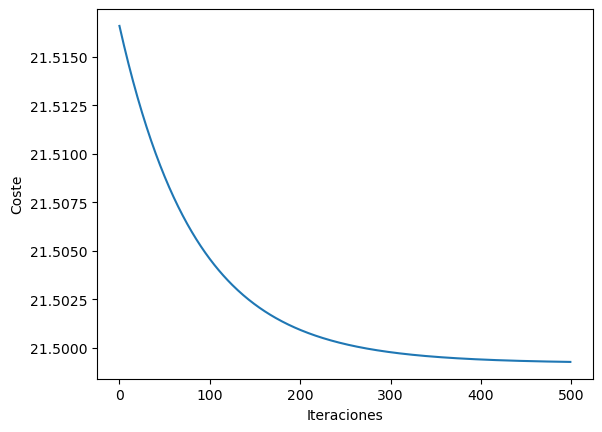

MAE: 3.217781643850408, MSE: 46.01996409234092, RMSE: 6.783801595885667


In [73]:
theta = thetaInicial(X.shape[1] + 1)

X_trainGen, y_trainGen, X_testGen, y_testGen = generaTrainTest(X, y, tamTest = 0.3)
#print(X_trainGen)

listado = generaIndicesKFolds(X_trainGen, 10)

for i in range(len(listado)):
    print(f"Fold {i}")
    X_train, y_train, X_val, y_val = generaContenidoKFolds(X_trainGen, y_trainGen, listado[i] ) # Genera una iteracion del cross validation
    
    X_norm, mu, sigma = normalizaYAnyade(X_train)

    alpha =  0.005
    theta, J_history = gradientDescent(X_norm, y_train, theta, alpha, 500)
    mostrarHistorico(J_history)

    X_val_norm, mu, sigma = normalizaYAnyade(X_val)
    MAE, MSE, RMSE = calculaErrores(X_val_norm, theta, y_val)
    print(f"MAE: {MAE}, MSE: {MSE}, RMSE: {RMSE}")

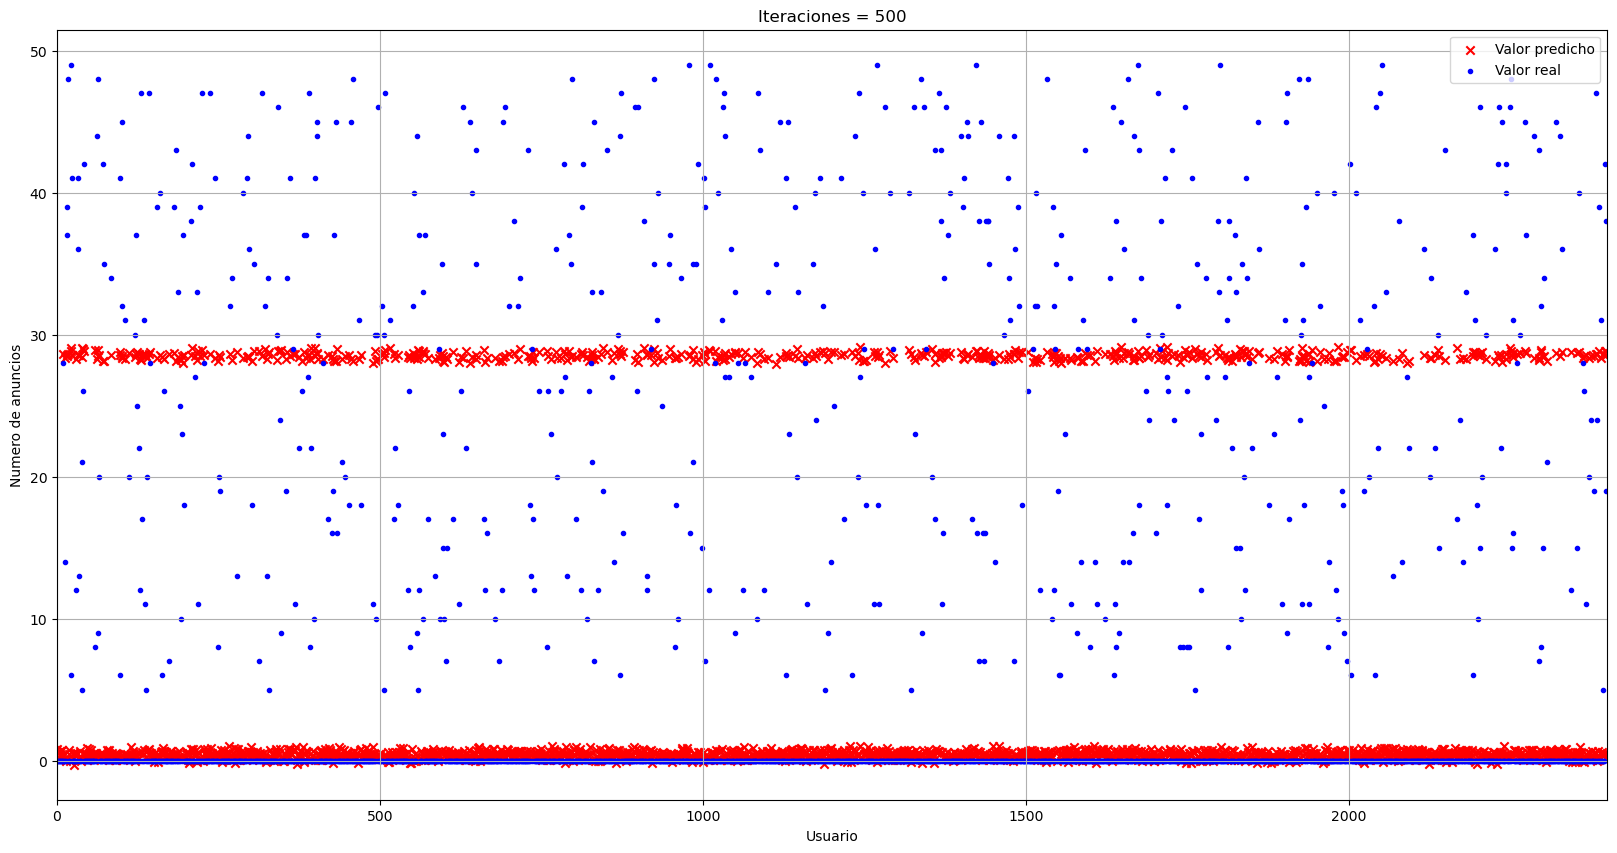

MAE: 3.0166814355261664, MSE: 40.94382895273705, RMSE: 6.398736512213723


In [74]:
predicho = []

# Se predice con el conjunto de entrenamiento
X_testGen_Norm, mu, sigma= normalizaYAnyade(X_testGen)
for i in range(X_testGen_Norm.shape[0]):
    J = np.dot(theta, X_testGen_Norm.iloc[i])
    predicho.append(J)

plt.figure(figsize=(20,10))
plt.scatter(range(X_testGen_Norm.shape[0]), predicho, marker = "x", c = "red", label="Valor predicho")
plt.scatter(range(X_testGen_Norm.shape[0]), y_testGen, marker = ".", c = "blue", label="Valor real")
plt.xlabel("Usuario")
plt.ylabel("Numero de anuncios")
plt.grid(True)
plt.xlim(0, X_testGen_Norm.shape[0]) # Se reduce el campo de vision para obervar mejor un ejemplo
#plt.xlim(0, 100) 
plt.title("Iteraciones = 500")
plt.legend()
plt.show()

MAE2, MSE2, RMSE2 = calculaErrores(X_testGen_Norm, theta, y_testGen)
print(f"MAE: {MAE2}, MSE: {MSE2}, RMSE: {RMSE2}")

#### Modelo 3. Iteraciones = 1000

Fold 0


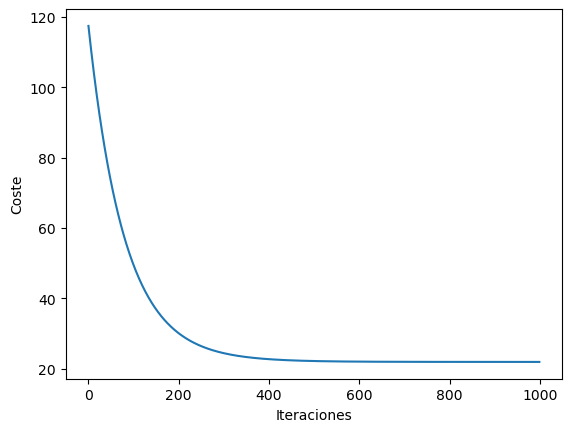

MAE: 2.685329571977026, MSE: 34.687417647754046, RMSE: 5.889602503374404
Fold 1


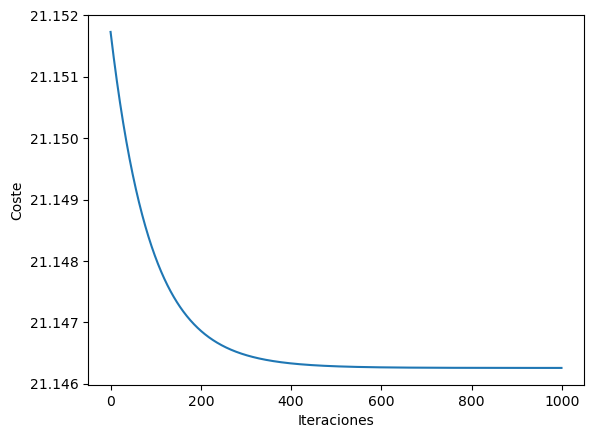

MAE: 3.328324190151994, MSE: 48.612665962445064, RMSE: 6.972278391060204
Fold 2


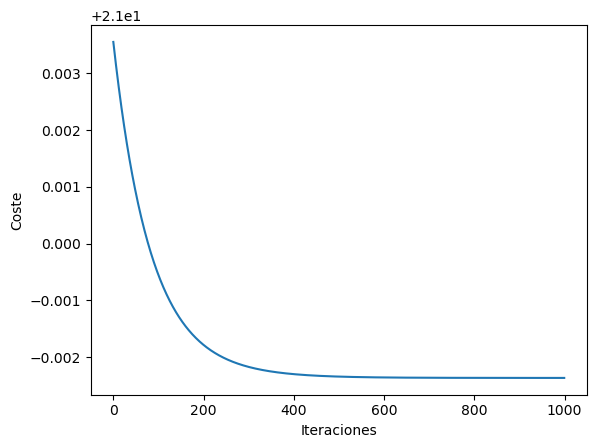

MAE: 3.674063573087255, MSE: 51.932608785327176, RMSE: 7.2064282959956785
Fold 3


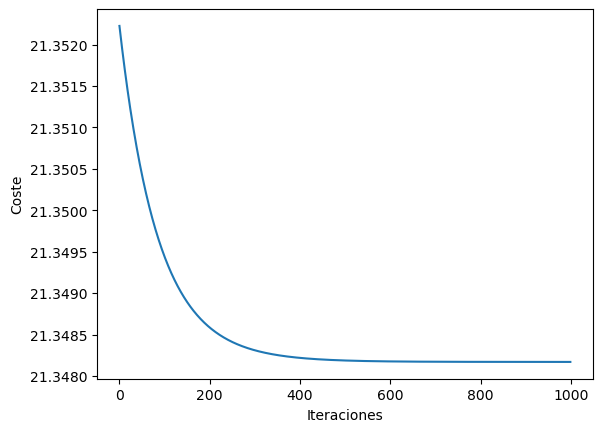

MAE: 3.364234214720873, MSE: 45.4746678066887, RMSE: 6.743490773085457
Fold 4


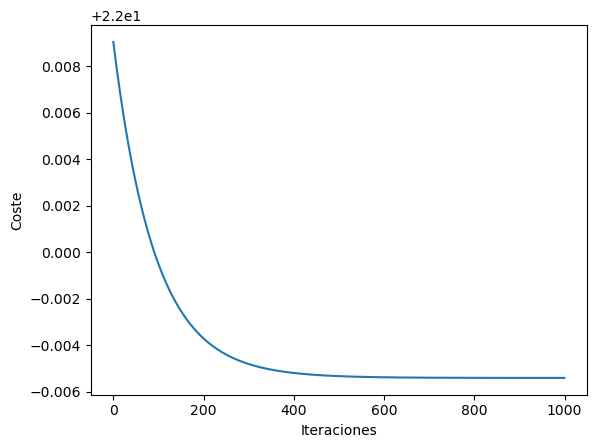

MAE: 2.851279954719092, MSE: 34.04777823734561, RMSE: 5.835047406606532
Fold 5


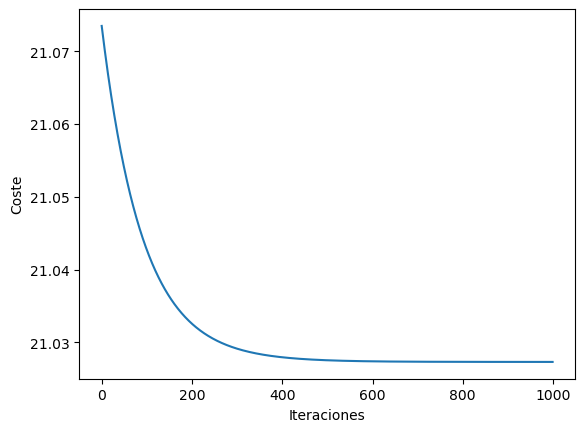

MAE: 4.03420142601136, MSE: 54.140998074588246, RMSE: 7.358056677859191
Fold 6


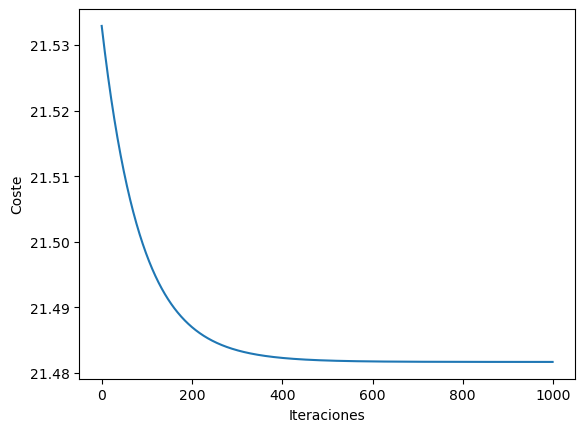

MAE: 3.052770199910929, MSE: 42.9483028324235, RMSE: 6.553495466727928
Fold 7


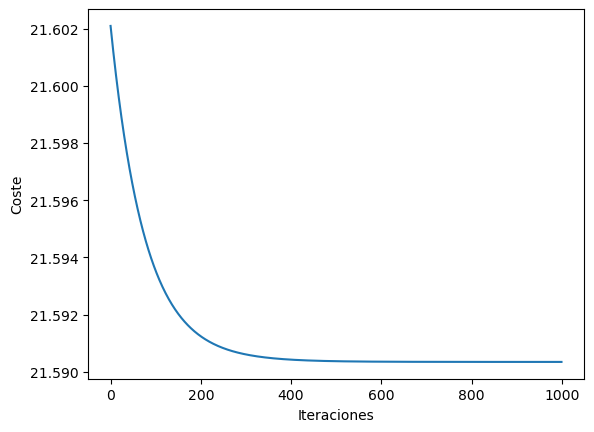

MAE: 2.9893011442407817, MSE: 40.43883217535966, RMSE: 6.359153416561017
Fold 8


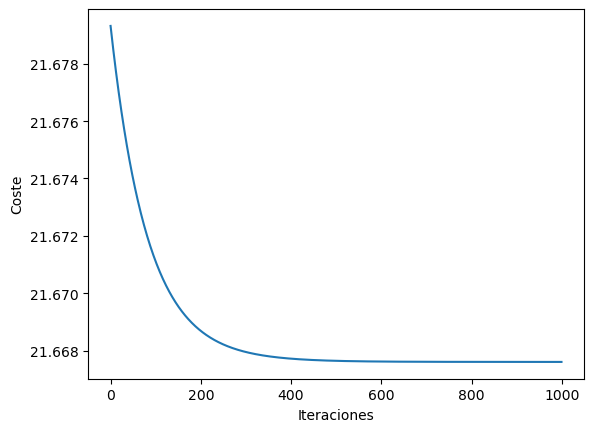

MAE: 2.960042203346478, MSE: 40.02691317822852, RMSE: 6.3266826361236514
Fold 9


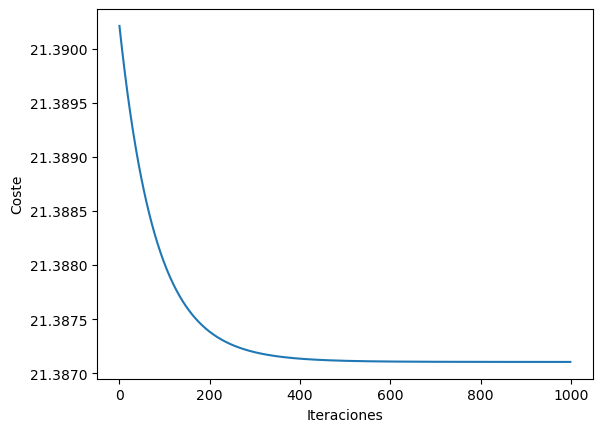

MAE: 3.122629333260669, MSE: 44.59367563447426, RMSE: 6.677849626524564


In [75]:
theta = thetaInicial(X.shape[1] + 1)

X_trainGen, y_trainGen, X_testGen, y_testGen = generaTrainTest(X, y, tamTest = 0.3)
#print(X_trainGen)

listado = generaIndicesKFolds(X_trainGen, 10)

for i in range(len(listado)):
    print(f"Fold {i}")
    X_train, y_train, X_val, y_val = generaContenidoKFolds(X_trainGen, y_trainGen, listado[i] ) # Genera una iteracion del cross validation
    
    X_norm, mu, sigma = normalizaYAnyade(X_train)

    alpha =  0.005
    theta, J_history = gradientDescent(X_norm, y_train, theta, alpha, 1000)
    mostrarHistorico(J_history)

    X_val_norm, mu, sigma = normalizaYAnyade(X_val)
    MAE, MSE, RMSE = calculaErrores(X_val_norm, theta, y_val)
    print(f"MAE: {MAE}, MSE: {MSE}, RMSE: {RMSE}")

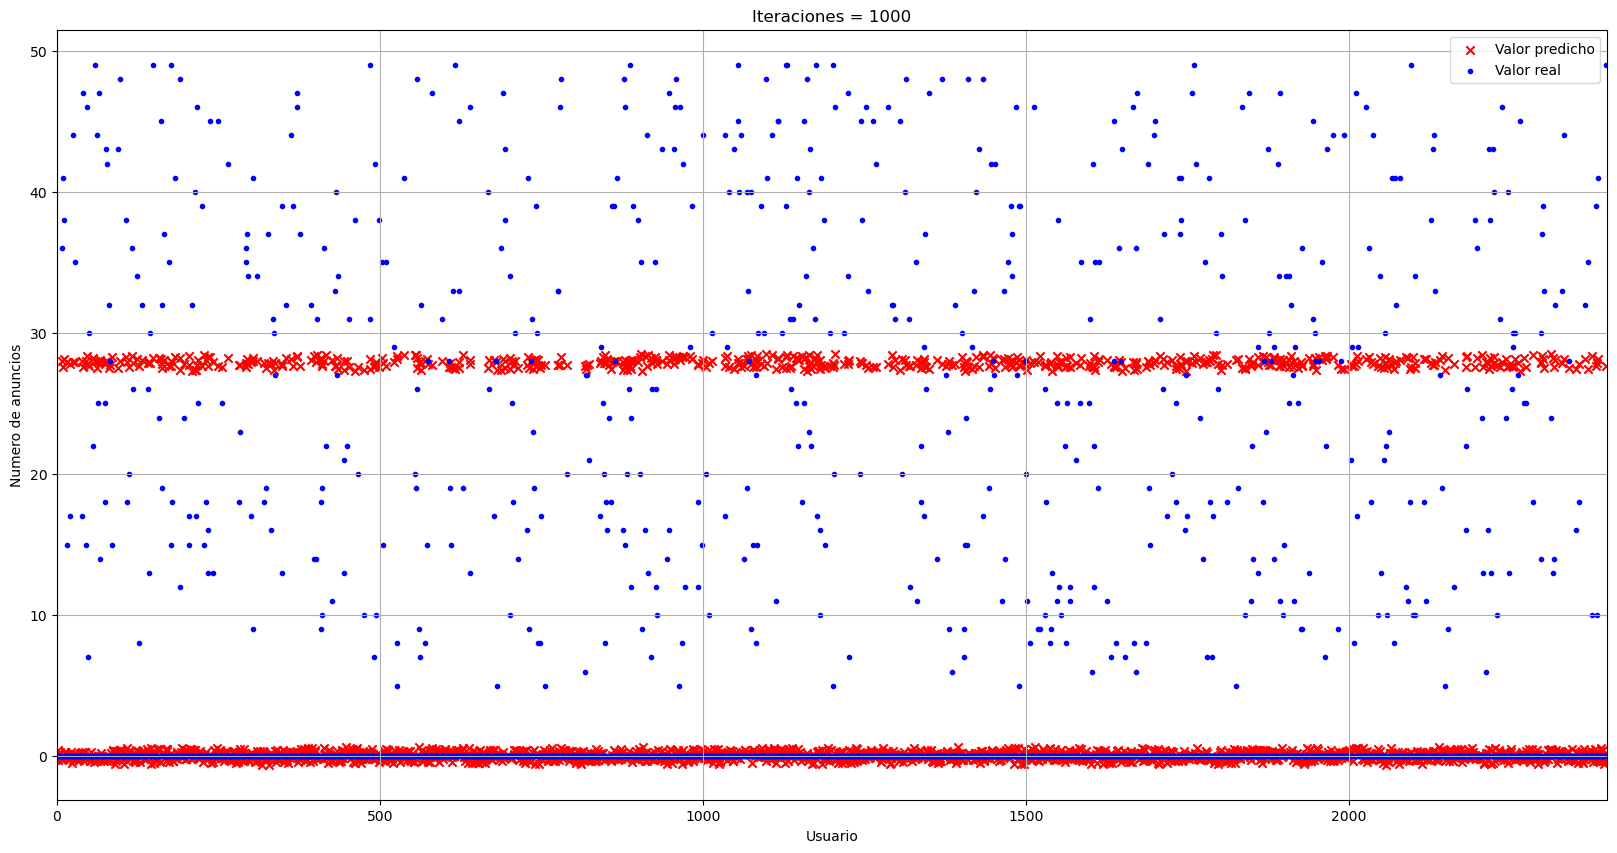

MAE: 2.9719699176050516, MSE: 41.462897749403005, RMSE: 6.439169026311004


In [76]:
predicho = []

# Se predice con el conjunto de entrenamiento
X_testGen_Norm, mu, sigma= normalizaYAnyade(X_testGen)
for i in range(X_testGen_Norm.shape[0]):
    J = np.dot(theta, X_testGen_Norm.iloc[i])
    predicho.append(J)

plt.figure(figsize=(20,10))
plt.scatter(range(X_testGen_Norm.shape[0]), predicho, marker = "x", c = "red", label="Valor predicho")
plt.scatter(range(X_testGen_Norm.shape[0]), y_testGen, marker = ".", c = "blue", label="Valor real")
plt.xlabel("Usuario")
plt.ylabel("Numero de anuncios")
plt.grid(True)
plt.xlim(0, X_testGen_Norm.shape[0]) # Se reduce el campo de vision para obervar mejor un ejemplo
#plt.xlim(0, 100) 
plt.title("Iteraciones = 1000")
plt.legend()
plt.show()

MAE3, MSE3, RMSE3 = calculaErrores(X_testGen_Norm, theta, y_testGen)
print(f"MAE: {MAE3}, MSE: {MSE3}, RMSE: {RMSE3}")

#### Modelo 4. Iteraciones = 5000

Fold 0


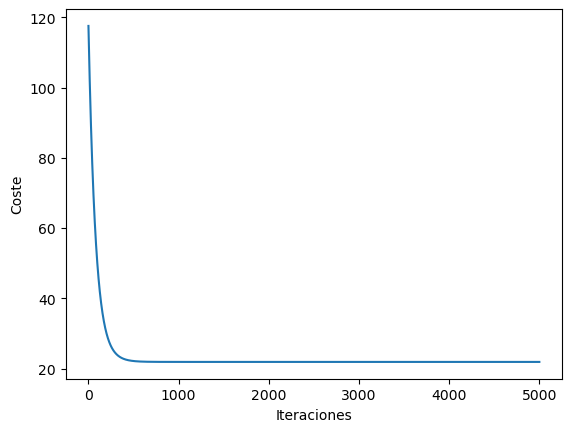

MAE: 2.7733958739911557, MSE: 32.68994042942487, RMSE: 5.717511734087204
Fold 1


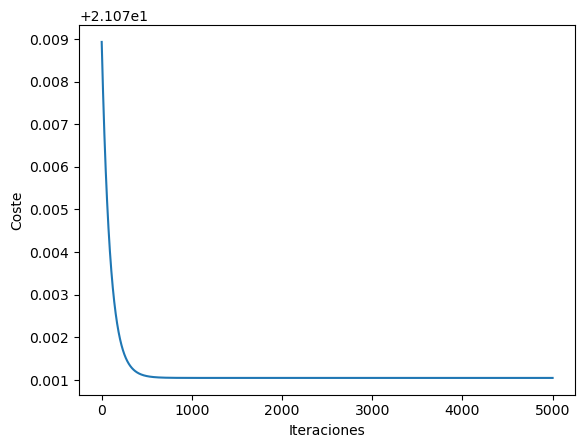

MAE: 3.3198586385958344, MSE: 48.50382638738881, RMSE: 6.964468851778204
Fold 2


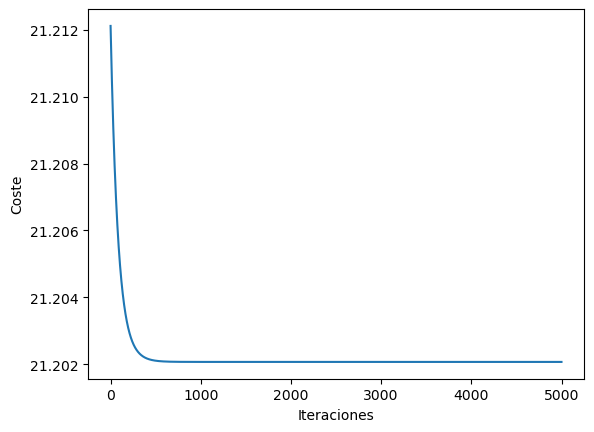

MAE: 3.2319732630044955, MSE: 45.92235550898286, RMSE: 6.776603537833895
Fold 3


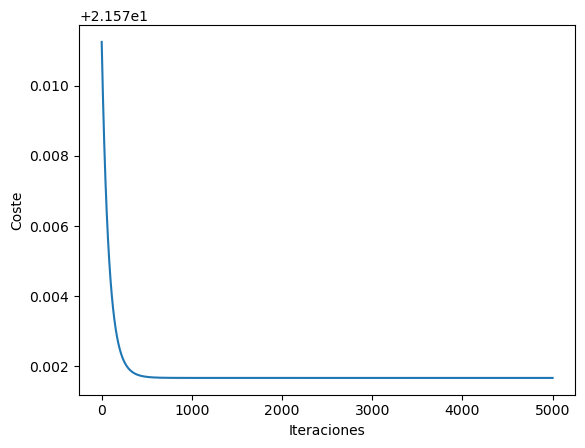

MAE: 2.9371112343640116, MSE: 39.33382613887346, RMSE: 6.271668529097616
Fold 4


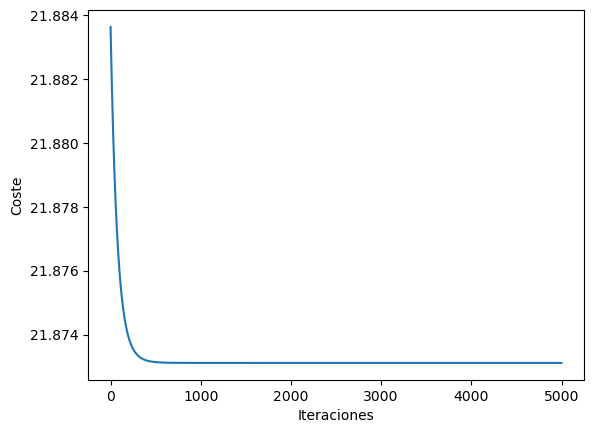

MAE: 2.7529575373464112, MSE: 33.76231099352448, RMSE: 5.810534484324526
Fold 5


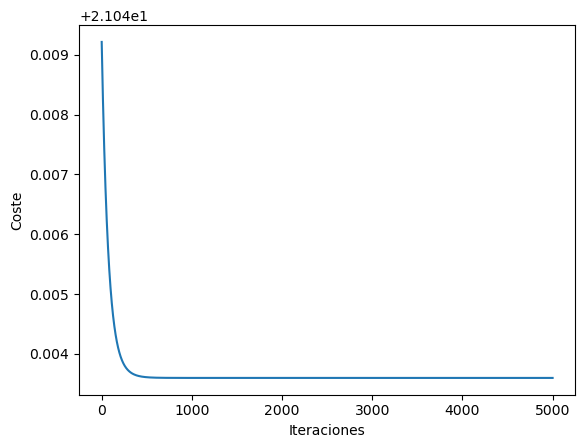

MAE: 3.472517451516468, MSE: 48.63081477330387, RMSE: 6.973579767472648
Fold 6


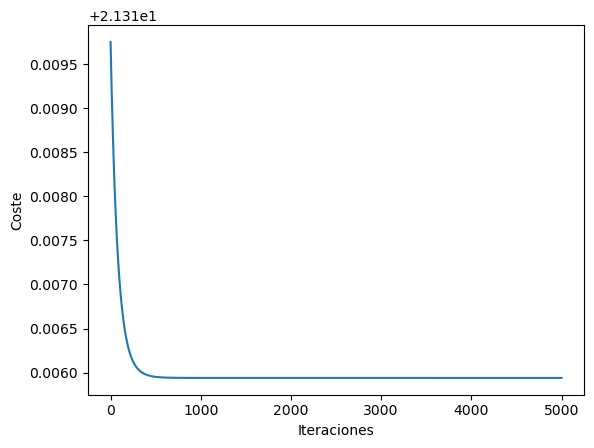

MAE: 3.11575271318517, MSE: 43.83214075481201, RMSE: 6.62058462334045
Fold 7


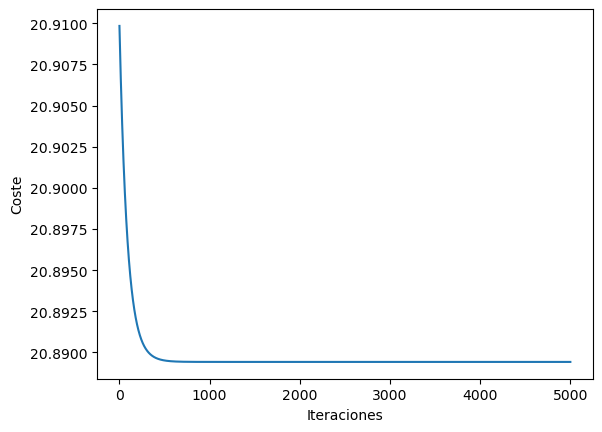

MAE: 4.1512835431015205, MSE: 54.58960719244087, RMSE: 7.388478002433307
Fold 8


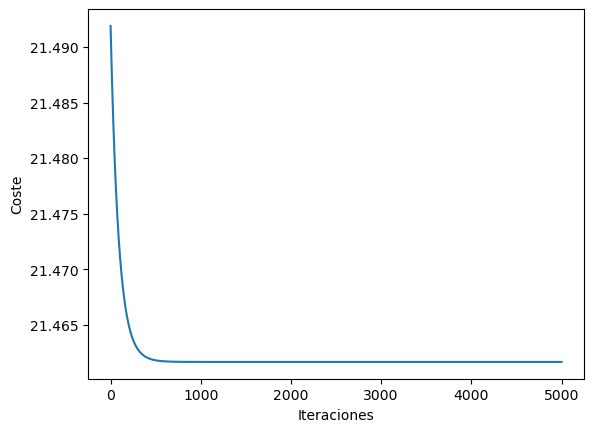

MAE: 2.9667720538147866, MSE: 41.27036296190206, RMSE: 6.424201348175667
Fold 9


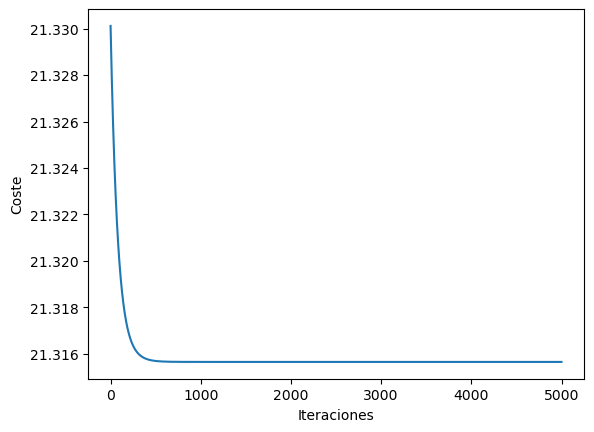

MAE: 3.148017158144419, MSE: 44.950370294641424, RMSE: 6.704503732167014


In [77]:
theta = thetaInicial(X.shape[1] + 1)

X_trainGen, y_trainGen, X_testGen, y_testGen = generaTrainTest(X, y, tamTest = 0.3)
#print(X_trainGen)

listado = generaIndicesKFolds(X_trainGen, 10)

for i in range(len(listado)):
    print(f"Fold {i}")
    X_train, y_train, X_val, y_val = generaContenidoKFolds(X_trainGen, y_trainGen, listado[i] ) # Genera una iteracion del cross validation
    
    X_norm, mu, sigma = normalizaYAnyade(X_train)

    alpha =  0.005
    theta, J_history = gradientDescent(X_norm, y_train, theta, alpha, 5000)
    mostrarHistorico(J_history)

    X_val_norm, mu, sigma = normalizaYAnyade(X_val)
    MAE, MSE, RMSE = calculaErrores(X_val_norm, theta, y_val)
    print(f"MAE: {MAE}, MSE: {MSE}, RMSE: {RMSE}")

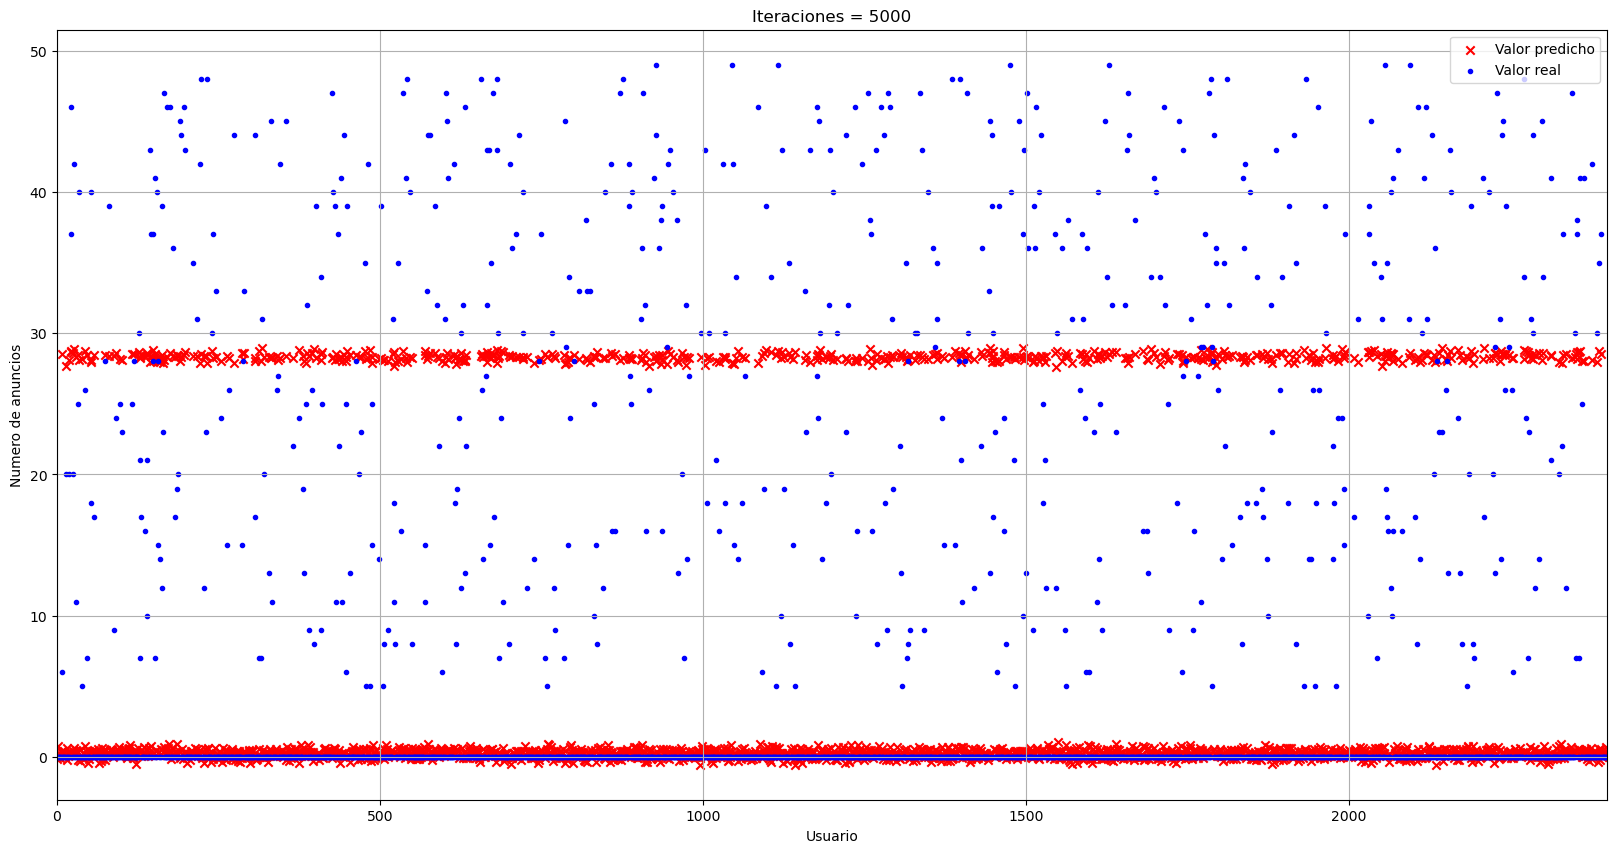

MAE: 3.0080735591718946, MSE: 42.00617747887909, RMSE: 6.4812172837268065


In [78]:
predicho = []

# Se predice con el conjunto de entrenamiento
X_testGen_Norm, mu, sigma= normalizaYAnyade(X_testGen)
for i in range(X_testGen_Norm.shape[0]):
    J = np.dot(theta, X_testGen_Norm.iloc[i])
    predicho.append(J)

plt.figure(figsize=(20,10))
plt.scatter(range(X_testGen_Norm.shape[0]), predicho, marker = "x", c = "red", label="Valor predicho")
plt.scatter(range(X_testGen_Norm.shape[0]), y_testGen, marker = ".", c = "blue", label="Valor real")
plt.xlabel("Usuario")
plt.ylabel("Numero de anuncios")
plt.grid(True)
plt.xlim(0, X_testGen_Norm.shape[0]) # Se reduce el campo de vision para obervar mejor un ejemplo
#plt.xlim(0, 100) 
plt.title("Iteraciones = 5000")
plt.legend()
plt.show()

MAE4, MSE4, RMSE4 = calculaErrores(X_testGen_Norm, theta, y_testGen)
print(f"MAE: {MAE4}, MSE: {MSE4}, RMSE: {RMSE4}")

### Apartado b

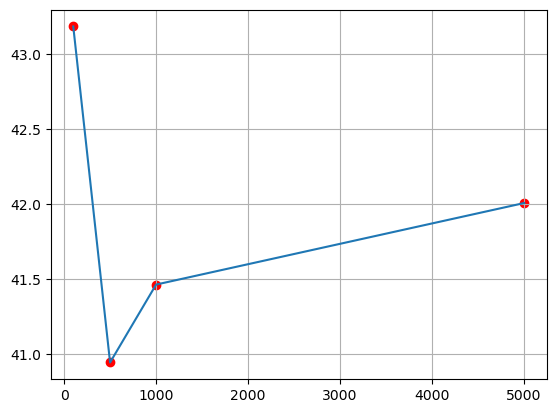

In [90]:
error = [MSE1, MSE2, MSE3, MSE4]
num_iter = [100, 500, 1000, 5000]

plt.plot(num_iter, error)
plt.scatter(num_iter, error, c="red")

plt.grid(True)
plt.show()

### Apartado c

La discusión se toma en la documentación.